In [ ]:
import tensorflow
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import GlobalMaxPooling2D
import cv2
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle

In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(128,128,3))
model.trainable=False

In [ ]:
model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
img = cv2.imread("/content/drive/MyDrive/Redes Neuronales/Proyecto/data/img (1999).jpg")

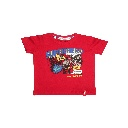

In [ ]:
cv2_imshow(img)

In [ ]:
# (number_of_image, 224, 224, 3)
expand_img = np.expand_dims(img, axis=0)

In [ ]:
expand_img.shape

(1, 128, 128, 3)

In [ ]:
pre_img = preprocess_input(expand_img)

In [ ]:
pre_img.shape

(1, 128, 128, 3)

In [ ]:
result = model.predict(pre_img).flatten()

1/1 [==============================] - 3s 3s/step


In [ ]:
normalized = result/norm(result)

In [ ]:
normalized.shape

(2048,)

In [ ]:
def extract_feature(img_path, model):
    img = cv2.imread(img_path)
    img = np.array(img)
    expand_img = np.expand_dims(img, axis=0)
    pre_img = preprocess_input(expand_img)
    result = model.predict(pre_img).flatten()
    normalized = result/norm(result)
    return normalized

In [ ]:
extract_feature("/content/drive/MyDrive/Redes Neuronales/Proyecto/data/img (1999).jpg", model)

1/1 [==============================] - 0s 93ms/step


array([0.        , 0.04683812, 0.00305196, ..., 0.00816763, 0.03254046,
       0.02342695], dtype=float32)

In [ ]:
filename = []
feature_list = []

folder_path = "/content/drive/MyDrive/Redes Neuronales/Proyecto/data"

for file in os.listdir(folder_path):
    filename.append(os.path.join(folder_path, file))

In [ ]:
for file in tqdm(filename):
   feature_list.append(extract_feature(file, model))

  0%|          | 0/2906 [00:00<?, ?it/s]

1/1 [==============================] - 0s 107ms/step


  0%|          | 1/2906 [00:00<11:35,  4.17it/s]

1/1 [==============================] - 0s 95ms/step


  0%|          | 2/2906 [00:00<09:37,  5.03it/s]

1/1 [==============================] - 0s 93ms/step


  0%|          | 3/2906 [00:00<10:33,  4.59it/s]

1/1 [==============================] - 0s 96ms/step


  0%|          | 4/2906 [00:00<10:42,  4.52it/s]

1/1 [==============================] - 0s 90ms/step


  0%|          | 5/2906 [00:01<10:47,  4.48it/s]

1/1 [==============================] - 0s 98ms/step


  0%|          | 6/2906 [00:01<09:45,  4.95it/s]

1/1 [==============================] - 0s 94ms/step


  0%|          | 7/2906 [00:01<10:06,  4.78it/s]

1/1 [==============================] - 0s 89ms/step


  0%|          | 8/2906 [00:01<09:27,  5.11it/s]

1/1 [==============================] - 0s 92ms/step


  0%|          | 9/2906 [00:01<09:59,  4.84it/s]

1/1 [==============================] - 0s 93ms/step


  0%|          | 10/2906 [00:02<10:22,  4.65it/s]

1/1 [==============================] - 0s 93ms/step


  0%|          | 11/2906 [00:02<09:32,  5.05it/s]

1/1 [==============================] - 0s 92ms/step


  0%|          | 12/2906 [00:02<09:03,  5.32it/s]

1/1 [==============================] - 0s 107ms/step


  0%|          | 13/2906 [00:02<08:58,  5.38it/s]

1/1 [==============================] - 0s 100ms/step


  0%|          | 14/2906 [00:02<08:42,  5.54it/s]

1/1 [==============================] - 0s 94ms/step


  1%|          | 15/2906 [00:03<09:22,  5.14it/s]

1/1 [==============================] - 0s 96ms/step


  1%|          | 16/2906 [00:03<08:58,  5.37it/s]

1/1 [==============================] - 0s 90ms/step


  1%|          | 17/2906 [00:03<08:38,  5.57it/s]

1/1 [==============================] - 0s 93ms/step


  1%|          | 18/2906 [00:03<09:18,  5.17it/s]

1/1 [==============================] - 0s 97ms/step


  1%|          | 19/2906 [00:03<09:52,  4.88it/s]

1/1 [==============================] - 0s 96ms/step


  1%|          | 20/2906 [00:04<10:10,  4.73it/s]

1/1 [==============================] - 0s 91ms/step


  1%|          | 21/2906 [00:04<09:26,  5.09it/s]

1/1 [==============================] - 0s 101ms/step


  1%|          | 22/2906 [00:04<09:03,  5.30it/s]

1/1 [==============================] - 0s 165ms/step


  1%|          | 23/2906 [00:04<10:15,  4.69it/s]

1/1 [==============================] - 0s 151ms/step


  1%|          | 24/2906 [00:04<11:01,  4.35it/s]

1/1 [==============================] - 0s 166ms/step


  1%|          | 25/2906 [00:05<11:31,  4.17it/s]

1/1 [==============================] - 0s 144ms/step


  1%|          | 26/2906 [00:05<11:42,  4.10it/s]

1/1 [==============================] - 0s 159ms/step


  1%|          | 27/2906 [00:05<12:23,  3.87it/s]

1/1 [==============================] - 0s 155ms/step


  1%|          | 28/2906 [00:06<12:50,  3.74it/s]

1/1 [==============================] - 0s 146ms/step


  1%|          | 29/2906 [00:06<12:30,  3.83it/s]

1/1 [==============================] - 0s 333ms/step


  1%|          | 30/2906 [00:06<18:55,  2.53it/s]

1/1 [==============================] - 0s 135ms/step


  1%|          | 31/2906 [00:52<11:12:15, 14.03s/it]

1/1 [==============================] - 0s 92ms/step


  1%|          | 32/2906 [00:54<8:16:29, 10.37s/it] 

1/1 [==============================] - 0s 90ms/step


  1%|          | 33/2906 [00:54<5:49:41,  7.30s/it]

1/1 [==============================] - 0s 91ms/step


  1%|          | 34/2906 [00:54<4:07:26,  5.17s/it]

1/1 [==============================] - 0s 91ms/step


  1%|          | 35/2906 [00:55<2:55:30,  3.67s/it]

1/1 [==============================] - 0s 91ms/step


  1%|          | 36/2906 [00:55<2:05:11,  2.62s/it]

1/1 [==============================] - 0s 113ms/step


  1%|▏         | 37/2906 [00:55<1:30:24,  1.89s/it]

1/1 [==============================] - 0s 93ms/step


  1%|▏         | 38/2906 [00:55<1:05:37,  1.37s/it]

1/1 [==============================] - 0s 96ms/step


  1%|▏         | 39/2906 [00:55<48:19,  1.01s/it]  

1/1 [==============================] - 0s 97ms/step


  1%|▏         | 40/2906 [00:56<37:02,  1.29it/s]

1/1 [==============================] - 0s 90ms/step


  1%|▏         | 41/2906 [00:56<29:10,  1.64it/s]

1/1 [==============================] - 0s 105ms/step


  1%|▏         | 42/2906 [00:56<23:47,  2.01it/s]

1/1 [==============================] - 0s 92ms/step


  1%|▏         | 43/2906 [00:56<19:52,  2.40it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▏         | 44/2906 [00:56<17:10,  2.78it/s]

1/1 [==============================] - 0s 91ms/step


  2%|▏         | 45/2906 [00:57<14:24,  3.31it/s]

1/1 [==============================] - 0s 95ms/step


  2%|▏         | 46/2906 [00:57<13:27,  3.54it/s]

1/1 [==============================] - 0s 111ms/step


  2%|▏         | 47/2906 [00:57<11:55,  4.00it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▏         | 48/2906 [00:57<11:39,  4.09it/s]

1/1 [==============================] - 0s 91ms/step


  2%|▏         | 49/2906 [00:57<11:20,  4.20it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▏         | 50/2906 [00:58<10:15,  4.64it/s]

1/1 [==============================] - 0s 96ms/step


  2%|▏         | 51/2906 [00:58<09:34,  4.97it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▏         | 52/2906 [00:58<09:00,  5.28it/s]

1/1 [==============================] - 0s 88ms/step


  2%|▏         | 53/2906 [00:58<08:43,  5.45it/s]

1/1 [==============================] - 0s 91ms/step


  2%|▏         | 54/2906 [00:58<09:18,  5.10it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▏         | 55/2906 [00:59<09:50,  4.83it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▏         | 56/2906 [00:59<09:09,  5.18it/s]

1/1 [==============================] - 0s 90ms/step


  2%|▏         | 57/2906 [00:59<08:42,  5.45it/s]

1/1 [==============================] - 0s 106ms/step


  2%|▏         | 58/2906 [00:59<08:41,  5.46it/s]

1/1 [==============================] - 0s 94ms/step


  2%|▏         | 59/2906 [00:59<09:23,  5.05it/s]

1/1 [==============================] - 0s 91ms/step


  2%|▏         | 60/2906 [01:00<09:42,  4.89it/s]

1/1 [==============================] - 0s 123ms/step


  2%|▏         | 61/2906 [01:00<10:03,  4.72it/s]

1/1 [==============================] - 0s 142ms/step


  2%|▏         | 62/2906 [01:00<10:26,  4.54it/s]

1/1 [==============================] - 0s 138ms/step


  2%|▏         | 63/2906 [01:00<10:58,  4.32it/s]

1/1 [==============================] - 0s 149ms/step


  2%|▏         | 64/2906 [01:01<11:17,  4.19it/s]

1/1 [==============================] - 0s 143ms/step


  2%|▏         | 65/2906 [01:01<11:18,  4.18it/s]

1/1 [==============================] - 0s 145ms/step


  2%|▏         | 66/2906 [01:01<11:47,  4.01it/s]

1/1 [==============================] - 0s 152ms/step


  2%|▏         | 67/2906 [01:01<12:05,  3.91it/s]

1/1 [==============================] - 0s 151ms/step


  2%|▏         | 68/2906 [01:02<11:55,  3.96it/s]

1/1 [==============================] - 0s 153ms/step


  2%|▏         | 69/2906 [01:02<11:53,  3.97it/s]

1/1 [==============================] - 0s 153ms/step


  2%|▏         | 70/2906 [01:02<11:47,  4.01it/s]

1/1 [==============================] - 0s 164ms/step


  2%|▏         | 71/2906 [01:02<11:52,  3.98it/s]

1/1 [==============================] - 0s 140ms/step


  2%|▏         | 72/2906 [01:03<11:42,  4.04it/s]

1/1 [==============================] - 0s 139ms/step


  3%|▎         | 73/2906 [01:03<12:17,  3.84it/s]

1/1 [==============================] - 0s 156ms/step


  3%|▎         | 74/2906 [01:03<12:26,  3.79it/s]

1/1 [==============================] - 0s 156ms/step


  3%|▎         | 75/2906 [01:03<12:22,  3.81it/s]

1/1 [==============================] - 0s 148ms/step


  3%|▎         | 76/2906 [01:04<12:28,  3.78it/s]

1/1 [==============================] - 0s 150ms/step


  3%|▎         | 77/2906 [01:04<12:26,  3.79it/s]

1/1 [==============================] - 0s 150ms/step


  3%|▎         | 78/2906 [01:04<12:30,  3.77it/s]

1/1 [==============================] - 0s 125ms/step


  3%|▎         | 79/2906 [01:04<12:06,  3.89it/s]

1/1 [==============================] - 0s 96ms/step


  3%|▎         | 80/2906 [01:05<11:37,  4.05it/s]

1/1 [==============================] - 0s 89ms/step


  3%|▎         | 81/2906 [01:05<10:25,  4.52it/s]

1/1 [==============================] - 0s 89ms/step


  3%|▎         | 82/2906 [01:05<09:39,  4.88it/s]

1/1 [==============================] - 0s 89ms/step


  3%|▎         | 83/2906 [01:05<10:02,  4.68it/s]

1/1 [==============================] - 0s 107ms/step


  3%|▎         | 84/2906 [01:05<10:10,  4.62it/s]

1/1 [==============================] - 0s 93ms/step


  3%|▎         | 85/2906 [01:06<10:13,  4.59it/s]

1/1 [==============================] - 0s 93ms/step


  3%|▎         | 86/2906 [01:06<10:21,  4.54it/s]

1/1 [==============================] - 0s 97ms/step


  3%|▎         | 87/2906 [01:06<09:37,  4.89it/s]

1/1 [==============================] - 0s 91ms/step


  3%|▎         | 88/2906 [01:06<09:51,  4.76it/s]

1/1 [==============================] - 0s 118ms/step


  3%|▎         | 89/2906 [01:07<10:04,  4.66it/s]

1/1 [==============================] - 0s 91ms/step


  3%|▎         | 90/2906 [01:07<09:19,  5.03it/s]

1/1 [==============================] - 0s 92ms/step


  3%|▎         | 91/2906 [01:07<09:52,  4.75it/s]

1/1 [==============================] - 0s 98ms/step


  3%|▎         | 92/2906 [01:07<09:16,  5.05it/s]

1/1 [==============================] - 0s 96ms/step


  3%|▎         | 93/2906 [01:07<09:38,  4.86it/s]

1/1 [==============================] - 0s 105ms/step


  3%|▎         | 94/2906 [01:08<09:56,  4.71it/s]

1/1 [==============================] - 0s 92ms/step


  3%|▎         | 95/2906 [01:08<09:18,  5.03it/s]

1/1 [==============================] - 0s 93ms/step


  3%|▎         | 96/2906 [01:08<08:52,  5.27it/s]

1/1 [==============================] - 0s 98ms/step


  3%|▎         | 97/2906 [01:08<08:35,  5.45it/s]

1/1 [==============================] - 0s 92ms/step


  3%|▎         | 98/2906 [01:08<08:15,  5.66it/s]

1/1 [==============================] - 0s 93ms/step


  3%|▎         | 99/2906 [01:08<08:56,  5.23it/s]

1/1 [==============================] - 0s 95ms/step


  3%|▎         | 100/2906 [01:09<08:55,  5.24it/s]

1/1 [==============================] - 0s 102ms/step


  3%|▎         | 101/2906 [01:09<09:25,  4.96it/s]

1/1 [==============================] - 0s 94ms/step


  4%|▎         | 102/2906 [01:09<08:57,  5.21it/s]

1/1 [==============================] - 0s 88ms/step


  4%|▎         | 103/2906 [01:09<08:31,  5.48it/s]

1/1 [==============================] - 0s 98ms/step


  4%|▎         | 104/2906 [01:09<09:12,  5.07it/s]

1/1 [==============================] - 0s 114ms/step


  4%|▎         | 105/2906 [01:10<09:37,  4.85it/s]

1/1 [==============================] - 0s 91ms/step


  4%|▎         | 106/2906 [01:10<09:04,  5.14it/s]

1/1 [==============================] - 0s 93ms/step


  4%|▎         | 107/2906 [01:10<09:32,  4.89it/s]

1/1 [==============================] - 0s 88ms/step


  4%|▎         | 108/2906 [01:10<09:47,  4.76it/s]

1/1 [==============================] - 0s 97ms/step


  4%|▍         | 109/2906 [01:10<10:04,  4.62it/s]

1/1 [==============================] - 0s 105ms/step


  4%|▍         | 110/2906 [01:11<10:29,  4.44it/s]

1/1 [==============================] - 0s 95ms/step


  4%|▍         | 111/2906 [01:11<09:37,  4.84it/s]

1/1 [==============================] - 0s 95ms/step


  4%|▍         | 112/2906 [01:11<09:51,  4.72it/s]

1/1 [==============================] - 0s 92ms/step


  4%|▍         | 113/2906 [01:11<09:10,  5.08it/s]

1/1 [==============================] - 0s 93ms/step


  4%|▍         | 114/2906 [01:11<09:38,  4.83it/s]

1/1 [==============================] - 0s 102ms/step


  4%|▍         | 115/2906 [01:12<09:01,  5.15it/s]

1/1 [==============================] - 0s 92ms/step


  4%|▍         | 116/2906 [01:12<08:34,  5.42it/s]

1/1 [==============================] - 0s 91ms/step


  4%|▍         | 117/2906 [01:12<09:05,  5.11it/s]

1/1 [==============================] - 0s 93ms/step


  4%|▍         | 118/2906 [01:12<09:00,  5.16it/s]

1/1 [==============================] - 0s 90ms/step


  4%|▍         | 119/2906 [01:12<09:50,  4.72it/s]

1/1 [==============================] - 0s 109ms/step


  4%|▍         | 120/2906 [01:13<10:00,  4.64it/s]

1/1 [==============================] - 0s 94ms/step


  4%|▍         | 121/2906 [01:13<10:07,  4.59it/s]

1/1 [==============================] - 0s 93ms/step


  4%|▍         | 122/2906 [01:13<10:10,  4.56it/s]

1/1 [==============================] - 0s 92ms/step


  4%|▍         | 123/2906 [01:13<09:27,  4.90it/s]

1/1 [==============================] - 0s 93ms/step


  4%|▍         | 124/2906 [01:13<08:58,  5.16it/s]

1/1 [==============================] - 0s 105ms/step


  4%|▍         | 125/2906 [01:14<08:46,  5.28it/s]

1/1 [==============================] - 0s 91ms/step


  4%|▍         | 126/2906 [01:14<08:26,  5.49it/s]

1/1 [==============================] - 0s 95ms/step


  4%|▍         | 127/2906 [01:14<09:12,  5.03it/s]

1/1 [==============================] - 0s 148ms/step


  4%|▍         | 128/2906 [01:15<14:13,  3.25it/s]

1/1 [==============================] - 0s 147ms/step


  4%|▍         | 129/2906 [01:15<13:40,  3.38it/s]

1/1 [==============================] - 0s 154ms/step


  4%|▍         | 130/2906 [01:15<13:10,  3.51it/s]

1/1 [==============================] - 0s 146ms/step


  5%|▍         | 131/2906 [01:15<12:53,  3.59it/s]

1/1 [==============================] - 0s 161ms/step


  5%|▍         | 132/2906 [01:16<12:53,  3.59it/s]

1/1 [==============================] - 0s 160ms/step


  5%|▍         | 133/2906 [01:16<13:12,  3.50it/s]

1/1 [==============================] - 0s 149ms/step


  5%|▍         | 134/2906 [01:16<13:01,  3.55it/s]

1/1 [==============================] - 0s 148ms/step


  5%|▍         | 135/2906 [01:17<12:35,  3.67it/s]

1/1 [==============================] - 0s 141ms/step


  5%|▍         | 136/2906 [01:17<12:12,  3.78it/s]

1/1 [==============================] - 0s 153ms/step


  5%|▍         | 137/2906 [01:17<12:20,  3.74it/s]

1/1 [==============================] - 0s 141ms/step


  5%|▍         | 138/2906 [01:17<12:10,  3.79it/s]

1/1 [==============================] - 0s 153ms/step


  5%|▍         | 139/2906 [01:18<12:18,  3.74it/s]

1/1 [==============================] - 0s 151ms/step


  5%|▍         | 140/2906 [01:18<12:05,  3.81it/s]

1/1 [==============================] - 0s 162ms/step


  5%|▍         | 141/2906 [01:18<12:21,  3.73it/s]

1/1 [==============================] - 0s 148ms/step


  5%|▍         | 142/2906 [01:18<12:12,  3.77it/s]

1/1 [==============================] - 0s 154ms/step


  5%|▍         | 143/2906 [01:19<12:11,  3.78it/s]

1/1 [==============================] - 0s 161ms/step


  5%|▍         | 144/2906 [01:19<12:17,  3.75it/s]

1/1 [==============================] - 0s 112ms/step


  5%|▍         | 145/2906 [01:19<12:52,  3.57it/s]

1/1 [==============================] - 0s 95ms/step


  5%|▌         | 146/2906 [01:19<12:12,  3.77it/s]

1/1 [==============================] - 0s 95ms/step


  5%|▌         | 147/2906 [01:20<11:46,  3.91it/s]

1/1 [==============================] - 0s 94ms/step


  5%|▌         | 148/2906 [01:20<10:33,  4.36it/s]

1/1 [==============================] - 0s 118ms/step


  5%|▌         | 149/2906 [01:20<10:28,  4.39it/s]

1/1 [==============================] - 0s 185ms/step


  5%|▌         | 150/2906 [01:21<15:35,  2.95it/s]

1/1 [==============================] - 0s 99ms/step


  5%|▌         | 151/2906 [01:21<13:57,  3.29it/s]

1/1 [==============================] - 0s 107ms/step


  5%|▌         | 152/2906 [01:21<12:50,  3.57it/s]

1/1 [==============================] - 0s 298ms/step


  5%|▌         | 153/2906 [01:22<17:13,  2.66it/s]

1/1 [==============================] - 0s 89ms/step


  5%|▌         | 154/2906 [01:22<15:25,  2.97it/s]

1/1 [==============================] - 0s 97ms/step


  5%|▌         | 155/2906 [01:22<13:14,  3.46it/s]

1/1 [==============================] - 0s 171ms/step


  5%|▌         | 156/2906 [01:22<12:40,  3.62it/s]

1/1 [==============================] - 0s 315ms/step


  5%|▌         | 157/2906 [01:23<16:45,  2.73it/s]

1/1 [==============================] - 0s 94ms/step


  5%|▌         | 158/2906 [01:23<14:40,  3.12it/s]

1/1 [==============================] - 0s 234ms/step


  5%|▌         | 159/2906 [01:24<15:38,  2.93it/s]

1/1 [==============================] - 0s 94ms/step


  6%|▌         | 160/2906 [01:24<13:35,  3.37it/s]

1/1 [==============================] - 0s 91ms/step


  6%|▌         | 161/2906 [01:24<12:40,  3.61it/s]

1/1 [==============================] - 0s 113ms/step


  6%|▌         | 162/2906 [01:24<12:01,  3.81it/s]

1/1 [==============================] - 0s 92ms/step


  6%|▌         | 163/2906 [01:24<11:43,  3.90it/s]

1/1 [==============================] - 0s 95ms/step


  6%|▌         | 164/2906 [01:25<11:22,  4.02it/s]

1/1 [==============================] - 0s 94ms/step


  6%|▌         | 165/2906 [01:25<11:01,  4.14it/s]

1/1 [==============================] - 0s 95ms/step


  6%|▌         | 166/2906 [01:25<10:47,  4.23it/s]

1/1 [==============================] - 0s 93ms/step


  6%|▌         | 167/2906 [01:25<09:50,  4.64it/s]

1/1 [==============================] - 0s 92ms/step


  6%|▌         | 168/2906 [01:26<10:09,  4.49it/s]

1/1 [==============================] - 0s 97ms/step


  6%|▌         | 169/2906 [01:26<10:19,  4.42it/s]

1/1 [==============================] - 0s 96ms/step


  6%|▌         | 170/2906 [01:26<09:29,  4.80it/s]

1/1 [==============================] - 0s 96ms/step


  6%|▌         | 171/2906 [01:26<08:57,  5.08it/s]

1/1 [==============================] - 0s 92ms/step


  6%|▌         | 172/2906 [01:26<09:37,  4.73it/s]

1/1 [==============================] - 0s 93ms/step


  6%|▌         | 173/2906 [01:27<09:50,  4.63it/s]

1/1 [==============================] - 0s 94ms/step


  6%|▌         | 174/2906 [01:27<09:09,  4.97it/s]

1/1 [==============================] - 0s 93ms/step


  6%|▌         | 175/2906 [01:27<09:28,  4.80it/s]

1/1 [==============================] - 0s 94ms/step


  6%|▌         | 176/2906 [01:27<09:45,  4.66it/s]

1/1 [==============================] - 0s 93ms/step


  6%|▌         | 177/2906 [01:27<09:57,  4.57it/s]

1/1 [==============================] - 0s 96ms/step


  6%|▌         | 178/2906 [01:28<09:16,  4.90it/s]

1/1 [==============================] - 0s 95ms/step


  6%|▌         | 179/2906 [01:28<09:36,  4.73it/s]

1/1 [==============================] - 0s 92ms/step


  6%|▌         | 180/2906 [01:28<10:00,  4.54it/s]

1/1 [==============================] - 0s 110ms/step


  6%|▌         | 181/2906 [01:28<09:29,  4.79it/s]

1/1 [==============================] - 0s 95ms/step


  6%|▋         | 182/2906 [01:28<09:01,  5.03it/s]

1/1 [==============================] - 0s 97ms/step


  6%|▋         | 183/2906 [01:29<09:28,  4.79it/s]

1/1 [==============================] - 0s 90ms/step


  6%|▋         | 184/2906 [01:29<08:48,  5.15it/s]

1/1 [==============================] - 0s 92ms/step


  6%|▋         | 185/2906 [01:29<08:27,  5.37it/s]

1/1 [==============================] - 0s 137ms/step


  6%|▋         | 186/2906 [01:29<09:05,  4.99it/s]

1/1 [==============================] - 0s 170ms/step


  6%|▋         | 187/2906 [01:30<10:05,  4.49it/s]

1/1 [==============================] - 0s 151ms/step


  6%|▋         | 188/2906 [01:30<10:37,  4.26it/s]

1/1 [==============================] - 0s 153ms/step


  7%|▋         | 189/2906 [01:30<11:06,  4.08it/s]

1/1 [==============================] - 0s 160ms/step


  7%|▋         | 190/2906 [01:30<11:18,  4.00it/s]

1/1 [==============================] - 0s 145ms/step


  7%|▋         | 191/2906 [01:31<11:37,  3.89it/s]

1/1 [==============================] - 0s 163ms/step


  7%|▋         | 192/2906 [01:31<11:48,  3.83it/s]

1/1 [==============================] - 0s 150ms/step


  7%|▋         | 193/2906 [01:31<11:35,  3.90it/s]

1/1 [==============================] - 0s 151ms/step


  7%|▋         | 194/2906 [01:31<11:35,  3.90it/s]

1/1 [==============================] - 0s 146ms/step


  7%|▋         | 195/2906 [01:32<11:37,  3.88it/s]

1/1 [==============================] - 0s 144ms/step


  7%|▋         | 196/2906 [01:32<11:40,  3.87it/s]

1/1 [==============================] - 0s 150ms/step


  7%|▋         | 197/2906 [01:32<11:41,  3.86it/s]

1/1 [==============================] - 0s 153ms/step


  7%|▋         | 198/2906 [01:32<11:52,  3.80it/s]

1/1 [==============================] - 0s 146ms/step


  7%|▋         | 199/2906 [01:33<11:44,  3.84it/s]

1/1 [==============================] - 0s 154ms/step


  7%|▋         | 200/2906 [01:33<11:57,  3.77it/s]

1/1 [==============================] - 0s 174ms/step


  7%|▋         | 201/2906 [01:33<12:26,  3.62it/s]

1/1 [==============================] - 0s 154ms/step


  7%|▋         | 202/2906 [01:33<12:06,  3.72it/s]

1/1 [==============================] - 0s 92ms/step


  7%|▋         | 203/2906 [01:34<12:05,  3.73it/s]

1/1 [==============================] - 0s 95ms/step


  7%|▋         | 204/2906 [01:34<11:08,  4.04it/s]

1/1 [==============================] - 0s 104ms/step


  7%|▋         | 205/2906 [01:34<10:18,  4.37it/s]

1/1 [==============================] - 0s 93ms/step


  7%|▋         | 206/2906 [01:34<09:28,  4.75it/s]

1/1 [==============================] - 0s 95ms/step


  7%|▋         | 207/2906 [01:34<09:01,  4.98it/s]

1/1 [==============================] - 0s 99ms/step


  7%|▋         | 208/2906 [01:35<08:43,  5.15it/s]

1/1 [==============================] - 0s 97ms/step


  7%|▋         | 209/2906 [01:35<08:27,  5.32it/s]

1/1 [==============================] - 0s 94ms/step


  7%|▋         | 210/2906 [01:35<08:08,  5.52it/s]

1/1 [==============================] - 0s 91ms/step


  7%|▋         | 211/2906 [01:35<07:57,  5.64it/s]

1/1 [==============================] - 0s 95ms/step


  7%|▋         | 212/2906 [01:35<08:39,  5.19it/s]

1/1 [==============================] - 0s 112ms/step


  7%|▋         | 213/2906 [01:36<09:05,  4.94it/s]

1/1 [==============================] - 0s 90ms/step


  7%|▋         | 214/2906 [01:36<08:32,  5.25it/s]

1/1 [==============================] - 0s 94ms/step


  7%|▋         | 215/2906 [01:36<08:17,  5.41it/s]

1/1 [==============================] - 0s 98ms/step


  7%|▋         | 216/2906 [01:36<09:04,  4.94it/s]

1/1 [==============================] - 0s 96ms/step


  7%|▋         | 217/2906 [01:36<08:38,  5.19it/s]

1/1 [==============================] - 0s 97ms/step


  8%|▊         | 218/2906 [01:37<08:19,  5.38it/s]

1/1 [==============================] - 0s 101ms/step


  8%|▊         | 219/2906 [01:37<08:26,  5.31it/s]

1/1 [==============================] - 0s 92ms/step


  8%|▊         | 220/2906 [01:37<09:04,  4.94it/s]

1/1 [==============================] - 0s 98ms/step


  8%|▊         | 221/2906 [01:37<09:25,  4.75it/s]

1/1 [==============================] - 0s 95ms/step


  8%|▊         | 222/2906 [01:37<08:56,  5.01it/s]

1/1 [==============================] - 0s 89ms/step


  8%|▊         | 223/2906 [01:38<09:17,  4.81it/s]

1/1 [==============================] - 0s 94ms/step


  8%|▊         | 224/2906 [01:38<08:57,  4.99it/s]

1/1 [==============================] - 0s 94ms/step


  8%|▊         | 225/2906 [01:38<09:28,  4.71it/s]

1/1 [==============================] - 0s 94ms/step


  8%|▊         | 226/2906 [01:38<08:53,  5.03it/s]

1/1 [==============================] - 0s 93ms/step


  8%|▊         | 227/2906 [01:38<08:35,  5.20it/s]

1/1 [==============================] - 0s 98ms/step


  8%|▊         | 228/2906 [01:39<08:21,  5.34it/s]

1/1 [==============================] - 0s 113ms/step


  8%|▊         | 229/2906 [01:39<08:26,  5.29it/s]

1/1 [==============================] - 0s 89ms/step


  8%|▊         | 230/2906 [01:39<08:50,  5.04it/s]

1/1 [==============================] - 0s 97ms/step


  8%|▊         | 231/2906 [01:39<08:26,  5.28it/s]

1/1 [==============================] - 0s 95ms/step


  8%|▊         | 232/2906 [01:39<09:01,  4.94it/s]

1/1 [==============================] - 0s 95ms/step


  8%|▊         | 233/2906 [01:40<08:34,  5.20it/s]

1/1 [==============================] - 0s 106ms/step


  8%|▊         | 234/2906 [01:40<09:12,  4.84it/s]

1/1 [==============================] - 0s 92ms/step


  8%|▊         | 235/2906 [01:40<09:30,  4.68it/s]

1/1 [==============================] - 0s 96ms/step


  8%|▊         | 236/2906 [01:40<09:41,  4.59it/s]

1/1 [==============================] - 0s 95ms/step


  8%|▊         | 237/2906 [01:40<08:59,  4.95it/s]

1/1 [==============================] - 0s 93ms/step


  8%|▊         | 238/2906 [01:41<09:22,  4.75it/s]

1/1 [==============================] - 0s 105ms/step


  8%|▊         | 239/2906 [01:41<09:43,  4.57it/s]

1/1 [==============================] - 0s 92ms/step


  8%|▊         | 240/2906 [01:41<09:45,  4.55it/s]

1/1 [==============================] - 0s 91ms/step


  8%|▊         | 241/2906 [01:41<09:04,  4.89it/s]

1/1 [==============================] - 0s 89ms/step


  8%|▊         | 242/2906 [01:41<09:26,  4.70it/s]

1/1 [==============================] - 0s 100ms/step


  8%|▊         | 243/2906 [01:42<09:06,  4.87it/s]

1/1 [==============================] - 0s 113ms/step


  8%|▊         | 244/2906 [01:42<09:42,  4.57it/s]

1/1 [==============================] - 0s 96ms/step


  8%|▊         | 245/2906 [01:42<09:52,  4.49it/s]

1/1 [==============================] - 0s 98ms/step


  8%|▊         | 246/2906 [01:42<09:32,  4.65it/s]

1/1 [==============================] - 0s 91ms/step


  8%|▊         | 247/2906 [01:43<09:13,  4.81it/s]

1/1 [==============================] - 0s 91ms/step


  9%|▊         | 248/2906 [01:43<09:30,  4.66it/s]

1/1 [==============================] - 0s 95ms/step


  9%|▊         | 249/2906 [01:43<08:57,  4.94it/s]

1/1 [==============================] - 0s 92ms/step


  9%|▊         | 250/2906 [01:43<09:20,  4.74it/s]

1/1 [==============================] - 0s 93ms/step


  9%|▊         | 251/2906 [01:43<09:29,  4.66it/s]

1/1 [==============================] - 0s 91ms/step


  9%|▊         | 252/2906 [01:44<08:57,  4.93it/s]

1/1 [==============================] - 0s 159ms/step


  9%|▊         | 253/2906 [01:44<10:02,  4.41it/s]

1/1 [==============================] - 0s 148ms/step


  9%|▊         | 254/2906 [01:44<10:32,  4.20it/s]

1/1 [==============================] - 0s 156ms/step


  9%|▉         | 255/2906 [01:44<10:53,  4.05it/s]

1/1 [==============================] - 0s 147ms/step


  9%|▉         | 256/2906 [01:45<11:12,  3.94it/s]

1/1 [==============================] - 0s 145ms/step


  9%|▉         | 257/2906 [01:45<11:25,  3.87it/s]

1/1 [==============================] - 0s 150ms/step


  9%|▉         | 258/2906 [01:45<11:17,  3.91it/s]

1/1 [==============================] - 0s 145ms/step


  9%|▉         | 259/2906 [01:45<11:38,  3.79it/s]

1/1 [==============================] - 0s 147ms/step


  9%|▉         | 260/2906 [01:46<11:23,  3.87it/s]

1/1 [==============================] - 0s 154ms/step


  9%|▉         | 261/2906 [01:46<11:57,  3.68it/s]

1/1 [==============================] - 0s 146ms/step


  9%|▉         | 262/2906 [01:46<11:30,  3.83it/s]

1/1 [==============================] - 0s 141ms/step


  9%|▉         | 263/2906 [01:46<11:06,  3.97it/s]

1/1 [==============================] - 0s 143ms/step


  9%|▉         | 264/2906 [01:47<11:18,  3.90it/s]

1/1 [==============================] - 0s 140ms/step


  9%|▉         | 265/2906 [01:47<11:19,  3.88it/s]

1/1 [==============================] - 0s 156ms/step


  9%|▉         | 266/2906 [01:47<11:32,  3.81it/s]

1/1 [==============================] - 0s 141ms/step


  9%|▉         | 267/2906 [01:48<11:27,  3.84it/s]

1/1 [==============================] - 0s 166ms/step


  9%|▉         | 268/2906 [01:48<12:02,  3.65it/s]

1/1 [==============================] - 0s 152ms/step


  9%|▉         | 269/2906 [01:48<11:52,  3.70it/s]

1/1 [==============================] - 0s 92ms/step


  9%|▉         | 270/2906 [01:48<11:50,  3.71it/s]

1/1 [==============================] - 0s 100ms/step


  9%|▉         | 271/2906 [01:49<11:16,  3.89it/s]

1/1 [==============================] - 0s 101ms/step


  9%|▉         | 272/2906 [01:49<10:56,  4.01it/s]

1/1 [==============================] - 0s 92ms/step


  9%|▉         | 273/2906 [01:49<10:38,  4.12it/s]

1/1 [==============================] - 0s 106ms/step


  9%|▉         | 274/2906 [01:49<09:51,  4.45it/s]

1/1 [==============================] - 0s 94ms/step


  9%|▉         | 275/2906 [01:49<09:12,  4.76it/s]

1/1 [==============================] - 0s 93ms/step


  9%|▉         | 276/2906 [01:50<09:30,  4.61it/s]

1/1 [==============================] - 0s 102ms/step


 10%|▉         | 277/2906 [01:50<08:57,  4.89it/s]

1/1 [==============================] - 0s 96ms/step


 10%|▉         | 278/2906 [01:50<09:15,  4.73it/s]

1/1 [==============================] - 0s 118ms/step


 10%|▉         | 279/2906 [01:50<09:05,  4.82it/s]

1/1 [==============================] - 0s 95ms/step


 10%|▉         | 280/2906 [01:50<08:34,  5.11it/s]

1/1 [==============================] - 0s 93ms/step


 10%|▉         | 281/2906 [01:51<08:08,  5.37it/s]

1/1 [==============================] - 0s 92ms/step


 10%|▉         | 282/2906 [01:51<07:55,  5.52it/s]

1/1 [==============================] - 0s 92ms/step


 10%|▉         | 283/2906 [01:51<07:47,  5.61it/s]

1/1 [==============================] - 0s 90ms/step


 10%|▉         | 284/2906 [01:51<08:29,  5.15it/s]

1/1 [==============================] - 0s 93ms/step


 10%|▉         | 285/2906 [01:51<08:21,  5.23it/s]

1/1 [==============================] - 0s 91ms/step


 10%|▉         | 286/2906 [01:52<08:00,  5.45it/s]

1/1 [==============================] - 0s 98ms/step


 10%|▉         | 287/2906 [01:52<08:44,  4.99it/s]

1/1 [==============================] - 0s 96ms/step


 10%|▉         | 288/2906 [01:52<09:14,  4.72it/s]

1/1 [==============================] - 0s 90ms/step


 10%|▉         | 289/2906 [01:52<09:30,  4.59it/s]

1/1 [==============================] - 0s 93ms/step


 10%|▉         | 290/2906 [01:52<09:19,  4.67it/s]

1/1 [==============================] - 0s 93ms/step


 10%|█         | 291/2906 [01:53<08:47,  4.96it/s]

1/1 [==============================] - 0s 92ms/step


 10%|█         | 292/2906 [01:53<08:23,  5.19it/s]

1/1 [==============================] - 0s 92ms/step


 10%|█         | 293/2906 [01:53<08:58,  4.85it/s]

1/1 [==============================] - 0s 96ms/step


 10%|█         | 294/2906 [01:53<08:31,  5.10it/s]

1/1 [==============================] - 0s 102ms/step


 10%|█         | 295/2906 [01:53<09:07,  4.77it/s]

1/1 [==============================] - 0s 95ms/step


 10%|█         | 296/2906 [01:54<08:37,  5.04it/s]

1/1 [==============================] - 0s 98ms/step


 10%|█         | 297/2906 [01:54<09:08,  4.75it/s]

1/1 [==============================] - 0s 96ms/step


 10%|█         | 298/2906 [01:54<09:28,  4.59it/s]

1/1 [==============================] - 0s 95ms/step


 10%|█         | 299/2906 [01:54<08:46,  4.95it/s]

1/1 [==============================] - 0s 96ms/step


 10%|█         | 300/2906 [01:54<09:18,  4.67it/s]

1/1 [==============================] - 0s 95ms/step


 10%|█         | 301/2906 [01:55<08:44,  4.97it/s]

1/1 [==============================] - 0s 94ms/step


 10%|█         | 302/2906 [01:55<08:16,  5.24it/s]

1/1 [==============================] - 0s 93ms/step


 10%|█         | 303/2906 [01:55<08:06,  5.36it/s]

1/1 [==============================] - 0s 91ms/step


 10%|█         | 304/2906 [01:55<07:51,  5.51it/s]

1/1 [==============================] - 0s 104ms/step


 10%|█         | 305/2906 [01:55<08:27,  5.12it/s]

1/1 [==============================] - 0s 93ms/step


 11%|█         | 306/2906 [01:56<09:01,  4.80it/s]

1/1 [==============================] - 0s 96ms/step


 11%|█         | 307/2906 [01:56<09:16,  4.67it/s]

1/1 [==============================] - 0s 97ms/step


 11%|█         | 308/2906 [01:56<09:30,  4.56it/s]

1/1 [==============================] - 0s 93ms/step


 11%|█         | 309/2906 [01:56<08:49,  4.90it/s]

1/1 [==============================] - 0s 108ms/step


 11%|█         | 310/2906 [01:56<08:32,  5.06it/s]

1/1 [==============================] - 0s 96ms/step


 11%|█         | 311/2906 [01:57<09:03,  4.77it/s]

1/1 [==============================] - 0s 94ms/step


 11%|█         | 312/2906 [01:57<09:15,  4.67it/s]

1/1 [==============================] - 0s 96ms/step


 11%|█         | 313/2906 [01:57<09:27,  4.57it/s]

1/1 [==============================] - 0s 92ms/step


 11%|█         | 314/2906 [01:57<09:34,  4.51it/s]

1/1 [==============================] - 0s 98ms/step


 11%|█         | 315/2906 [01:58<09:08,  4.72it/s]

1/1 [==============================] - 0s 95ms/step


 11%|█         | 316/2906 [01:58<08:37,  5.00it/s]

1/1 [==============================] - 0s 99ms/step


 11%|█         | 317/2906 [01:58<08:58,  4.80it/s]

1/1 [==============================] - 0s 98ms/step


 11%|█         | 318/2906 [01:58<09:16,  4.65it/s]

1/1 [==============================] - 0s 147ms/step


 11%|█         | 319/2906 [01:58<09:43,  4.44it/s]

1/1 [==============================] - 0s 146ms/step


 11%|█         | 320/2906 [01:59<10:12,  4.22it/s]

1/1 [==============================] - 0s 151ms/step


 11%|█         | 321/2906 [01:59<10:35,  4.07it/s]

1/1 [==============================] - 0s 140ms/step


 11%|█         | 322/2906 [01:59<11:08,  3.86it/s]

1/1 [==============================] - 0s 139ms/step


 11%|█         | 323/2906 [01:59<11:08,  3.86it/s]

1/1 [==============================] - 0s 165ms/step


 11%|█         | 324/2906 [02:00<11:29,  3.74it/s]

1/1 [==============================] - 0s 157ms/step


 11%|█         | 325/2906 [02:00<11:44,  3.66it/s]

1/1 [==============================] - 0s 143ms/step


 11%|█         | 326/2906 [02:00<11:13,  3.83it/s]

1/1 [==============================] - 0s 150ms/step


 11%|█▏        | 327/2906 [02:01<11:14,  3.82it/s]

1/1 [==============================] - 0s 360ms/step


 11%|█▏        | 328/2906 [02:01<14:06,  3.05it/s]

1/1 [==============================] - 0s 314ms/step


 11%|█▏        | 329/2906 [02:02<17:52,  2.40it/s]

1/1 [==============================] - 0s 251ms/step


 11%|█▏        | 330/2906 [02:02<18:09,  2.36it/s]

1/1 [==============================] - 0s 183ms/step


 11%|█▏        | 331/2906 [02:03<18:32,  2.31it/s]

1/1 [==============================] - 0s 172ms/step


 11%|█▏        | 332/2906 [02:03<19:07,  2.24it/s]

1/1 [==============================] - 0s 183ms/step


 11%|█▏        | 333/2906 [02:03<17:20,  2.47it/s]

1/1 [==============================] - 0s 202ms/step


 11%|█▏        | 334/2906 [02:04<18:53,  2.27it/s]

1/1 [==============================] - 0s 154ms/step


 12%|█▏        | 335/2906 [02:04<17:18,  2.47it/s]

1/1 [==============================] - 0s 115ms/step


 12%|█▏        | 336/2906 [02:04<15:22,  2.79it/s]

1/1 [==============================] - 0s 114ms/step


 12%|█▏        | 337/2906 [02:05<13:53,  3.08it/s]

1/1 [==============================] - 0s 113ms/step


 12%|█▏        | 338/2906 [02:05<12:56,  3.31it/s]

1/1 [==============================] - 0s 118ms/step


 12%|█▏        | 339/2906 [02:05<11:51,  3.61it/s]

1/1 [==============================] - 0s 111ms/step


 12%|█▏        | 340/2906 [02:05<10:59,  3.89it/s]

1/1 [==============================] - 0s 113ms/step


 12%|█▏        | 341/2906 [02:06<10:54,  3.92it/s]

1/1 [==============================] - 0s 122ms/step


 12%|█▏        | 342/2906 [02:06<10:34,  4.04it/s]

1/1 [==============================] - 0s 123ms/step


 12%|█▏        | 343/2906 [02:06<10:33,  4.04it/s]

1/1 [==============================] - 0s 117ms/step


 12%|█▏        | 344/2906 [02:06<10:10,  4.20it/s]

1/1 [==============================] - 0s 112ms/step


 12%|█▏        | 345/2906 [02:07<09:44,  4.38it/s]

1/1 [==============================] - 0s 114ms/step


 12%|█▏        | 346/2906 [02:07<09:31,  4.48it/s]

1/1 [==============================] - 0s 110ms/step


 12%|█▏        | 347/2906 [02:07<09:11,  4.64it/s]

1/1 [==============================] - 0s 133ms/step


 12%|█▏        | 348/2906 [02:07<09:11,  4.64it/s]

1/1 [==============================] - 0s 110ms/step


 12%|█▏        | 349/2906 [02:07<09:06,  4.68it/s]

1/1 [==============================] - 0s 116ms/step


 12%|█▏        | 350/2906 [02:08<09:08,  4.66it/s]

1/1 [==============================] - 0s 125ms/step


 12%|█▏        | 351/2906 [02:08<09:45,  4.36it/s]

1/1 [==============================] - 0s 137ms/step


 12%|█▏        | 352/2906 [02:08<09:50,  4.33it/s]

1/1 [==============================] - 0s 159ms/step


 12%|█▏        | 353/2906 [02:08<10:22,  4.10it/s]

1/1 [==============================] - 0s 123ms/step


 12%|█▏        | 354/2906 [02:09<10:13,  4.16it/s]

1/1 [==============================] - 0s 136ms/step


 12%|█▏        | 355/2906 [02:09<10:21,  4.11it/s]

1/1 [==============================] - 0s 150ms/step


 12%|█▏        | 356/2906 [02:09<10:37,  4.00it/s]

1/1 [==============================] - 0s 150ms/step


 12%|█▏        | 357/2906 [02:09<10:41,  3.97it/s]

1/1 [==============================] - 0s 138ms/step


 12%|█▏        | 358/2906 [02:10<10:58,  3.87it/s]

1/1 [==============================] - 0s 138ms/step


 12%|█▏        | 359/2906 [02:10<11:00,  3.85it/s]

1/1 [==============================] - 0s 149ms/step


 12%|█▏        | 360/2906 [02:10<11:27,  3.70it/s]

1/1 [==============================] - 0s 163ms/step


 12%|█▏        | 361/2906 [02:10<11:32,  3.68it/s]

1/1 [==============================] - 0s 129ms/step


 12%|█▏        | 362/2906 [02:11<11:05,  3.82it/s]

1/1 [==============================] - 0s 96ms/step


 12%|█▏        | 363/2906 [02:11<10:44,  3.95it/s]

1/1 [==============================] - 0s 93ms/step


 13%|█▎        | 364/2906 [02:11<10:29,  4.04it/s]

1/1 [==============================] - 0s 95ms/step


 13%|█▎        | 365/2906 [02:11<09:29,  4.46it/s]

1/1 [==============================] - 0s 102ms/step


 13%|█▎        | 366/2906 [02:12<09:39,  4.39it/s]

1/1 [==============================] - 0s 94ms/step


 13%|█▎        | 367/2906 [02:12<09:34,  4.42it/s]

1/1 [==============================] - 0s 91ms/step


 13%|█▎        | 368/2906 [02:12<08:48,  4.80it/s]

1/1 [==============================] - 0s 94ms/step


 13%|█▎        | 369/2906 [02:12<08:38,  4.90it/s]

1/1 [==============================] - 0s 101ms/step


 13%|█▎        | 370/2906 [02:12<08:54,  4.75it/s]

1/1 [==============================] - 0s 100ms/step


 13%|█▎        | 371/2906 [02:13<09:09,  4.61it/s]

1/1 [==============================] - 0s 96ms/step


 13%|█▎        | 372/2906 [02:13<08:34,  4.93it/s]

1/1 [==============================] - 0s 97ms/step


 13%|█▎        | 373/2906 [02:13<08:09,  5.17it/s]

1/1 [==============================] - 0s 97ms/step


 13%|█▎        | 374/2906 [02:13<08:40,  4.87it/s]

1/1 [==============================] - 0s 91ms/step


 13%|█▎        | 375/2906 [02:13<08:56,  4.72it/s]

1/1 [==============================] - 0s 105ms/step


 13%|█▎        | 376/2906 [02:14<08:32,  4.94it/s]

1/1 [==============================] - 0s 92ms/step


 13%|█▎        | 377/2906 [02:14<09:12,  4.58it/s]

1/1 [==============================] - 0s 96ms/step


 13%|█▎        | 378/2906 [02:14<08:42,  4.84it/s]

1/1 [==============================] - 0s 119ms/step


 13%|█▎        | 379/2906 [02:14<09:02,  4.66it/s]

1/1 [==============================] - 0s 146ms/step


 13%|█▎        | 380/2906 [02:15<09:29,  4.44it/s]

1/1 [==============================] - 0s 151ms/step


 13%|█▎        | 381/2906 [02:15<10:08,  4.15it/s]

1/1 [==============================] - 0s 143ms/step


 13%|█▎        | 382/2906 [02:15<10:30,  4.00it/s]

1/1 [==============================] - 0s 142ms/step


 13%|█▎        | 383/2906 [02:15<10:24,  4.04it/s]

1/1 [==============================] - 0s 153ms/step


 13%|█▎        | 384/2906 [02:16<10:58,  3.83it/s]

1/1 [==============================] - 0s 152ms/step


 13%|█▎        | 385/2906 [02:16<11:02,  3.81it/s]

1/1 [==============================] - 0s 150ms/step


 13%|█▎        | 386/2906 [02:16<10:59,  3.82it/s]

1/1 [==============================] - 0s 152ms/step


 13%|█▎        | 387/2906 [02:16<11:07,  3.77it/s]

1/1 [==============================] - 0s 150ms/step


 13%|█▎        | 388/2906 [02:17<11:04,  3.79it/s]

1/1 [==============================] - 0s 140ms/step


 13%|█▎        | 389/2906 [02:17<11:08,  3.77it/s]

1/1 [==============================] - 0s 153ms/step


 13%|█▎        | 390/2906 [02:17<11:03,  3.79it/s]

1/1 [==============================] - 0s 150ms/step


 13%|█▎        | 391/2906 [02:17<10:56,  3.83it/s]

1/1 [==============================] - 0s 157ms/step


 13%|█▎        | 392/2906 [02:18<10:52,  3.85it/s]

1/1 [==============================] - 0s 153ms/step


 14%|█▎        | 393/2906 [02:18<11:02,  3.79it/s]

1/1 [==============================] - 0s 143ms/step


 14%|█▎        | 394/2906 [02:18<11:10,  3.75it/s]

1/1 [==============================] - 0s 146ms/step


 14%|█▎        | 395/2906 [02:18<11:05,  3.77it/s]

1/1 [==============================] - 0s 155ms/step


 14%|█▎        | 396/2906 [02:19<11:23,  3.67it/s]

1/1 [==============================] - 0s 125ms/step


 14%|█▎        | 397/2906 [02:19<11:31,  3.63it/s]

1/1 [==============================] - 0s 89ms/step


 14%|█▎        | 398/2906 [02:19<10:07,  4.13it/s]

1/1 [==============================] - 0s 91ms/step


 14%|█▎        | 399/2906 [02:19<09:15,  4.51it/s]

1/1 [==============================] - 0s 93ms/step


 14%|█▍        | 400/2906 [02:20<08:34,  4.87it/s]

1/1 [==============================] - 0s 91ms/step


 14%|█▍        | 401/2906 [02:20<08:08,  5.12it/s]

1/1 [==============================] - 0s 108ms/step


 14%|█▍        | 402/2906 [02:20<08:00,  5.21it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█▍        | 403/2906 [02:20<08:30,  4.90it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█▍        | 404/2906 [02:20<08:01,  5.20it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█▍        | 405/2906 [02:21<07:49,  5.33it/s]

1/1 [==============================] - 0s 92ms/step


 14%|█▍        | 406/2906 [02:21<07:39,  5.44it/s]

1/1 [==============================] - 0s 92ms/step


 14%|█▍        | 407/2906 [02:21<08:11,  5.08it/s]

1/1 [==============================] - 0s 97ms/step


 14%|█▍        | 408/2906 [02:21<07:52,  5.29it/s]

1/1 [==============================] - 0s 92ms/step


 14%|█▍        | 409/2906 [02:21<07:35,  5.49it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█▍        | 410/2906 [02:21<08:12,  5.06it/s]

1/1 [==============================] - 0s 91ms/step


 14%|█▍        | 411/2906 [02:22<08:31,  4.88it/s]

1/1 [==============================] - 0s 92ms/step


 14%|█▍        | 412/2906 [02:22<08:01,  5.18it/s]

1/1 [==============================] - 0s 92ms/step


 14%|█▍        | 413/2906 [02:22<08:38,  4.80it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█▍        | 414/2906 [02:22<08:14,  5.04it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█▍        | 415/2906 [02:23<08:39,  4.80it/s]

1/1 [==============================] - 0s 98ms/step


 14%|█▍        | 416/2906 [02:23<08:13,  5.04it/s]

1/1 [==============================] - 0s 100ms/step


 14%|█▍        | 417/2906 [02:23<07:50,  5.29it/s]

1/1 [==============================] - 0s 99ms/step


 14%|█▍        | 418/2906 [02:23<08:55,  4.65it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█▍        | 419/2906 [02:23<08:19,  4.98it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█▍        | 420/2906 [02:23<07:55,  5.22it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█▍        | 421/2906 [02:24<08:33,  4.84it/s]

1/1 [==============================] - 0s 90ms/step


 15%|█▍        | 422/2906 [02:24<08:03,  5.14it/s]

1/1 [==============================] - 0s 113ms/step


 15%|█▍        | 423/2906 [02:24<08:36,  4.80it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█▍        | 424/2906 [02:24<08:47,  4.70it/s]

1/1 [==============================] - 0s 93ms/step


 15%|█▍        | 425/2906 [02:25<08:57,  4.61it/s]

1/1 [==============================] - 0s 94ms/step


 15%|█▍        | 426/2906 [02:25<09:03,  4.56it/s]

1/1 [==============================] - 0s 93ms/step


 15%|█▍        | 427/2906 [02:25<08:26,  4.89it/s]

1/1 [==============================] - 0s 93ms/step


 15%|█▍        | 428/2906 [02:25<08:57,  4.61it/s]

1/1 [==============================] - 0s 97ms/step


 15%|█▍        | 429/2906 [02:25<08:24,  4.91it/s]

1/1 [==============================] - 0s 93ms/step


 15%|█▍        | 430/2906 [02:26<08:44,  4.72it/s]

1/1 [==============================] - 0s 93ms/step


 15%|█▍        | 431/2906 [02:26<08:13,  5.01it/s]

1/1 [==============================] - 0s 94ms/step


 15%|█▍        | 432/2906 [02:26<08:45,  4.71it/s]

1/1 [==============================] - 0s 97ms/step


 15%|█▍        | 433/2906 [02:26<08:24,  4.90it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█▍        | 434/2906 [02:26<08:41,  4.74it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█▍        | 435/2906 [02:27<08:54,  4.62it/s]

1/1 [==============================] - 0s 92ms/step


 15%|█▌        | 436/2906 [02:27<08:19,  4.95it/s]

1/1 [==============================] - 0s 96ms/step


 15%|█▌        | 437/2906 [02:27<07:55,  5.20it/s]

1/1 [==============================] - 0s 104ms/step


 15%|█▌        | 438/2906 [02:27<08:33,  4.80it/s]

1/1 [==============================] - 0s 90ms/step


 15%|█▌        | 439/2906 [02:27<08:48,  4.67it/s]

1/1 [==============================] - 0s 91ms/step


 15%|█▌        | 440/2906 [02:28<08:05,  5.08it/s]

1/1 [==============================] - 0s 97ms/step


 15%|█▌        | 441/2906 [02:28<07:53,  5.21it/s]

1/1 [==============================] - 0s 89ms/step


 15%|█▌        | 442/2906 [02:28<08:20,  4.93it/s]

1/1 [==============================] - 0s 103ms/step


 15%|█▌        | 443/2906 [02:28<08:03,  5.09it/s]

1/1 [==============================] - 0s 97ms/step


 15%|█▌        | 444/2906 [02:28<07:48,  5.25it/s]

1/1 [==============================] - 0s 103ms/step


 15%|█▌        | 445/2906 [02:29<07:37,  5.38it/s]

1/1 [==============================] - 0s 93ms/step


 15%|█▌        | 446/2906 [02:29<07:29,  5.47it/s]

1/1 [==============================] - 0s 90ms/step


 15%|█▌        | 447/2906 [02:29<07:14,  5.66it/s]

1/1 [==============================] - 0s 144ms/step


 15%|█▌        | 448/2906 [02:29<08:07,  5.05it/s]

1/1 [==============================] - 0s 145ms/step


 15%|█▌        | 449/2906 [02:29<08:43,  4.69it/s]

1/1 [==============================] - 0s 155ms/step


 15%|█▌        | 450/2906 [02:30<09:29,  4.31it/s]

1/1 [==============================] - 0s 134ms/step


 16%|█▌        | 451/2906 [02:30<10:02,  4.07it/s]

1/1 [==============================] - 0s 152ms/step


 16%|█▌        | 452/2906 [02:30<10:08,  4.03it/s]

1/1 [==============================] - 0s 152ms/step


 16%|█▌        | 453/2906 [02:31<10:50,  3.77it/s]

1/1 [==============================] - 0s 151ms/step


 16%|█▌        | 454/2906 [02:31<10:55,  3.74it/s]

1/1 [==============================] - 0s 154ms/step


 16%|█▌        | 455/2906 [02:31<10:45,  3.79it/s]

1/1 [==============================] - 0s 156ms/step


 16%|█▌        | 456/2906 [02:31<10:47,  3.78it/s]

1/1 [==============================] - 0s 150ms/step


 16%|█▌        | 457/2906 [02:32<11:05,  3.68it/s]

1/1 [==============================] - 0s 159ms/step


 16%|█▌        | 458/2906 [02:32<10:43,  3.81it/s]

1/1 [==============================] - 0s 143ms/step


 16%|█▌        | 459/2906 [02:32<10:42,  3.81it/s]

1/1 [==============================] - 0s 150ms/step


 16%|█▌        | 460/2906 [02:32<11:04,  3.68it/s]

1/1 [==============================] - 0s 154ms/step


 16%|█▌        | 461/2906 [02:33<11:03,  3.69it/s]

1/1 [==============================] - 0s 144ms/step


 16%|█▌        | 462/2906 [02:33<11:00,  3.70it/s]

1/1 [==============================] - 0s 165ms/step


 16%|█▌        | 463/2906 [02:33<10:50,  3.76it/s]

1/1 [==============================] - 0s 159ms/step


 16%|█▌        | 464/2906 [02:33<11:03,  3.68it/s]

1/1 [==============================] - 0s 148ms/step


 16%|█▌        | 465/2906 [02:34<10:56,  3.72it/s]

1/1 [==============================] - 0s 101ms/step


 16%|█▌        | 466/2906 [02:34<10:05,  4.03it/s]

1/1 [==============================] - 0s 92ms/step


 16%|█▌        | 467/2906 [02:34<09:03,  4.49it/s]

1/1 [==============================] - 0s 96ms/step


 16%|█▌        | 468/2906 [02:34<09:15,  4.39it/s]

1/1 [==============================] - 0s 106ms/step


 16%|█▌        | 469/2906 [02:35<08:40,  4.68it/s]

1/1 [==============================] - 0s 93ms/step


 16%|█▌        | 470/2906 [02:35<08:11,  4.96it/s]

1/1 [==============================] - 0s 90ms/step


 16%|█▌        | 471/2906 [02:35<08:32,  4.75it/s]

1/1 [==============================] - 0s 92ms/step


 16%|█▌        | 472/2906 [02:35<08:48,  4.61it/s]

1/1 [==============================] - 0s 99ms/step


 16%|█▋        | 473/2906 [02:35<08:55,  4.55it/s]

1/1 [==============================] - 0s 104ms/step


 16%|█▋        | 474/2906 [02:36<08:27,  4.79it/s]

1/1 [==============================] - 0s 94ms/step


 16%|█▋        | 475/2906 [02:36<08:45,  4.62it/s]

1/1 [==============================] - 0s 92ms/step


 16%|█▋        | 476/2906 [02:36<08:53,  4.56it/s]

1/1 [==============================] - 0s 93ms/step


 16%|█▋        | 477/2906 [02:36<08:22,  4.83it/s]

1/1 [==============================] - 0s 93ms/step


 16%|█▋        | 478/2906 [02:36<08:46,  4.61it/s]

1/1 [==============================] - 0s 106ms/step


 16%|█▋        | 479/2906 [02:37<08:15,  4.89it/s]

1/1 [==============================] - 0s 98ms/step


 17%|█▋        | 480/2906 [02:37<08:37,  4.69it/s]

1/1 [==============================] - 0s 92ms/step


 17%|█▋        | 481/2906 [02:37<08:49,  4.58it/s]

1/1 [==============================] - 0s 92ms/step


 17%|█▋        | 482/2906 [02:37<08:12,  4.93it/s]

1/1 [==============================] - 0s 95ms/step


 17%|█▋        | 483/2906 [02:37<07:57,  5.08it/s]

1/1 [==============================] - 0s 109ms/step


 17%|█▋        | 484/2906 [02:38<08:21,  4.83it/s]

1/1 [==============================] - 0s 90ms/step


 17%|█▋        | 485/2906 [02:38<07:57,  5.08it/s]

1/1 [==============================] - 0s 93ms/step


 17%|█▋        | 486/2906 [02:38<08:33,  4.71it/s]

1/1 [==============================] - 0s 94ms/step


 17%|█▋        | 487/2906 [02:38<07:59,  5.04it/s]

1/1 [==============================] - 0s 96ms/step


 17%|█▋        | 488/2906 [02:38<08:30,  4.74it/s]

1/1 [==============================] - 0s 118ms/step


 17%|█▋        | 489/2906 [02:39<08:15,  4.88it/s]

1/1 [==============================] - 0s 95ms/step


 17%|█▋        | 490/2906 [02:39<07:51,  5.12it/s]

1/1 [==============================] - 0s 95ms/step


 17%|█▋        | 491/2906 [02:39<08:19,  4.83it/s]

1/1 [==============================] - 0s 92ms/step


 17%|█▋        | 492/2906 [02:39<08:35,  4.68it/s]

1/1 [==============================] - 0s 94ms/step


 17%|█▋        | 493/2906 [02:39<08:05,  4.97it/s]

1/1 [==============================] - 0s 98ms/step


 17%|█▋        | 494/2906 [02:40<07:50,  5.13it/s]

1/1 [==============================] - 0s 94ms/step


 17%|█▋        | 495/2906 [02:40<08:23,  4.79it/s]

1/1 [==============================] - 0s 95ms/step


 17%|█▋        | 496/2906 [02:40<08:34,  4.68it/s]

1/1 [==============================] - 0s 93ms/step


 17%|█▋        | 497/2906 [02:40<08:45,  4.59it/s]

1/1 [==============================] - 0s 98ms/step


 17%|█▋        | 498/2906 [02:41<08:53,  4.51it/s]

1/1 [==============================] - 0s 104ms/step


 17%|█▋        | 499/2906 [02:41<08:23,  4.78it/s]

1/1 [==============================] - 0s 90ms/step


 17%|█▋        | 500/2906 [02:41<07:51,  5.10it/s]

1/1 [==============================] - 0s 88ms/step


 17%|█▋        | 501/2906 [02:41<07:33,  5.30it/s]

1/1 [==============================] - 0s 89ms/step


 17%|█▋        | 502/2906 [02:41<07:21,  5.44it/s]

1/1 [==============================] - 0s 93ms/step


 17%|█▋        | 503/2906 [02:41<07:20,  5.46it/s]

1/1 [==============================] - 0s 101ms/step


 17%|█▋        | 504/2906 [02:42<07:57,  5.03it/s]

1/1 [==============================] - 0s 90ms/step


 17%|█▋        | 505/2906 [02:42<08:22,  4.78it/s]

1/1 [==============================] - 0s 93ms/step


 17%|█▋        | 506/2906 [02:42<07:55,  5.05it/s]

1/1 [==============================] - 0s 91ms/step


 17%|█▋        | 507/2906 [02:42<08:12,  4.87it/s]

1/1 [==============================] - 0s 113ms/step


 17%|█▋        | 508/2906 [02:43<08:09,  4.90it/s]

1/1 [==============================] - 0s 93ms/step


 18%|█▊        | 509/2906 [02:43<07:44,  5.16it/s]

1/1 [==============================] - 0s 93ms/step


 18%|█▊        | 510/2906 [02:43<08:17,  4.82it/s]

1/1 [==============================] - 0s 87ms/step


 18%|█▊        | 511/2906 [02:43<07:43,  5.17it/s]

1/1 [==============================] - 0s 91ms/step


 18%|█▊        | 512/2906 [02:43<07:22,  5.41it/s]

1/1 [==============================] - 0s 95ms/step


 18%|█▊        | 513/2906 [02:44<08:05,  4.93it/s]

1/1 [==============================] - 0s 100ms/step


 18%|█▊        | 514/2906 [02:44<07:43,  5.16it/s]

1/1 [==============================] - 0s 149ms/step


 18%|█▊        | 515/2906 [02:44<08:09,  4.89it/s]

1/1 [==============================] - 0s 141ms/step


 18%|█▊        | 516/2906 [02:44<08:47,  4.53it/s]

1/1 [==============================] - 0s 154ms/step


 18%|█▊        | 517/2906 [02:44<09:21,  4.25it/s]

1/1 [==============================] - 0s 144ms/step


 18%|█▊        | 518/2906 [02:45<09:38,  4.12it/s]

1/1 [==============================] - 0s 151ms/step


 18%|█▊        | 519/2906 [02:45<10:05,  3.94it/s]

1/1 [==============================] - 0s 147ms/step


 18%|█▊        | 520/2906 [02:45<10:22,  3.84it/s]

1/1 [==============================] - 0s 142ms/step


 18%|█▊        | 521/2906 [02:46<10:26,  3.81it/s]

1/1 [==============================] - 0s 150ms/step


 18%|█▊        | 522/2906 [02:46<10:34,  3.76it/s]

1/1 [==============================] - 0s 159ms/step


 18%|█▊        | 523/2906 [02:46<10:51,  3.66it/s]

1/1 [==============================] - 0s 155ms/step


 18%|█▊        | 524/2906 [02:46<11:07,  3.57it/s]

1/1 [==============================] - 0s 144ms/step


 18%|█▊        | 525/2906 [02:47<10:43,  3.70it/s]

1/1 [==============================] - 0s 150ms/step


 18%|█▊        | 526/2906 [02:47<10:42,  3.71it/s]

1/1 [==============================] - 0s 140ms/step


 18%|█▊        | 527/2906 [02:47<11:01,  3.59it/s]

1/1 [==============================] - 0s 143ms/step


 18%|█▊        | 528/2906 [02:47<10:56,  3.62it/s]

1/1 [==============================] - 0s 154ms/step


 18%|█▊        | 529/2906 [02:48<10:44,  3.69it/s]

1/1 [==============================] - 0s 151ms/step


 18%|█▊        | 530/2906 [02:48<10:46,  3.68it/s]

1/1 [==============================] - 0s 158ms/step


 18%|█▊        | 531/2906 [02:48<10:58,  3.60it/s]

1/1 [==============================] - 0s 153ms/step


 18%|█▊        | 532/2906 [02:49<10:59,  3.60it/s]

1/1 [==============================] - 0s 132ms/step


 18%|█▊        | 533/2906 [02:49<10:59,  3.60it/s]

1/1 [==============================] - 0s 95ms/step


 18%|█▊        | 534/2906 [02:49<09:41,  4.08it/s]

1/1 [==============================] - 0s 93ms/step


 18%|█▊        | 535/2906 [02:49<09:40,  4.08it/s]

1/1 [==============================] - 0s 94ms/step


 18%|█▊        | 536/2906 [02:49<08:49,  4.48it/s]

1/1 [==============================] - 0s 93ms/step


 18%|█▊        | 537/2906 [02:50<08:58,  4.40it/s]

1/1 [==============================] - 0s 97ms/step


 19%|█▊        | 538/2906 [02:50<08:54,  4.43it/s]

1/1 [==============================] - 0s 90ms/step


 19%|█▊        | 539/2906 [02:50<08:13,  4.79it/s]

1/1 [==============================] - 0s 95ms/step


 19%|█▊        | 540/2906 [02:50<08:43,  4.52it/s]

1/1 [==============================] - 0s 97ms/step


 19%|█▊        | 541/2906 [02:51<08:48,  4.47it/s]

1/1 [==============================] - 0s 91ms/step


 19%|█▊        | 542/2906 [02:51<08:50,  4.45it/s]

1/1 [==============================] - 0s 94ms/step


 19%|█▊        | 543/2906 [02:51<08:53,  4.43it/s]

1/1 [==============================] - 0s 110ms/step


 19%|█▊        | 544/2906 [02:51<08:27,  4.66it/s]

1/1 [==============================] - 0s 91ms/step


 19%|█▉        | 545/2906 [02:51<08:59,  4.38it/s]

1/1 [==============================] - 0s 95ms/step


 19%|█▉        | 546/2906 [02:52<08:59,  4.38it/s]

1/1 [==============================] - 0s 100ms/step


 19%|█▉        | 547/2906 [02:52<08:57,  4.39it/s]

1/1 [==============================] - 0s 91ms/step


 19%|█▉        | 548/2906 [02:52<08:57,  4.39it/s]

1/1 [==============================] - 0s 94ms/step


 19%|█▉        | 549/2906 [02:52<09:07,  4.31it/s]

1/1 [==============================] - 0s 91ms/step


 19%|█▉        | 550/2906 [02:53<09:07,  4.31it/s]

1/1 [==============================] - 0s 92ms/step


 19%|█▉        | 551/2906 [02:53<09:00,  4.35it/s]

1/1 [==============================] - 0s 92ms/step


 19%|█▉        | 552/2906 [02:53<08:58,  4.37it/s]

1/1 [==============================] - 0s 108ms/step


 19%|█▉        | 553/2906 [02:53<08:24,  4.66it/s]

1/1 [==============================] - 0s 95ms/step


 19%|█▉        | 554/2906 [02:53<08:35,  4.56it/s]

1/1 [==============================] - 0s 89ms/step


 19%|█▉        | 555/2906 [02:54<08:42,  4.50it/s]

1/1 [==============================] - 0s 92ms/step


 19%|█▉        | 556/2906 [02:54<08:02,  4.87it/s]

1/1 [==============================] - 0s 94ms/step


 19%|█▉        | 557/2906 [02:54<07:35,  5.15it/s]

1/1 [==============================] - 0s 90ms/step


 19%|█▉        | 558/2906 [02:54<08:09,  4.80it/s]

1/1 [==============================] - 0s 95ms/step


 19%|█▉        | 559/2906 [02:54<07:39,  5.11it/s]

1/1 [==============================] - 0s 96ms/step


 19%|█▉        | 560/2906 [02:55<07:21,  5.31it/s]

1/1 [==============================] - 0s 94ms/step


 19%|█▉        | 561/2906 [02:55<07:53,  4.95it/s]

1/1 [==============================] - 0s 95ms/step


 19%|█▉        | 562/2906 [02:55<07:36,  5.13it/s]

1/1 [==============================] - 0s 93ms/step


 19%|█▉        | 563/2906 [02:55<08:07,  4.81it/s]

1/1 [==============================] - 0s 91ms/step


 19%|█▉        | 564/2906 [02:55<07:33,  5.16it/s]

1/1 [==============================] - 0s 91ms/step


 19%|█▉        | 565/2906 [02:56<08:01,  4.86it/s]

1/1 [==============================] - 0s 98ms/step


 19%|█▉        | 566/2906 [02:56<07:37,  5.11it/s]

1/1 [==============================] - 0s 92ms/step


 20%|█▉        | 567/2906 [02:56<07:31,  5.18it/s]

1/1 [==============================] - 0s 96ms/step


 20%|█▉        | 568/2906 [02:56<07:18,  5.34it/s]

1/1 [==============================] - 0s 103ms/step


 20%|█▉        | 569/2906 [02:56<07:15,  5.37it/s]

1/1 [==============================] - 0s 96ms/step


 20%|█▉        | 570/2906 [02:57<07:51,  4.95it/s]

1/1 [==============================] - 0s 98ms/step


 20%|█▉        | 571/2906 [02:57<08:08,  4.78it/s]

1/1 [==============================] - 0s 96ms/step


 20%|█▉        | 572/2906 [02:57<07:39,  5.08it/s]

1/1 [==============================] - 0s 92ms/step


 20%|█▉        | 573/2906 [02:57<08:05,  4.80it/s]

1/1 [==============================] - 0s 91ms/step


 20%|█▉        | 574/2906 [02:57<07:46,  5.00it/s]

1/1 [==============================] - 0s 89ms/step


 20%|█▉        | 575/2906 [02:58<07:28,  5.20it/s]

1/1 [==============================] - 0s 91ms/step


 20%|█▉        | 576/2906 [02:58<07:24,  5.24it/s]

1/1 [==============================] - 0s 90ms/step


 20%|█▉        | 577/2906 [02:58<07:56,  4.89it/s]

1/1 [==============================] - 0s 93ms/step


 20%|█▉        | 578/2906 [02:58<08:13,  4.72it/s]

1/1 [==============================] - 0s 99ms/step


 20%|█▉        | 579/2906 [02:58<07:51,  4.94it/s]

1/1 [==============================] - 0s 96ms/step


 20%|█▉        | 580/2906 [02:59<08:17,  4.68it/s]

1/1 [==============================] - 0s 119ms/step


 20%|█▉        | 581/2906 [02:59<08:27,  4.58it/s]

1/1 [==============================] - 0s 149ms/step


 20%|██        | 582/2906 [02:59<08:59,  4.31it/s]

1/1 [==============================] - 0s 158ms/step


 20%|██        | 583/2906 [02:59<09:30,  4.07it/s]

1/1 [==============================] - 0s 146ms/step


 20%|██        | 584/2906 [03:00<09:42,  3.98it/s]

1/1 [==============================] - 0s 140ms/step


 20%|██        | 585/2906 [03:00<09:47,  3.95it/s]

1/1 [==============================] - 0s 149ms/step


 20%|██        | 586/2906 [03:00<10:07,  3.82it/s]

1/1 [==============================] - 0s 162ms/step


 20%|██        | 587/2906 [03:01<10:06,  3.82it/s]

1/1 [==============================] - 0s 151ms/step


 20%|██        | 588/2906 [03:01<10:16,  3.76it/s]

1/1 [==============================] - 0s 144ms/step


 20%|██        | 589/2906 [03:01<10:11,  3.79it/s]

1/1 [==============================] - 0s 153ms/step


 20%|██        | 590/2906 [03:01<10:24,  3.71it/s]

1/1 [==============================] - 0s 163ms/step


 20%|██        | 591/2906 [03:02<10:32,  3.66it/s]

1/1 [==============================] - 0s 157ms/step


 20%|██        | 592/2906 [03:02<10:44,  3.59it/s]

1/1 [==============================] - 0s 147ms/step


 20%|██        | 593/2906 [03:02<10:39,  3.62it/s]

1/1 [==============================] - 0s 150ms/step


 20%|██        | 594/2906 [03:02<10:34,  3.64it/s]

1/1 [==============================] - 0s 166ms/step


 20%|██        | 595/2906 [03:03<12:28,  3.09it/s]

1/1 [==============================] - 0s 153ms/step


 21%|██        | 596/2906 [03:03<11:58,  3.21it/s]

1/1 [==============================] - 0s 95ms/step


 21%|██        | 597/2906 [03:03<11:29,  3.35it/s]

1/1 [==============================] - 0s 98ms/step


 21%|██        | 598/2906 [03:04<10:47,  3.57it/s]

1/1 [==============================] - 0s 92ms/step


 21%|██        | 599/2906 [03:04<10:14,  3.75it/s]

1/1 [==============================] - 0s 101ms/step


 21%|██        | 600/2906 [03:04<09:16,  4.14it/s]

1/1 [==============================] - 0s 96ms/step


 21%|██        | 601/2906 [03:04<08:30,  4.51it/s]

1/1 [==============================] - 0s 92ms/step


 21%|██        | 602/2906 [03:04<08:02,  4.78it/s]

1/1 [==============================] - 0s 98ms/step


 21%|██        | 603/2906 [03:05<08:31,  4.50it/s]

1/1 [==============================] - 0s 93ms/step


 21%|██        | 604/2906 [03:05<08:34,  4.47it/s]

1/1 [==============================] - 0s 89ms/step


 21%|██        | 605/2906 [03:05<08:40,  4.42it/s]

1/1 [==============================] - 0s 94ms/step


 21%|██        | 606/2906 [03:05<07:58,  4.80it/s]

1/1 [==============================] - 0s 94ms/step


 21%|██        | 607/2906 [03:05<07:32,  5.08it/s]

1/1 [==============================] - 0s 91ms/step


 21%|██        | 608/2906 [03:06<07:59,  4.79it/s]

1/1 [==============================] - 0s 90ms/step


 21%|██        | 609/2906 [03:06<07:34,  5.05it/s]

1/1 [==============================] - 0s 91ms/step


 21%|██        | 610/2906 [03:06<07:59,  4.78it/s]

1/1 [==============================] - 0s 94ms/step


 21%|██        | 611/2906 [03:06<08:10,  4.67it/s]

1/1 [==============================] - 0s 94ms/step


 21%|██        | 612/2906 [03:07<08:27,  4.52it/s]

1/1 [==============================] - 0s 112ms/step


 21%|██        | 613/2906 [03:07<08:42,  4.39it/s]

1/1 [==============================] - 0s 91ms/step


 21%|██        | 614/2906 [03:07<08:40,  4.41it/s]

1/1 [==============================] - 0s 92ms/step


 21%|██        | 615/2906 [03:07<08:38,  4.42it/s]

1/1 [==============================] - 0s 90ms/step


 21%|██        | 616/2906 [03:08<08:41,  4.39it/s]

1/1 [==============================] - 0s 95ms/step


 21%|██        | 617/2906 [03:08<08:46,  4.35it/s]

1/1 [==============================] - 0s 94ms/step


 21%|██▏       | 618/2906 [03:08<08:02,  4.74it/s]

1/1 [==============================] - 0s 94ms/step


 21%|██▏       | 619/2906 [03:08<08:20,  4.57it/s]

1/1 [==============================] - 0s 96ms/step


 21%|██▏       | 620/2906 [03:08<07:47,  4.89it/s]

1/1 [==============================] - 0s 93ms/step


 21%|██▏       | 621/2906 [03:09<07:32,  5.05it/s]

1/1 [==============================] - 0s 90ms/step


 21%|██▏       | 622/2906 [03:09<08:01,  4.75it/s]

1/1 [==============================] - 0s 90ms/step


 21%|██▏       | 623/2906 [03:09<07:34,  5.03it/s]

1/1 [==============================] - 0s 95ms/step


 21%|██▏       | 624/2906 [03:09<07:20,  5.18it/s]

1/1 [==============================] - 0s 92ms/step


 22%|██▏       | 625/2906 [03:09<07:08,  5.32it/s]

1/1 [==============================] - 0s 91ms/step


 22%|██▏       | 626/2906 [03:09<07:01,  5.41it/s]

1/1 [==============================] - 0s 97ms/step


 22%|██▏       | 627/2906 [03:10<07:39,  4.96it/s]

1/1 [==============================] - 0s 104ms/step


 22%|██▏       | 628/2906 [03:10<08:11,  4.63it/s]

1/1 [==============================] - 0s 95ms/step


 22%|██▏       | 629/2906 [03:10<07:42,  4.92it/s]

1/1 [==============================] - 0s 96ms/step


 22%|██▏       | 630/2906 [03:10<08:21,  4.54it/s]

1/1 [==============================] - 0s 91ms/step


 22%|██▏       | 631/2906 [03:11<08:28,  4.47it/s]

1/1 [==============================] - 0s 93ms/step


 22%|██▏       | 632/2906 [03:11<07:51,  4.83it/s]

1/1 [==============================] - 0s 93ms/step


 22%|██▏       | 633/2906 [03:11<08:15,  4.59it/s]

1/1 [==============================] - 0s 99ms/step


 22%|██▏       | 634/2906 [03:11<08:24,  4.51it/s]

1/1 [==============================] - 0s 91ms/step


 22%|██▏       | 635/2906 [03:11<08:32,  4.43it/s]

1/1 [==============================] - 0s 97ms/step


 22%|██▏       | 636/2906 [03:12<07:57,  4.75it/s]

1/1 [==============================] - 0s 95ms/step


 22%|██▏       | 637/2906 [03:12<07:36,  4.97it/s]

1/1 [==============================] - 0s 98ms/step


 22%|██▏       | 638/2906 [03:12<08:08,  4.64it/s]

1/1 [==============================] - 0s 98ms/step


 22%|██▏       | 639/2906 [03:12<08:25,  4.48it/s]

1/1 [==============================] - 0s 93ms/step


 22%|██▏       | 640/2906 [03:13<08:27,  4.46it/s]

1/1 [==============================] - 0s 92ms/step


 22%|██▏       | 641/2906 [03:13<08:33,  4.41it/s]

1/1 [==============================] - 0s 110ms/step


 22%|██▏       | 642/2906 [03:13<08:34,  4.40it/s]

1/1 [==============================] - 0s 90ms/step


 22%|██▏       | 643/2906 [03:13<08:35,  4.39it/s]

1/1 [==============================] - 0s 147ms/step


 22%|██▏       | 644/2906 [03:14<09:07,  4.13it/s]

1/1 [==============================] - 0s 160ms/step


 22%|██▏       | 645/2906 [03:14<09:35,  3.93it/s]

1/1 [==============================] - 0s 158ms/step


 22%|██▏       | 646/2906 [03:14<09:46,  3.85it/s]

1/1 [==============================] - 0s 139ms/step


 22%|██▏       | 647/2906 [03:14<09:43,  3.87it/s]

1/1 [==============================] - 0s 150ms/step


 22%|██▏       | 648/2906 [03:15<09:43,  3.87it/s]

1/1 [==============================] - 0s 146ms/step


 22%|██▏       | 649/2906 [03:15<09:51,  3.81it/s]

1/1 [==============================] - 0s 159ms/step


 22%|██▏       | 650/2906 [03:15<10:13,  3.68it/s]

1/1 [==============================] - 0s 150ms/step


 22%|██▏       | 651/2906 [03:15<10:06,  3.72it/s]

1/1 [==============================] - 0s 147ms/step


 22%|██▏       | 652/2906 [03:16<10:07,  3.71it/s]

1/1 [==============================] - 0s 140ms/step


 22%|██▏       | 653/2906 [03:16<10:02,  3.74it/s]

1/1 [==============================] - 0s 164ms/step


 23%|██▎       | 654/2906 [03:16<10:22,  3.61it/s]

1/1 [==============================] - 0s 152ms/step


 23%|██▎       | 655/2906 [03:17<10:36,  3.54it/s]

1/1 [==============================] - 0s 156ms/step


 23%|██▎       | 656/2906 [03:17<10:19,  3.63it/s]

1/1 [==============================] - 0s 150ms/step


 23%|██▎       | 657/2906 [03:17<10:17,  3.64it/s]

1/1 [==============================] - 0s 152ms/step


 23%|██▎       | 658/2906 [03:17<10:17,  3.64it/s]

1/1 [==============================] - 0s 163ms/step


 23%|██▎       | 659/2906 [03:18<10:24,  3.60it/s]

1/1 [==============================] - 0s 163ms/step


 23%|██▎       | 660/2906 [03:18<10:37,  3.52it/s]

1/1 [==============================] - 0s 92ms/step


 23%|██▎       | 661/2906 [03:18<09:54,  3.78it/s]

1/1 [==============================] - 0s 93ms/step


 23%|██▎       | 662/2906 [03:18<08:59,  4.16it/s]

1/1 [==============================] - 0s 93ms/step


 23%|██▎       | 663/2906 [03:19<08:12,  4.55it/s]

1/1 [==============================] - 0s 98ms/step


 23%|██▎       | 664/2906 [03:19<08:23,  4.45it/s]

1/1 [==============================] - 0s 95ms/step


 23%|██▎       | 665/2906 [03:19<07:48,  4.79it/s]

1/1 [==============================] - 0s 93ms/step


 23%|██▎       | 666/2906 [03:19<08:12,  4.55it/s]

1/1 [==============================] - 0s 93ms/step


 23%|██▎       | 667/2906 [03:19<08:25,  4.43it/s]

1/1 [==============================] - 0s 101ms/step


 23%|██▎       | 668/2906 [03:20<08:30,  4.39it/s]

1/1 [==============================] - 0s 92ms/step


 23%|██▎       | 669/2906 [03:20<08:35,  4.34it/s]

1/1 [==============================] - 0s 94ms/step


 23%|██▎       | 670/2906 [03:20<07:57,  4.68it/s]

1/1 [==============================] - 0s 95ms/step


 23%|██▎       | 671/2906 [03:20<08:32,  4.36it/s]

1/1 [==============================] - 0s 96ms/step


 23%|██▎       | 672/2906 [03:20<07:52,  4.73it/s]

1/1 [==============================] - 0s 91ms/step


 23%|██▎       | 673/2906 [03:21<07:33,  4.92it/s]

1/1 [==============================] - 0s 88ms/step


 23%|██▎       | 674/2906 [03:21<07:12,  5.16it/s]

1/1 [==============================] - 0s 91ms/step


 23%|██▎       | 675/2906 [03:21<06:59,  5.32it/s]

1/1 [==============================] - 0s 94ms/step


 23%|██▎       | 676/2906 [03:21<06:56,  5.36it/s]

1/1 [==============================] - 0s 106ms/step


 23%|██▎       | 677/2906 [03:21<07:32,  4.93it/s]

1/1 [==============================] - 0s 92ms/step


 23%|██▎       | 678/2906 [03:22<07:10,  5.17it/s]

1/1 [==============================] - 0s 103ms/step


 23%|██▎       | 679/2906 [03:22<07:04,  5.25it/s]

1/1 [==============================] - 0s 92ms/step


 23%|██▎       | 680/2906 [03:22<07:36,  4.88it/s]

1/1 [==============================] - 0s 93ms/step


 23%|██▎       | 681/2906 [03:22<07:50,  4.73it/s]

1/1 [==============================] - 0s 93ms/step


 23%|██▎       | 682/2906 [03:22<07:33,  4.90it/s]

1/1 [==============================] - 0s 98ms/step


 24%|██▎       | 683/2906 [03:23<07:55,  4.68it/s]

1/1 [==============================] - 0s 94ms/step


 24%|██▎       | 684/2906 [03:23<08:19,  4.45it/s]

1/1 [==============================] - 0s 97ms/step


 24%|██▎       | 685/2906 [03:23<08:26,  4.38it/s]

1/1 [==============================] - 0s 104ms/step


 24%|██▎       | 686/2906 [03:23<07:57,  4.65it/s]

1/1 [==============================] - 0s 99ms/step


 24%|██▎       | 687/2906 [03:24<07:45,  4.76it/s]

1/1 [==============================] - 0s 96ms/step


 24%|██▎       | 688/2906 [03:24<07:31,  4.91it/s]

1/1 [==============================] - 0s 94ms/step


 24%|██▎       | 689/2906 [03:24<07:54,  4.67it/s]

1/1 [==============================] - 0s 93ms/step


 24%|██▎       | 690/2906 [03:24<07:25,  4.97it/s]

1/1 [==============================] - 0s 94ms/step


 24%|██▍       | 691/2906 [03:24<07:09,  5.16it/s]

1/1 [==============================] - 0s 98ms/step


 24%|██▍       | 692/2906 [03:25<07:13,  5.11it/s]

1/1 [==============================] - 0s 95ms/step


 24%|██▍       | 693/2906 [03:25<07:05,  5.21it/s]

1/1 [==============================] - 0s 93ms/step


 24%|██▍       | 694/2906 [03:25<07:41,  4.80it/s]

1/1 [==============================] - 0s 95ms/step


 24%|██▍       | 695/2906 [03:25<07:16,  5.07it/s]

1/1 [==============================] - 0s 95ms/step


 24%|██▍       | 696/2906 [03:25<07:02,  5.23it/s]

1/1 [==============================] - 0s 105ms/step


 24%|██▍       | 697/2906 [03:26<07:33,  4.88it/s]

1/1 [==============================] - 0s 101ms/step


 24%|██▍       | 698/2906 [03:26<07:14,  5.08it/s]

1/1 [==============================] - 0s 99ms/step


 24%|██▍       | 699/2906 [03:26<07:05,  5.18it/s]

1/1 [==============================] - 0s 93ms/step


 24%|██▍       | 700/2906 [03:26<07:33,  4.86it/s]

1/1 [==============================] - 0s 93ms/step


 24%|██▍       | 701/2906 [03:26<07:46,  4.73it/s]

1/1 [==============================] - 0s 105ms/step


 24%|██▍       | 702/2906 [03:27<07:30,  4.89it/s]

1/1 [==============================] - 0s 97ms/step


 24%|██▍       | 703/2906 [03:27<08:01,  4.57it/s]

1/1 [==============================] - 0s 93ms/step


 24%|██▍       | 704/2906 [03:27<07:28,  4.91it/s]

1/1 [==============================] - 0s 89ms/step


 24%|██▍       | 705/2906 [03:27<07:47,  4.71it/s]

1/1 [==============================] - 0s 95ms/step


 24%|██▍       | 706/2906 [03:27<07:59,  4.59it/s]

1/1 [==============================] - 0s 95ms/step


 24%|██▍       | 707/2906 [03:28<07:38,  4.80it/s]

1/1 [==============================] - 0s 96ms/step


 24%|██▍       | 708/2906 [03:28<07:54,  4.64it/s]

1/1 [==============================] - 0s 90ms/step


 24%|██▍       | 709/2906 [03:28<07:21,  4.98it/s]

1/1 [==============================] - 0s 139ms/step


 24%|██▍       | 710/2906 [03:28<08:06,  4.51it/s]

1/1 [==============================] - 0s 154ms/step


 24%|██▍       | 711/2906 [03:29<08:35,  4.26it/s]

1/1 [==============================] - 0s 149ms/step


 25%|██▍       | 712/2906 [03:29<09:27,  3.87it/s]

1/1 [==============================] - 0s 147ms/step


 25%|██▍       | 713/2906 [03:29<09:49,  3.72it/s]

1/1 [==============================] - 0s 153ms/step


 25%|██▍       | 714/2906 [03:29<09:51,  3.71it/s]

1/1 [==============================] - 0s 166ms/step


 25%|██▍       | 715/2906 [03:30<09:58,  3.66it/s]

1/1 [==============================] - 0s 138ms/step


 25%|██▍       | 716/2906 [03:30<09:48,  3.72it/s]

1/1 [==============================] - 0s 143ms/step


 25%|██▍       | 717/2906 [03:30<09:34,  3.81it/s]

1/1 [==============================] - 0s 144ms/step


 25%|██▍       | 718/2906 [03:30<09:32,  3.82it/s]

1/1 [==============================] - 0s 155ms/step


 25%|██▍       | 719/2906 [03:31<09:31,  3.82it/s]

1/1 [==============================] - 0s 148ms/step


 25%|██▍       | 720/2906 [03:31<09:34,  3.81it/s]

1/1 [==============================] - 0s 146ms/step


 25%|██▍       | 721/2906 [03:31<09:39,  3.77it/s]

1/1 [==============================] - 0s 152ms/step


 25%|██▍       | 722/2906 [03:32<09:57,  3.66it/s]

1/1 [==============================] - 0s 161ms/step


 25%|██▍       | 723/2906 [03:32<10:07,  3.59it/s]

1/1 [==============================] - 0s 147ms/step


 25%|██▍       | 724/2906 [03:32<10:15,  3.55it/s]

1/1 [==============================] - 0s 161ms/step


 25%|██▍       | 725/2906 [03:32<10:10,  3.57it/s]

1/1 [==============================] - 0s 157ms/step


 25%|██▍       | 726/2906 [03:33<10:08,  3.59it/s]

1/1 [==============================] - 0s 149ms/step


 25%|██▌       | 727/2906 [03:33<10:11,  3.57it/s]

1/1 [==============================] - 0s 152ms/step


 25%|██▌       | 728/2906 [03:33<10:09,  3.57it/s]

1/1 [==============================] - 0s 96ms/step


 25%|██▌       | 729/2906 [03:33<09:04,  4.00it/s]

1/1 [==============================] - 0s 95ms/step


 25%|██▌       | 730/2906 [03:34<08:18,  4.36it/s]

1/1 [==============================] - 0s 95ms/step


 25%|██▌       | 731/2906 [03:34<07:49,  4.63it/s]

1/1 [==============================] - 0s 93ms/step


 25%|██▌       | 732/2906 [03:34<08:13,  4.41it/s]

1/1 [==============================] - 0s 96ms/step


 25%|██▌       | 733/2906 [03:34<07:35,  4.77it/s]

1/1 [==============================] - 0s 93ms/step


 25%|██▌       | 734/2906 [03:34<07:52,  4.60it/s]

1/1 [==============================] - 0s 92ms/step


 25%|██▌       | 735/2906 [03:35<07:59,  4.53it/s]

1/1 [==============================] - 0s 93ms/step


 25%|██▌       | 736/2906 [03:35<08:04,  4.48it/s]

1/1 [==============================] - 0s 91ms/step


 25%|██▌       | 737/2906 [03:35<07:29,  4.83it/s]

1/1 [==============================] - 0s 91ms/step


 25%|██▌       | 738/2906 [03:35<07:55,  4.56it/s]

1/1 [==============================] - 0s 95ms/step


 25%|██▌       | 739/2906 [03:36<07:22,  4.90it/s]

1/1 [==============================] - 0s 95ms/step


 25%|██▌       | 740/2906 [03:36<07:45,  4.66it/s]

1/1 [==============================] - 0s 101ms/step


 25%|██▌       | 741/2906 [03:36<07:21,  4.90it/s]

1/1 [==============================] - 0s 92ms/step


 26%|██▌       | 742/2906 [03:36<07:10,  5.03it/s]

1/1 [==============================] - 0s 90ms/step


 26%|██▌       | 743/2906 [03:36<07:35,  4.75it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██▌       | 744/2906 [03:37<07:49,  4.61it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██▌       | 745/2906 [03:37<07:18,  4.93it/s]

1/1 [==============================] - 0s 92ms/step


 26%|██▌       | 746/2906 [03:37<07:03,  5.10it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██▌       | 747/2906 [03:37<07:07,  5.06it/s]

1/1 [==============================] - 0s 94ms/step


 26%|██▌       | 748/2906 [03:37<06:50,  5.26it/s]

1/1 [==============================] - 0s 93ms/step


 26%|██▌       | 749/2906 [03:38<07:23,  4.86it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██▌       | 750/2906 [03:38<07:45,  4.63it/s]

1/1 [==============================] - 0s 100ms/step


 26%|██▌       | 751/2906 [03:38<07:54,  4.55it/s]

1/1 [==============================] - 0s 95ms/step


 26%|██▌       | 752/2906 [03:38<07:28,  4.81it/s]

1/1 [==============================] - 0s 95ms/step


 26%|██▌       | 753/2906 [03:38<07:12,  4.98it/s]

1/1 [==============================] - 0s 101ms/step


 26%|██▌       | 754/2906 [03:39<07:36,  4.72it/s]

1/1 [==============================] - 0s 90ms/step


 26%|██▌       | 755/2906 [03:39<07:11,  4.98it/s]

1/1 [==============================] - 0s 103ms/step


 26%|██▌       | 756/2906 [03:39<07:54,  4.53it/s]

1/1 [==============================] - 0s 92ms/step


 26%|██▌       | 757/2906 [03:39<08:03,  4.45it/s]

1/1 [==============================] - 0s 95ms/step


 26%|██▌       | 758/2906 [03:40<08:03,  4.44it/s]

1/1 [==============================] - 0s 92ms/step


 26%|██▌       | 759/2906 [03:40<07:29,  4.78it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██▌       | 760/2906 [03:40<07:13,  4.96it/s]

1/1 [==============================] - 0s 101ms/step


 26%|██▌       | 761/2906 [03:40<07:03,  5.06it/s]

1/1 [==============================] - 0s 92ms/step


 26%|██▌       | 762/2906 [03:40<06:52,  5.20it/s]

1/1 [==============================] - 0s 91ms/step


 26%|██▋       | 763/2906 [03:40<07:21,  4.86it/s]

1/1 [==============================] - 0s 94ms/step


 26%|██▋       | 764/2906 [03:41<07:35,  4.70it/s]

1/1 [==============================] - 0s 94ms/step


 26%|██▋       | 765/2906 [03:41<07:19,  4.87it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██▋       | 766/2906 [03:41<07:39,  4.66it/s]

1/1 [==============================] - 0s 93ms/step


 26%|██▋       | 767/2906 [03:41<07:09,  4.98it/s]

1/1 [==============================] - 0s 92ms/step


 26%|██▋       | 768/2906 [03:42<07:36,  4.69it/s]

1/1 [==============================] - 0s 99ms/step


 26%|██▋       | 769/2906 [03:42<07:54,  4.50it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██▋       | 770/2906 [03:42<07:25,  4.79it/s]

1/1 [==============================] - 0s 103ms/step


 27%|██▋       | 771/2906 [03:42<07:13,  4.92it/s]

1/1 [==============================] - 0s 97ms/step


 27%|██▋       | 772/2906 [03:42<07:40,  4.63it/s]

1/1 [==============================] - 0s 94ms/step


 27%|██▋       | 773/2906 [03:43<07:51,  4.52it/s]

1/1 [==============================] - 0s 98ms/step


 27%|██▋       | 774/2906 [03:43<08:05,  4.40it/s]

1/1 [==============================] - 0s 97ms/step


 27%|██▋       | 775/2906 [03:43<08:10,  4.34it/s]

1/1 [==============================] - 0s 112ms/step


 27%|██▋       | 776/2906 [03:43<08:20,  4.26it/s]

1/1 [==============================] - 0s 138ms/step


 27%|██▋       | 777/2906 [03:44<08:41,  4.08it/s]

1/1 [==============================] - 0s 157ms/step


 27%|██▋       | 778/2906 [03:44<08:51,  4.01it/s]

1/1 [==============================] - 0s 149ms/step


 27%|██▋       | 779/2906 [03:44<09:11,  3.86it/s]

1/1 [==============================] - 0s 155ms/step


 27%|██▋       | 780/2906 [03:45<09:48,  3.61it/s]

1/1 [==============================] - 0s 163ms/step


 27%|██▋       | 781/2906 [03:45<09:49,  3.61it/s]

1/1 [==============================] - 0s 148ms/step


 27%|██▋       | 782/2906 [03:45<09:44,  3.63it/s]

1/1 [==============================] - 0s 150ms/step


 27%|██▋       | 783/2906 [03:45<09:34,  3.69it/s]

1/1 [==============================] - 0s 175ms/step


 27%|██▋       | 784/2906 [03:46<11:31,  3.07it/s]

1/1 [==============================] - 0s 167ms/step


 27%|██▋       | 785/2906 [03:46<10:56,  3.23it/s]

1/1 [==============================] - 0s 161ms/step


 27%|██▋       | 786/2906 [03:46<10:32,  3.35it/s]

1/1 [==============================] - 0s 185ms/step


 27%|██▋       | 787/2906 [03:47<12:18,  2.87it/s]

1/1 [==============================] - 0s 188ms/step


 27%|██▋       | 788/2906 [03:47<12:16,  2.88it/s]

1/1 [==============================] - 0s 174ms/step


 27%|██▋       | 789/2906 [03:48<13:38,  2.59it/s]

1/1 [==============================] - 0s 192ms/step


 27%|██▋       | 790/2906 [03:48<14:24,  2.45it/s]

1/1 [==============================] - 0s 196ms/step


 27%|██▋       | 791/2906 [03:48<13:43,  2.57it/s]

1/1 [==============================] - 0s 125ms/step


 27%|██▋       | 792/2906 [03:49<13:01,  2.71it/s]

1/1 [==============================] - 0s 122ms/step


 27%|██▋       | 793/2906 [03:49<11:57,  2.95it/s]

1/1 [==============================] - 0s 118ms/step


 27%|██▋       | 794/2906 [03:49<11:08,  3.16it/s]

1/1 [==============================] - 0s 122ms/step


 27%|██▋       | 795/2906 [03:50<10:25,  3.38it/s]

1/1 [==============================] - 0s 99ms/step


 27%|██▋       | 796/2906 [03:50<09:49,  3.58it/s]

1/1 [==============================] - 0s 92ms/step


 27%|██▋       | 797/2906 [03:50<09:23,  3.74it/s]

1/1 [==============================] - 0s 93ms/step


 27%|██▋       | 798/2906 [03:50<08:34,  4.10it/s]

1/1 [==============================] - 0s 93ms/step


 27%|██▋       | 799/2906 [03:50<08:31,  4.12it/s]

1/1 [==============================] - 0s 93ms/step


 28%|██▊       | 800/2906 [03:51<08:24,  4.18it/s]

1/1 [==============================] - 0s 95ms/step


 28%|██▊       | 801/2906 [03:51<07:48,  4.50it/s]

1/1 [==============================] - 0s 91ms/step


 28%|██▊       | 802/2906 [03:51<07:22,  4.75it/s]

1/1 [==============================] - 0s 92ms/step


 28%|██▊       | 803/2906 [03:51<07:37,  4.59it/s]

1/1 [==============================] - 0s 98ms/step


 28%|██▊       | 804/2906 [03:51<07:07,  4.92it/s]

1/1 [==============================] - 0s 96ms/step


 28%|██▊       | 805/2906 [03:52<07:28,  4.69it/s]

1/1 [==============================] - 0s 95ms/step


 28%|██▊       | 806/2906 [03:52<07:37,  4.59it/s]

1/1 [==============================] - 0s 93ms/step


 28%|██▊       | 807/2906 [03:52<07:46,  4.50it/s]

1/1 [==============================] - 0s 96ms/step


 28%|██▊       | 808/2906 [03:52<07:15,  4.81it/s]

1/1 [==============================] - 0s 97ms/step


 28%|██▊       | 809/2906 [03:53<07:36,  4.59it/s]

1/1 [==============================] - 0s 113ms/step


 28%|██▊       | 810/2906 [03:53<07:28,  4.67it/s]

1/1 [==============================] - 0s 96ms/step


 28%|██▊       | 811/2906 [03:53<07:44,  4.51it/s]

1/1 [==============================] - 0s 95ms/step


 28%|██▊       | 812/2906 [03:53<07:54,  4.41it/s]

1/1 [==============================] - 0s 95ms/step


 28%|██▊       | 813/2906 [03:53<07:21,  4.74it/s]

1/1 [==============================] - 0s 99ms/step


 28%|██▊       | 814/2906 [03:54<07:05,  4.91it/s]

1/1 [==============================] - 0s 109ms/step


 28%|██▊       | 815/2906 [03:54<07:29,  4.65it/s]

1/1 [==============================] - 0s 93ms/step


 28%|██▊       | 816/2906 [03:54<07:38,  4.56it/s]

1/1 [==============================] - 0s 95ms/step


 28%|██▊       | 817/2906 [03:54<07:46,  4.48it/s]

1/1 [==============================] - 0s 97ms/step


 28%|██▊       | 818/2906 [03:54<07:15,  4.80it/s]

1/1 [==============================] - 0s 98ms/step


 28%|██▊       | 819/2906 [03:55<07:09,  4.86it/s]

1/1 [==============================] - 0s 92ms/step


 28%|██▊       | 820/2906 [03:55<06:58,  4.98it/s]

1/1 [==============================] - 0s 92ms/step


 28%|██▊       | 821/2906 [03:55<06:46,  5.13it/s]

1/1 [==============================] - 0s 91ms/step


 28%|██▊       | 822/2906 [03:55<07:13,  4.80it/s]

1/1 [==============================] - 0s 97ms/step


 28%|██▊       | 823/2906 [03:55<07:26,  4.66it/s]

1/1 [==============================] - 0s 92ms/step


 28%|██▊       | 824/2906 [03:56<07:38,  4.54it/s]

1/1 [==============================] - 0s 96ms/step


 28%|██▊       | 825/2906 [03:56<07:52,  4.40it/s]

1/1 [==============================] - 0s 97ms/step


 28%|██▊       | 826/2906 [03:56<07:20,  4.72it/s]

1/1 [==============================] - 0s 94ms/step


 28%|██▊       | 827/2906 [03:56<06:56,  4.99it/s]

1/1 [==============================] - 0s 93ms/step


 28%|██▊       | 828/2906 [03:57<06:45,  5.12it/s]

1/1 [==============================] - 0s 93ms/step


 29%|██▊       | 829/2906 [03:57<07:12,  4.81it/s]

1/1 [==============================] - 0s 94ms/step


 29%|██▊       | 830/2906 [03:57<06:55,  4.99it/s]

1/1 [==============================] - 0s 93ms/step


 29%|██▊       | 831/2906 [03:57<07:21,  4.69it/s]

1/1 [==============================] - 0s 98ms/step


 29%|██▊       | 832/2906 [03:57<06:57,  4.97it/s]

1/1 [==============================] - 0s 91ms/step


 29%|██▊       | 833/2906 [03:58<07:20,  4.71it/s]

1/1 [==============================] - 0s 104ms/step


 29%|██▊       | 834/2906 [03:58<07:01,  4.92it/s]

1/1 [==============================] - 0s 100ms/step


 29%|██▊       | 835/2906 [03:58<07:32,  4.58it/s]

1/1 [==============================] - 0s 91ms/step


 29%|██▉       | 836/2906 [03:58<07:01,  4.92it/s]

1/1 [==============================] - 0s 101ms/step


 29%|██▉       | 837/2906 [03:58<07:31,  4.58it/s]

1/1 [==============================] - 0s 151ms/step


 29%|██▉       | 838/2906 [03:59<08:05,  4.26it/s]

1/1 [==============================] - 0s 152ms/step


 29%|██▉       | 839/2906 [03:59<08:18,  4.14it/s]

1/1 [==============================] - 0s 156ms/step


 29%|██▉       | 840/2906 [03:59<08:43,  3.95it/s]

1/1 [==============================] - 0s 147ms/step


 29%|██▉       | 841/2906 [04:00<08:46,  3.92it/s]

1/1 [==============================] - 0s 153ms/step


 29%|██▉       | 842/2906 [04:00<08:55,  3.85it/s]

1/1 [==============================] - 0s 157ms/step


 29%|██▉       | 843/2906 [04:00<09:01,  3.81it/s]

1/1 [==============================] - 0s 148ms/step


 29%|██▉       | 844/2906 [04:00<09:10,  3.75it/s]

1/1 [==============================] - 0s 140ms/step


 29%|██▉       | 845/2906 [04:01<09:18,  3.69it/s]

1/1 [==============================] - 0s 143ms/step


 29%|██▉       | 846/2906 [04:01<09:12,  3.73it/s]

1/1 [==============================] - 0s 173ms/step


 29%|██▉       | 847/2906 [04:01<09:21,  3.67it/s]

1/1 [==============================] - 0s 150ms/step


 29%|██▉       | 848/2906 [04:01<09:22,  3.66it/s]

1/1 [==============================] - 0s 157ms/step


 29%|██▉       | 849/2906 [04:02<09:15,  3.70it/s]

1/1 [==============================] - 0s 148ms/step


 29%|██▉       | 850/2906 [04:02<09:19,  3.67it/s]

1/1 [==============================] - 0s 156ms/step


 29%|██▉       | 851/2906 [04:02<09:28,  3.61it/s]

1/1 [==============================] - 0s 156ms/step


 29%|██▉       | 852/2906 [04:03<09:32,  3.59it/s]

1/1 [==============================] - 0s 154ms/step


 29%|██▉       | 853/2906 [04:03<09:19,  3.67it/s]

1/1 [==============================] - 0s 162ms/step


 29%|██▉       | 854/2906 [04:03<09:36,  3.56it/s]

1/1 [==============================] - 0s 149ms/step


 29%|██▉       | 855/2906 [04:03<09:55,  3.45it/s]

1/1 [==============================] - 0s 93ms/step


 29%|██▉       | 856/2906 [04:04<09:28,  3.61it/s]

1/1 [==============================] - 0s 93ms/step


 29%|██▉       | 857/2906 [04:04<09:02,  3.78it/s]

1/1 [==============================] - 0s 98ms/step


 30%|██▉       | 858/2906 [04:04<08:07,  4.21it/s]

1/1 [==============================] - 0s 110ms/step


 30%|██▉       | 859/2906 [04:04<07:37,  4.47it/s]

1/1 [==============================] - 0s 92ms/step


 30%|██▉       | 860/2906 [04:04<07:47,  4.38it/s]

1/1 [==============================] - 0s 101ms/step


 30%|██▉       | 861/2906 [04:05<07:17,  4.68it/s]

1/1 [==============================] - 0s 94ms/step


 30%|██▉       | 862/2906 [04:05<07:31,  4.53it/s]

1/1 [==============================] - 0s 91ms/step


 30%|██▉       | 863/2906 [04:05<06:59,  4.88it/s]

1/1 [==============================] - 0s 113ms/step


 30%|██▉       | 864/2906 [04:05<07:30,  4.53it/s]

1/1 [==============================] - 0s 94ms/step


 30%|██▉       | 865/2906 [04:06<06:59,  4.87it/s]

1/1 [==============================] - 0s 90ms/step


 30%|██▉       | 866/2906 [04:06<07:20,  4.63it/s]

1/1 [==============================] - 0s 95ms/step


 30%|██▉       | 867/2906 [04:06<06:51,  4.96it/s]

1/1 [==============================] - 0s 94ms/step


 30%|██▉       | 868/2906 [04:06<06:32,  5.19it/s]

1/1 [==============================] - 0s 105ms/step


 30%|██▉       | 869/2906 [04:06<06:25,  5.28it/s]

1/1 [==============================] - 0s 100ms/step


 30%|██▉       | 870/2906 [04:06<06:28,  5.24it/s]

1/1 [==============================] - 0s 95ms/step


 30%|██▉       | 871/2906 [04:07<06:55,  4.89it/s]

1/1 [==============================] - 0s 89ms/step


 30%|███       | 872/2906 [04:07<07:15,  4.67it/s]

1/1 [==============================] - 0s 94ms/step


 30%|███       | 873/2906 [04:07<07:32,  4.49it/s]

1/1 [==============================] - 0s 110ms/step


 30%|███       | 874/2906 [04:07<07:14,  4.67it/s]

1/1 [==============================] - 0s 94ms/step


 30%|███       | 875/2906 [04:08<07:27,  4.54it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███       | 876/2906 [04:08<07:34,  4.47it/s]

1/1 [==============================] - 0s 92ms/step


 30%|███       | 877/2906 [04:08<07:41,  4.40it/s]

1/1 [==============================] - 0s 99ms/step


 30%|███       | 878/2906 [04:08<07:13,  4.67it/s]

1/1 [==============================] - 0s 94ms/step


 30%|███       | 879/2906 [04:08<07:00,  4.82it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███       | 880/2906 [04:09<07:18,  4.63it/s]

1/1 [==============================] - 0s 97ms/step


 30%|███       | 881/2906 [04:09<07:27,  4.52it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███       | 882/2906 [04:09<07:42,  4.37it/s]

1/1 [==============================] - 0s 99ms/step


 30%|███       | 883/2906 [04:09<08:01,  4.20it/s]

1/1 [==============================] - 0s 92ms/step


 30%|███       | 884/2906 [04:10<07:57,  4.24it/s]

1/1 [==============================] - 0s 94ms/step


 30%|███       | 885/2906 [04:10<07:58,  4.22it/s]

1/1 [==============================] - 0s 95ms/step


 30%|███       | 886/2906 [04:10<07:56,  4.24it/s]

1/1 [==============================] - 0s 93ms/step


 31%|███       | 887/2906 [04:10<07:49,  4.30it/s]

1/1 [==============================] - 0s 92ms/step


 31%|███       | 888/2906 [04:11<07:14,  4.65it/s]

1/1 [==============================] - 0s 100ms/step


 31%|███       | 889/2906 [04:11<07:31,  4.46it/s]

1/1 [==============================] - 0s 94ms/step


 31%|███       | 890/2906 [04:11<07:37,  4.40it/s]

1/1 [==============================] - 0s 92ms/step


 31%|███       | 891/2906 [04:11<07:44,  4.34it/s]

1/1 [==============================] - 0s 93ms/step


 31%|███       | 892/2906 [04:11<07:43,  4.34it/s]

1/1 [==============================] - 0s 95ms/step


 31%|███       | 893/2906 [04:12<07:45,  4.32it/s]

1/1 [==============================] - 0s 92ms/step


 31%|███       | 894/2906 [04:12<07:13,  4.65it/s]

1/1 [==============================] - 0s 105ms/step


 31%|███       | 895/2906 [04:12<07:02,  4.75it/s]

1/1 [==============================] - 0s 99ms/step


 31%|███       | 896/2906 [04:12<07:27,  4.49it/s]

1/1 [==============================] - 0s 108ms/step


 31%|███       | 897/2906 [04:13<07:04,  4.73it/s]

1/1 [==============================] - 0s 105ms/step


 31%|███       | 898/2906 [04:13<07:18,  4.58it/s]

1/1 [==============================] - 0s 94ms/step


 31%|███       | 899/2906 [04:13<06:50,  4.89it/s]

1/1 [==============================] - 0s 93ms/step


 31%|███       | 900/2906 [04:13<06:40,  5.01it/s]

1/1 [==============================] - 0s 100ms/step


 31%|███       | 901/2906 [04:13<06:30,  5.13it/s]

1/1 [==============================] - 0s 94ms/step


 31%|███       | 902/2906 [04:13<06:18,  5.29it/s]

1/1 [==============================] - 0s 153ms/step


 31%|███       | 903/2906 [04:14<07:23,  4.52it/s]

1/1 [==============================] - 0s 147ms/step


 31%|███       | 904/2906 [04:14<07:54,  4.22it/s]

1/1 [==============================] - 0s 143ms/step


 31%|███       | 905/2906 [04:14<08:30,  3.92it/s]

1/1 [==============================] - 0s 151ms/step


 31%|███       | 906/2906 [04:15<08:38,  3.86it/s]

1/1 [==============================] - 0s 144ms/step


 31%|███       | 907/2906 [04:15<08:49,  3.78it/s]

1/1 [==============================] - 0s 143ms/step


 31%|███       | 908/2906 [04:15<09:04,  3.67it/s]

1/1 [==============================] - 0s 153ms/step


 31%|███▏      | 909/2906 [04:15<09:04,  3.67it/s]

1/1 [==============================] - 0s 141ms/step


 31%|███▏      | 910/2906 [04:16<08:58,  3.71it/s]

1/1 [==============================] - 0s 145ms/step


 31%|███▏      | 911/2906 [04:16<08:57,  3.71it/s]

1/1 [==============================] - 0s 143ms/step


 31%|███▏      | 912/2906 [04:16<08:57,  3.71it/s]

1/1 [==============================] - 0s 143ms/step


 31%|███▏      | 913/2906 [04:16<08:39,  3.84it/s]

1/1 [==============================] - 0s 166ms/step


 31%|███▏      | 914/2906 [04:17<08:37,  3.85it/s]

1/1 [==============================] - 0s 156ms/step


 31%|███▏      | 915/2906 [04:17<08:49,  3.76it/s]

1/1 [==============================] - 0s 161ms/step


 32%|███▏      | 916/2906 [04:17<09:15,  3.58it/s]

1/1 [==============================] - 0s 160ms/step


 32%|███▏      | 917/2906 [04:18<09:09,  3.62it/s]

1/1 [==============================] - 0s 156ms/step


 32%|███▏      | 918/2906 [04:18<09:21,  3.54it/s]

1/1 [==============================] - 0s 149ms/step


 32%|███▏      | 919/2906 [04:18<09:40,  3.42it/s]

1/1 [==============================] - 0s 127ms/step


 32%|███▏      | 920/2906 [04:18<09:13,  3.59it/s]

1/1 [==============================] - 0s 94ms/step


 32%|███▏      | 921/2906 [04:19<08:52,  3.73it/s]

1/1 [==============================] - 0s 106ms/step


 32%|███▏      | 922/2906 [04:19<08:42,  3.80it/s]

1/1 [==============================] - 0s 96ms/step


 32%|███▏      | 923/2906 [04:19<07:47,  4.24it/s]

1/1 [==============================] - 0s 94ms/step


 32%|███▏      | 924/2906 [04:19<07:13,  4.57it/s]

1/1 [==============================] - 0s 96ms/step


 32%|███▏      | 925/2906 [04:19<06:49,  4.84it/s]

1/1 [==============================] - 0s 92ms/step


 32%|███▏      | 926/2906 [04:20<07:08,  4.62it/s]

1/1 [==============================] - 0s 97ms/step


 32%|███▏      | 927/2906 [04:20<07:40,  4.30it/s]

1/1 [==============================] - 0s 91ms/step


 32%|███▏      | 928/2906 [04:20<07:05,  4.65it/s]

1/1 [==============================] - 0s 96ms/step


 32%|███▏      | 929/2906 [04:20<07:21,  4.48it/s]

1/1 [==============================] - 0s 91ms/step


 32%|███▏      | 930/2906 [04:21<06:49,  4.83it/s]

1/1 [==============================] - 0s 94ms/step


 32%|███▏      | 931/2906 [04:21<06:35,  4.99it/s]

1/1 [==============================] - 0s 95ms/step


 32%|███▏      | 932/2906 [04:21<06:24,  5.13it/s]

1/1 [==============================] - 0s 93ms/step


 32%|███▏      | 933/2906 [04:21<06:18,  5.21it/s]

1/1 [==============================] - 0s 100ms/step


 32%|███▏      | 934/2906 [04:21<06:15,  5.25it/s]

1/1 [==============================] - 0s 97ms/step


 32%|███▏      | 935/2906 [04:22<06:49,  4.82it/s]

1/1 [==============================] - 0s 97ms/step


 32%|███▏      | 936/2906 [04:22<07:05,  4.63it/s]

1/1 [==============================] - 0s 98ms/step


 32%|███▏      | 937/2906 [04:22<06:53,  4.76it/s]

1/1 [==============================] - 0s 94ms/step


 32%|███▏      | 938/2906 [04:22<07:07,  4.61it/s]

1/1 [==============================] - 0s 96ms/step


 32%|███▏      | 939/2906 [04:22<06:43,  4.88it/s]

1/1 [==============================] - 0s 90ms/step


 32%|███▏      | 940/2906 [04:23<07:04,  4.63it/s]

1/1 [==============================] - 0s 96ms/step


 32%|███▏      | 941/2906 [04:23<06:40,  4.91it/s]

1/1 [==============================] - 0s 99ms/step


 32%|███▏      | 942/2906 [04:23<06:32,  5.00it/s]

1/1 [==============================] - 0s 92ms/step


 32%|███▏      | 943/2906 [04:23<06:54,  4.74it/s]

1/1 [==============================] - 0s 96ms/step


 32%|███▏      | 944/2906 [04:23<06:31,  5.01it/s]

1/1 [==============================] - 0s 92ms/step


 33%|███▎      | 945/2906 [04:24<06:58,  4.69it/s]

1/1 [==============================] - 0s 101ms/step


 33%|███▎      | 946/2906 [04:24<07:14,  4.51it/s]

1/1 [==============================] - 0s 97ms/step


 33%|███▎      | 947/2906 [04:24<07:28,  4.37it/s]

1/1 [==============================] - 0s 97ms/step


 33%|███▎      | 948/2906 [04:24<06:58,  4.68it/s]

1/1 [==============================] - 0s 95ms/step


 33%|███▎      | 949/2906 [04:25<07:17,  4.47it/s]

1/1 [==============================] - 0s 96ms/step


 33%|███▎      | 950/2906 [04:25<06:46,  4.81it/s]

1/1 [==============================] - 0s 98ms/step


 33%|███▎      | 951/2906 [04:25<06:40,  4.88it/s]

1/1 [==============================] - 0s 92ms/step


 33%|███▎      | 952/2906 [04:25<06:36,  4.93it/s]

1/1 [==============================] - 0s 94ms/step


 33%|███▎      | 953/2906 [04:25<07:01,  4.64it/s]

1/1 [==============================] - 0s 91ms/step


 33%|███▎      | 954/2906 [04:26<07:11,  4.53it/s]

1/1 [==============================] - 0s 100ms/step


 33%|███▎      | 955/2906 [04:26<06:50,  4.76it/s]

1/1 [==============================] - 0s 97ms/step


 33%|███▎      | 956/2906 [04:26<06:36,  4.91it/s]

1/1 [==============================] - 0s 95ms/step


 33%|███▎      | 957/2906 [04:26<07:07,  4.56it/s]

1/1 [==============================] - 0s 98ms/step


 33%|███▎      | 958/2906 [04:26<07:12,  4.50it/s]

1/1 [==============================] - 0s 100ms/step


 33%|███▎      | 959/2906 [04:27<06:45,  4.80it/s]

1/1 [==============================] - 0s 94ms/step


 33%|███▎      | 960/2906 [04:27<06:27,  5.02it/s]

1/1 [==============================] - 0s 90ms/step


 33%|███▎      | 961/2906 [04:27<06:10,  5.25it/s]

1/1 [==============================] - 0s 93ms/step


 33%|███▎      | 962/2906 [04:27<06:45,  4.80it/s]

1/1 [==============================] - 0s 95ms/step


 33%|███▎      | 963/2906 [04:27<06:56,  4.66it/s]

1/1 [==============================] - 0s 91ms/step


 33%|███▎      | 964/2906 [04:28<06:39,  4.87it/s]

1/1 [==============================] - 0s 97ms/step


 33%|███▎      | 965/2906 [04:28<06:27,  5.00it/s]

1/1 [==============================] - 0s 93ms/step


 33%|███▎      | 966/2906 [04:28<06:50,  4.73it/s]

1/1 [==============================] - 0s 93ms/step


 33%|███▎      | 967/2906 [04:28<06:29,  4.97it/s]

1/1 [==============================] - 0s 109ms/step


 33%|███▎      | 968/2906 [04:28<06:23,  5.05it/s]

1/1 [==============================] - 0s 161ms/step


 33%|███▎      | 969/2906 [04:29<07:25,  4.35it/s]

1/1 [==============================] - 0s 151ms/step


 33%|███▎      | 970/2906 [04:29<07:36,  4.24it/s]

1/1 [==============================] - 0s 156ms/step


 33%|███▎      | 971/2906 [04:29<08:11,  3.94it/s]

1/1 [==============================] - 0s 151ms/step


 33%|███▎      | 972/2906 [04:30<08:34,  3.76it/s]

1/1 [==============================] - 0s 156ms/step


 33%|███▎      | 973/2906 [04:30<08:40,  3.71it/s]

1/1 [==============================] - 0s 141ms/step


 34%|███▎      | 974/2906 [04:30<08:33,  3.76it/s]

1/1 [==============================] - 0s 141ms/step


 34%|███▎      | 975/2906 [04:30<08:53,  3.62it/s]

1/1 [==============================] - 0s 139ms/step


 34%|███▎      | 976/2906 [04:31<08:51,  3.63it/s]

1/1 [==============================] - 0s 157ms/step


 34%|███▎      | 977/2906 [04:31<08:43,  3.68it/s]

1/1 [==============================] - 0s 155ms/step


 34%|███▎      | 978/2906 [04:31<08:39,  3.71it/s]

1/1 [==============================] - 0s 155ms/step


 34%|███▎      | 979/2906 [04:32<08:52,  3.62it/s]

1/1 [==============================] - 0s 146ms/step


 34%|███▎      | 980/2906 [04:32<08:52,  3.62it/s]

1/1 [==============================] - 0s 153ms/step


 34%|███▍      | 981/2906 [04:32<08:57,  3.58it/s]

1/1 [==============================] - 0s 154ms/step


 34%|███▍      | 982/2906 [04:32<09:11,  3.49it/s]

1/1 [==============================] - 0s 151ms/step


 34%|███▍      | 983/2906 [04:33<09:05,  3.52it/s]

1/1 [==============================] - 0s 158ms/step


 34%|███▍      | 984/2906 [04:33<08:49,  3.63it/s]

1/1 [==============================] - 0s 147ms/step


 34%|███▍      | 985/2906 [04:33<08:52,  3.61it/s]

1/1 [==============================] - 0s 157ms/step


 34%|███▍      | 986/2906 [04:34<08:51,  3.62it/s]

1/1 [==============================] - 0s 108ms/step


 34%|███▍      | 987/2906 [04:34<08:30,  3.76it/s]

1/1 [==============================] - 0s 91ms/step


 34%|███▍      | 988/2906 [04:34<08:16,  3.87it/s]

1/1 [==============================] - 0s 94ms/step


 34%|███▍      | 989/2906 [04:34<07:23,  4.32it/s]

1/1 [==============================] - 0s 95ms/step


 34%|███▍      | 990/2906 [04:34<06:53,  4.63it/s]

1/1 [==============================] - 0s 107ms/step


 34%|███▍      | 991/2906 [04:35<06:46,  4.72it/s]

1/1 [==============================] - 0s 92ms/step


 34%|███▍      | 992/2906 [04:35<06:28,  4.92it/s]

1/1 [==============================] - 0s 93ms/step


 34%|███▍      | 993/2906 [04:35<06:49,  4.67it/s]

1/1 [==============================] - 0s 90ms/step


 34%|███▍      | 994/2906 [04:35<07:02,  4.53it/s]

1/1 [==============================] - 0s 94ms/step


 34%|███▍      | 995/2906 [04:35<07:09,  4.44it/s]

1/1 [==============================] - 0s 96ms/step


 34%|███▍      | 996/2906 [04:36<06:47,  4.69it/s]

1/1 [==============================] - 0s 93ms/step


 34%|███▍      | 997/2906 [04:36<06:29,  4.90it/s]

1/1 [==============================] - 0s 89ms/step


 34%|███▍      | 998/2906 [04:36<06:53,  4.62it/s]

1/1 [==============================] - 0s 96ms/step


 34%|███▍      | 999/2906 [04:36<07:02,  4.51it/s]

1/1 [==============================] - 0s 99ms/step


 34%|███▍      | 1000/2906 [04:36<06:36,  4.80it/s]

1/1 [==============================] - 0s 97ms/step


 34%|███▍      | 1001/2906 [04:37<07:14,  4.38it/s]

1/1 [==============================] - 0s 98ms/step


 34%|███▍      | 1002/2906 [04:37<07:15,  4.37it/s]

1/1 [==============================] - 0s 99ms/step


 35%|███▍      | 1003/2906 [04:37<07:21,  4.31it/s]

1/1 [==============================] - 0s 94ms/step


 35%|███▍      | 1004/2906 [04:37<07:21,  4.31it/s]

1/1 [==============================] - 0s 107ms/step


 35%|███▍      | 1005/2906 [04:38<06:54,  4.59it/s]

1/1 [==============================] - 0s 95ms/step


 35%|███▍      | 1006/2906 [04:38<07:08,  4.43it/s]

1/1 [==============================] - 0s 99ms/step


 35%|███▍      | 1007/2906 [04:38<06:36,  4.79it/s]

1/1 [==============================] - 0s 94ms/step


 35%|███▍      | 1008/2906 [04:38<06:17,  5.02it/s]

1/1 [==============================] - 0s 88ms/step


 35%|███▍      | 1009/2906 [04:38<06:16,  5.04it/s]

1/1 [==============================] - 0s 106ms/step


 35%|███▍      | 1010/2906 [04:39<06:14,  5.07it/s]

1/1 [==============================] - 0s 100ms/step


 35%|███▍      | 1011/2906 [04:39<06:39,  4.75it/s]

1/1 [==============================] - 0s 90ms/step


 35%|███▍      | 1012/2906 [04:39<06:15,  5.04it/s]

1/1 [==============================] - 0s 97ms/step


 35%|███▍      | 1013/2906 [04:39<06:41,  4.71it/s]

1/1 [==============================] - 0s 93ms/step


 35%|███▍      | 1014/2906 [04:39<06:17,  5.02it/s]

1/1 [==============================] - 0s 94ms/step


 35%|███▍      | 1015/2906 [04:40<06:38,  4.74it/s]

1/1 [==============================] - 0s 95ms/step


 35%|███▍      | 1016/2906 [04:40<06:16,  5.02it/s]

1/1 [==============================] - 0s 94ms/step


 35%|███▍      | 1017/2906 [04:40<06:36,  4.77it/s]

1/1 [==============================] - 0s 88ms/step


 35%|███▌      | 1018/2906 [04:40<06:46,  4.64it/s]

1/1 [==============================] - 0s 95ms/step


 35%|███▌      | 1019/2906 [04:40<06:24,  4.91it/s]

1/1 [==============================] - 0s 93ms/step


 35%|███▌      | 1020/2906 [04:41<06:11,  5.08it/s]

1/1 [==============================] - 0s 96ms/step


 35%|███▌      | 1021/2906 [04:41<06:07,  5.13it/s]

1/1 [==============================] - 0s 95ms/step


 35%|███▌      | 1022/2906 [04:41<06:34,  4.77it/s]

1/1 [==============================] - 0s 94ms/step


 35%|███▌      | 1023/2906 [04:41<06:06,  5.14it/s]

1/1 [==============================] - 0s 89ms/step


 35%|███▌      | 1024/2906 [04:41<06:34,  4.77it/s]

1/1 [==============================] - 0s 95ms/step


 35%|███▌      | 1025/2906 [04:42<06:12,  5.04it/s]

1/1 [==============================] - 0s 93ms/step


 35%|███▌      | 1026/2906 [04:42<06:43,  4.66it/s]

1/1 [==============================] - 0s 94ms/step


 35%|███▌      | 1027/2906 [04:42<06:49,  4.58it/s]

1/1 [==============================] - 0s 95ms/step


 35%|███▌      | 1028/2906 [04:42<06:26,  4.85it/s]

1/1 [==============================] - 0s 93ms/step


 35%|███▌      | 1029/2906 [04:43<06:45,  4.62it/s]

1/1 [==============================] - 0s 102ms/step


 35%|███▌      | 1030/2906 [04:43<06:28,  4.83it/s]

1/1 [==============================] - 0s 117ms/step


 35%|███▌      | 1031/2906 [04:43<07:08,  4.37it/s]

1/1 [==============================] - 0s 91ms/step


 36%|███▌      | 1032/2906 [04:43<07:06,  4.39it/s]

1/1 [==============================] - 0s 93ms/step


 36%|███▌      | 1033/2906 [04:43<07:09,  4.36it/s]

1/1 [==============================] - 0s 93ms/step


 36%|███▌      | 1034/2906 [04:44<06:42,  4.65it/s]

1/1 [==============================] - 0s 173ms/step


 36%|███▌      | 1035/2906 [04:44<07:31,  4.14it/s]

1/1 [==============================] - 0s 143ms/step


 36%|███▌      | 1036/2906 [04:44<07:49,  3.98it/s]

1/1 [==============================] - 0s 150ms/step


 36%|███▌      | 1037/2906 [04:45<08:16,  3.76it/s]

1/1 [==============================] - 0s 182ms/step


 36%|███▌      | 1038/2906 [04:45<08:40,  3.59it/s]

1/1 [==============================] - 0s 149ms/step


 36%|███▌      | 1039/2906 [04:45<08:52,  3.51it/s]

1/1 [==============================] - 0s 149ms/step


 36%|███▌      | 1040/2906 [04:45<08:37,  3.61it/s]

1/1 [==============================] - 0s 149ms/step


 36%|███▌      | 1041/2906 [04:46<08:30,  3.65it/s]

1/1 [==============================] - 0s 142ms/step


 36%|███▌      | 1042/2906 [04:46<08:22,  3.71it/s]

1/1 [==============================] - 0s 146ms/step


 36%|███▌      | 1043/2906 [04:46<08:20,  3.73it/s]

1/1 [==============================] - 0s 148ms/step


 36%|███▌      | 1044/2906 [04:46<08:10,  3.80it/s]

1/1 [==============================] - 0s 143ms/step


 36%|███▌      | 1045/2906 [04:47<08:24,  3.69it/s]

1/1 [==============================] - 0s 149ms/step


 36%|███▌      | 1046/2906 [04:47<08:36,  3.60it/s]

1/1 [==============================] - 0s 161ms/step


 36%|███▌      | 1047/2906 [04:47<08:39,  3.58it/s]

1/1 [==============================] - 0s 141ms/step


 36%|███▌      | 1048/2906 [04:48<08:36,  3.60it/s]

1/1 [==============================] - 0s 161ms/step


 36%|███▌      | 1049/2906 [04:48<08:31,  3.63it/s]

1/1 [==============================] - 0s 164ms/step


 36%|███▌      | 1050/2906 [04:48<08:48,  3.51it/s]

1/1 [==============================] - 0s 158ms/step


 36%|███▌      | 1051/2906 [04:48<08:45,  3.53it/s]

1/1 [==============================] - 0s 162ms/step


 36%|███▌      | 1052/2906 [04:49<08:41,  3.55it/s]

1/1 [==============================] - 0s 143ms/step


 36%|███▌      | 1053/2906 [04:49<08:32,  3.62it/s]

1/1 [==============================] - 0s 162ms/step


 36%|███▋      | 1054/2906 [04:49<08:27,  3.65it/s]

1/1 [==============================] - 0s 94ms/step


 36%|███▋      | 1055/2906 [04:49<07:59,  3.86it/s]

1/1 [==============================] - 0s 99ms/step


 36%|███▋      | 1056/2906 [04:50<07:14,  4.26it/s]

1/1 [==============================] - 0s 92ms/step


 36%|███▋      | 1057/2906 [04:50<07:19,  4.21it/s]

1/1 [==============================] - 0s 90ms/step


 36%|███▋      | 1058/2906 [04:50<07:14,  4.25it/s]

1/1 [==============================] - 0s 109ms/step


 36%|███▋      | 1059/2906 [04:50<06:44,  4.56it/s]

1/1 [==============================] - 0s 94ms/step


 36%|███▋      | 1060/2906 [04:51<06:55,  4.44it/s]

1/1 [==============================] - 0s 91ms/step


 37%|███▋      | 1061/2906 [04:51<06:57,  4.42it/s]

1/1 [==============================] - 0s 95ms/step


 37%|███▋      | 1062/2906 [04:51<06:25,  4.78it/s]

1/1 [==============================] - 0s 94ms/step


 37%|███▋      | 1063/2906 [04:51<06:08,  5.00it/s]

1/1 [==============================] - 0s 105ms/step


 37%|███▋      | 1064/2906 [04:51<06:06,  5.02it/s]

1/1 [==============================] - 0s 92ms/step


 37%|███▋      | 1065/2906 [04:52<06:02,  5.07it/s]

1/1 [==============================] - 0s 99ms/step


 37%|███▋      | 1066/2906 [04:52<05:54,  5.19it/s]

1/1 [==============================] - 0s 96ms/step


 37%|███▋      | 1067/2906 [04:52<05:48,  5.28it/s]

1/1 [==============================] - 0s 95ms/step


 37%|███▋      | 1068/2906 [04:52<06:13,  4.92it/s]

1/1 [==============================] - 0s 101ms/step


 37%|███▋      | 1069/2906 [04:52<06:31,  4.69it/s]

1/1 [==============================] - 0s 94ms/step


 37%|███▋      | 1070/2906 [04:53<06:40,  4.59it/s]

1/1 [==============================] - 0s 100ms/step


 37%|███▋      | 1071/2906 [04:53<06:19,  4.84it/s]

1/1 [==============================] - 0s 94ms/step


 37%|███▋      | 1072/2906 [04:53<06:01,  5.07it/s]

1/1 [==============================] - 0s 89ms/step


 37%|███▋      | 1073/2906 [04:53<05:50,  5.24it/s]

1/1 [==============================] - 0s 91ms/step


 37%|███▋      | 1074/2906 [04:53<05:46,  5.29it/s]

1/1 [==============================] - 0s 101ms/step


 37%|███▋      | 1075/2906 [04:54<06:26,  4.74it/s]

1/1 [==============================] - 0s 93ms/step


 37%|███▋      | 1076/2906 [04:54<06:03,  5.03it/s]

1/1 [==============================] - 0s 92ms/step


 37%|███▋      | 1077/2906 [04:54<06:30,  4.69it/s]

1/1 [==============================] - 0s 90ms/step


 37%|███▋      | 1078/2906 [04:54<06:42,  4.54it/s]

1/1 [==============================] - 0s 93ms/step


 37%|███▋      | 1079/2906 [04:54<06:13,  4.89it/s]

1/1 [==============================] - 0s 92ms/step


 37%|███▋      | 1080/2906 [04:55<06:36,  4.60it/s]

1/1 [==============================] - 0s 98ms/step


 37%|███▋      | 1081/2906 [04:55<06:46,  4.49it/s]

1/1 [==============================] - 0s 92ms/step


 37%|███▋      | 1082/2906 [04:55<06:49,  4.45it/s]

1/1 [==============================] - 0s 94ms/step


 37%|███▋      | 1083/2906 [04:55<06:21,  4.78it/s]

1/1 [==============================] - 0s 98ms/step


 37%|███▋      | 1084/2906 [04:56<10:49,  2.80it/s]

1/1 [==============================] - 0s 96ms/step


 37%|███▋      | 1085/2906 [04:56<09:47,  3.10it/s]

1/1 [==============================] - 0s 96ms/step


 37%|███▋      | 1086/2906 [04:56<08:59,  3.37it/s]

1/1 [==============================] - 0s 96ms/step


 37%|███▋      | 1087/2906 [04:57<08:02,  3.77it/s]

1/1 [==============================] - 0s 95ms/step


 37%|███▋      | 1088/2906 [04:57<07:53,  3.84it/s]

1/1 [==============================] - 0s 96ms/step


 37%|███▋      | 1089/2906 [04:57<07:40,  3.95it/s]

1/1 [==============================] - 0s 92ms/step


 38%|███▊      | 1090/2906 [04:57<06:56,  4.36it/s]

1/1 [==============================] - 0s 104ms/step


 38%|███▊      | 1091/2906 [04:58<06:50,  4.42it/s]

1/1 [==============================] - 0s 104ms/step


 38%|███▊      | 1092/2906 [04:58<06:36,  4.58it/s]

1/1 [==============================] - 0s 98ms/step


 38%|███▊      | 1093/2906 [04:58<06:16,  4.81it/s]

1/1 [==============================] - 0s 97ms/step


 38%|███▊      | 1094/2906 [04:58<06:40,  4.53it/s]

1/1 [==============================] - 0s 95ms/step


 38%|███▊      | 1095/2906 [04:58<06:13,  4.84it/s]

1/1 [==============================] - 0s 101ms/step


 38%|███▊      | 1096/2906 [04:59<06:34,  4.59it/s]

1/1 [==============================] - 0s 99ms/step


 38%|███▊      | 1097/2906 [04:59<06:45,  4.46it/s]

1/1 [==============================] - 0s 106ms/step


 38%|███▊      | 1098/2906 [04:59<06:51,  4.39it/s]

1/1 [==============================] - 0s 98ms/step


 38%|███▊      | 1099/2906 [04:59<06:54,  4.36it/s]

1/1 [==============================] - 0s 136ms/step


 38%|███▊      | 1100/2906 [05:00<07:01,  4.29it/s]

1/1 [==============================] - 0s 157ms/step


 38%|███▊      | 1101/2906 [05:00<07:55,  3.80it/s]

1/1 [==============================] - 0s 144ms/step


 38%|███▊      | 1102/2906 [05:00<08:08,  3.69it/s]

1/1 [==============================] - 0s 153ms/step


 38%|███▊      | 1103/2906 [05:00<08:08,  3.69it/s]

1/1 [==============================] - 0s 155ms/step


 38%|███▊      | 1104/2906 [05:01<08:25,  3.57it/s]

1/1 [==============================] - 0s 155ms/step


 38%|███▊      | 1105/2906 [05:01<08:35,  3.50it/s]

1/1 [==============================] - 0s 152ms/step


 38%|███▊      | 1106/2906 [05:01<08:21,  3.59it/s]

1/1 [==============================] - 0s 150ms/step


 38%|███▊      | 1107/2906 [05:02<08:24,  3.57it/s]

1/1 [==============================] - 0s 181ms/step


 38%|███▊      | 1108/2906 [05:02<08:36,  3.48it/s]

1/1 [==============================] - 0s 149ms/step


 38%|███▊      | 1109/2906 [05:02<08:40,  3.45it/s]

1/1 [==============================] - 0s 143ms/step


 38%|███▊      | 1110/2906 [05:02<08:38,  3.47it/s]

1/1 [==============================] - 0s 150ms/step


 38%|███▊      | 1111/2906 [05:03<08:34,  3.49it/s]

1/1 [==============================] - 0s 155ms/step


 38%|███▊      | 1112/2906 [05:03<08:36,  3.47it/s]

1/1 [==============================] - 0s 143ms/step


 38%|███▊      | 1113/2906 [05:03<08:36,  3.47it/s]

1/1 [==============================] - 0s 158ms/step


 38%|███▊      | 1114/2906 [05:04<08:20,  3.58it/s]

1/1 [==============================] - 0s 167ms/step


 38%|███▊      | 1115/2906 [05:04<08:40,  3.44it/s]

1/1 [==============================] - 0s 154ms/step


 38%|███▊      | 1116/2906 [05:04<08:46,  3.40it/s]

1/1 [==============================] - 0s 95ms/step


 38%|███▊      | 1117/2906 [05:04<08:22,  3.56it/s]

1/1 [==============================] - 0s 96ms/step


 38%|███▊      | 1118/2906 [05:05<07:21,  4.05it/s]

1/1 [==============================] - 0s 94ms/step


 39%|███▊      | 1119/2906 [05:05<07:24,  4.02it/s]

1/1 [==============================] - 0s 94ms/step


 39%|███▊      | 1120/2906 [05:05<07:24,  4.02it/s]

1/1 [==============================] - 0s 96ms/step


 39%|███▊      | 1121/2906 [05:05<07:16,  4.09it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███▊      | 1122/2906 [05:06<07:08,  4.16it/s]

1/1 [==============================] - 0s 98ms/step


 39%|███▊      | 1123/2906 [05:06<06:35,  4.51it/s]

1/1 [==============================] - 0s 110ms/step


 39%|███▊      | 1124/2906 [05:06<06:52,  4.32it/s]

1/1 [==============================] - 0s 93ms/step


 39%|███▊      | 1125/2906 [05:06<06:22,  4.66it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███▊      | 1126/2906 [05:06<06:42,  4.42it/s]

1/1 [==============================] - 0s 96ms/step


 39%|███▉      | 1127/2906 [05:07<06:11,  4.79it/s]

1/1 [==============================] - 0s 101ms/step


 39%|███▉      | 1128/2906 [05:07<06:08,  4.83it/s]

1/1 [==============================] - 0s 112ms/step


 39%|███▉      | 1129/2906 [05:07<06:31,  4.54it/s]

1/1 [==============================] - 0s 100ms/step


 39%|███▉      | 1130/2906 [05:07<06:11,  4.77it/s]

1/1 [==============================] - 0s 96ms/step


 39%|███▉      | 1131/2906 [05:07<05:57,  4.97it/s]

1/1 [==============================] - 0s 96ms/step


 39%|███▉      | 1132/2906 [05:08<06:29,  4.55it/s]

1/1 [==============================] - 0s 102ms/step


 39%|███▉      | 1133/2906 [05:08<06:08,  4.81it/s]

1/1 [==============================] - 0s 113ms/step


 39%|███▉      | 1134/2906 [05:08<06:04,  4.86it/s]

1/1 [==============================] - 0s 90ms/step


 39%|███▉      | 1135/2906 [05:08<06:25,  4.59it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███▉      | 1136/2906 [05:08<06:01,  4.90it/s]

1/1 [==============================] - 0s 98ms/step


 39%|███▉      | 1137/2906 [05:09<05:56,  4.96it/s]

1/1 [==============================] - 0s 99ms/step


 39%|███▉      | 1138/2906 [05:09<05:48,  5.08it/s]

1/1 [==============================] - 0s 109ms/step


 39%|███▉      | 1139/2906 [05:09<06:15,  4.70it/s]

1/1 [==============================] - 0s 95ms/step


 39%|███▉      | 1140/2906 [05:09<06:29,  4.54it/s]

1/1 [==============================] - 0s 98ms/step


 39%|███▉      | 1141/2906 [05:10<06:40,  4.41it/s]

1/1 [==============================] - 0s 94ms/step


 39%|███▉      | 1142/2906 [05:10<06:10,  4.76it/s]

1/1 [==============================] - 0s 93ms/step


 39%|███▉      | 1143/2906 [05:10<05:59,  4.90it/s]

1/1 [==============================] - 0s 110ms/step


 39%|███▉      | 1144/2906 [05:10<05:53,  4.98it/s]

1/1 [==============================] - 0s 93ms/step


 39%|███▉      | 1145/2906 [05:10<05:49,  5.03it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███▉      | 1146/2906 [05:11<05:45,  5.10it/s]

1/1 [==============================] - 0s 102ms/step


 39%|███▉      | 1147/2906 [05:11<06:14,  4.70it/s]

1/1 [==============================] - 0s 96ms/step


 40%|███▉      | 1148/2906 [05:11<05:59,  4.88it/s]

1/1 [==============================] - 0s 114ms/step


 40%|███▉      | 1149/2906 [05:11<06:23,  4.58it/s]

1/1 [==============================] - 0s 96ms/step


 40%|███▉      | 1150/2906 [05:11<06:03,  4.83it/s]

1/1 [==============================] - 0s 101ms/step


 40%|███▉      | 1151/2906 [05:12<05:58,  4.90it/s]

1/1 [==============================] - 0s 99ms/step


 40%|███▉      | 1152/2906 [05:12<06:19,  4.63it/s]

1/1 [==============================] - 0s 94ms/step


 40%|███▉      | 1153/2906 [05:12<06:32,  4.46it/s]

1/1 [==============================] - 0s 92ms/step


 40%|███▉      | 1154/2906 [05:12<06:41,  4.36it/s]

1/1 [==============================] - 0s 94ms/step


 40%|███▉      | 1155/2906 [05:13<06:17,  4.63it/s]

1/1 [==============================] - 0s 97ms/step


 40%|███▉      | 1156/2906 [05:13<06:04,  4.80it/s]

1/1 [==============================] - 0s 96ms/step


 40%|███▉      | 1157/2906 [05:13<05:52,  4.96it/s]

1/1 [==============================] - 0s 107ms/step


 40%|███▉      | 1158/2906 [05:13<05:57,  4.89it/s]

1/1 [==============================] - 0s 96ms/step


 40%|███▉      | 1159/2906 [05:13<06:22,  4.57it/s]

1/1 [==============================] - 0s 97ms/step


 40%|███▉      | 1160/2906 [05:14<06:00,  4.85it/s]

1/1 [==============================] - 0s 98ms/step


 40%|███▉      | 1161/2906 [05:14<05:52,  4.95it/s]

1/1 [==============================] - 0s 93ms/step


 40%|███▉      | 1162/2906 [05:14<06:16,  4.63it/s]

1/1 [==============================] - 0s 97ms/step


 40%|████      | 1163/2906 [05:14<05:53,  4.93it/s]

1/1 [==============================] - 0s 140ms/step


 40%|████      | 1164/2906 [05:14<06:41,  4.34it/s]

1/1 [==============================] - 0s 141ms/step


 40%|████      | 1165/2906 [05:15<07:11,  4.03it/s]

1/1 [==============================] - 0s 142ms/step


 40%|████      | 1166/2906 [05:15<07:14,  4.01it/s]

1/1 [==============================] - 0s 145ms/step


 40%|████      | 1167/2906 [05:15<07:41,  3.77it/s]

1/1 [==============================] - 0s 141ms/step


 40%|████      | 1168/2906 [05:16<07:48,  3.71it/s]

1/1 [==============================] - 0s 152ms/step


 40%|████      | 1169/2906 [05:16<07:59,  3.62it/s]

1/1 [==============================] - 0s 151ms/step


 40%|████      | 1170/2906 [05:16<08:16,  3.50it/s]

1/1 [==============================] - 0s 168ms/step


 40%|████      | 1171/2906 [05:16<08:25,  3.43it/s]

1/1 [==============================] - 0s 146ms/step


 40%|████      | 1172/2906 [05:17<08:16,  3.49it/s]

1/1 [==============================] - 0s 151ms/step


 40%|████      | 1173/2906 [05:17<08:28,  3.41it/s]

1/1 [==============================] - 0s 139ms/step


 40%|████      | 1174/2906 [05:17<08:01,  3.60it/s]

1/1 [==============================] - 0s 149ms/step


 40%|████      | 1175/2906 [05:18<08:15,  3.49it/s]

1/1 [==============================] - 0s 145ms/step


 40%|████      | 1176/2906 [05:18<08:12,  3.51it/s]

1/1 [==============================] - 0s 157ms/step


 41%|████      | 1177/2906 [05:18<08:03,  3.57it/s]

1/1 [==============================] - 0s 160ms/step


 41%|████      | 1178/2906 [05:18<08:22,  3.44it/s]

1/1 [==============================] - 0s 189ms/step


 41%|████      | 1179/2906 [05:19<08:39,  3.33it/s]

1/1 [==============================] - 0s 147ms/step


 41%|████      | 1180/2906 [05:19<08:39,  3.32it/s]

1/1 [==============================] - 0s 125ms/step


 41%|████      | 1181/2906 [05:19<08:14,  3.49it/s]

1/1 [==============================] - 0s 109ms/step


 41%|████      | 1182/2906 [05:20<07:37,  3.77it/s]

1/1 [==============================] - 0s 97ms/step


 41%|████      | 1183/2906 [05:20<07:31,  3.81it/s]

1/1 [==============================] - 0s 98ms/step


 41%|████      | 1184/2906 [05:20<06:49,  4.21it/s]

1/1 [==============================] - 0s 93ms/step


 41%|████      | 1185/2906 [05:20<06:20,  4.52it/s]

1/1 [==============================] - 0s 99ms/step


 41%|████      | 1186/2906 [05:20<06:31,  4.39it/s]

1/1 [==============================] - 0s 110ms/step


 41%|████      | 1187/2906 [05:21<06:09,  4.65it/s]

1/1 [==============================] - 0s 92ms/step


 41%|████      | 1188/2906 [05:21<06:23,  4.48it/s]

1/1 [==============================] - 0s 97ms/step


 41%|████      | 1189/2906 [05:21<05:58,  4.80it/s]

1/1 [==============================] - 0s 92ms/step


 41%|████      | 1190/2906 [05:21<05:40,  5.04it/s]

1/1 [==============================] - 0s 96ms/step


 41%|████      | 1191/2906 [05:21<05:38,  5.06it/s]

1/1 [==============================] - 0s 94ms/step


 41%|████      | 1192/2906 [05:22<06:04,  4.71it/s]

1/1 [==============================] - 0s 97ms/step


 41%|████      | 1193/2906 [05:22<06:15,  4.56it/s]

1/1 [==============================] - 0s 99ms/step


 41%|████      | 1194/2906 [05:22<05:56,  4.80it/s]

1/1 [==============================] - 0s 94ms/step


 41%|████      | 1195/2906 [05:22<06:16,  4.55it/s]

1/1 [==============================] - 0s 94ms/step


 41%|████      | 1196/2906 [05:23<06:23,  4.46it/s]

1/1 [==============================] - 0s 97ms/step


 41%|████      | 1197/2906 [05:23<06:37,  4.30it/s]

1/1 [==============================] - 0s 97ms/step


 41%|████      | 1198/2906 [05:23<06:11,  4.60it/s]

1/1 [==============================] - 0s 95ms/step


 41%|████▏     | 1199/2906 [05:23<05:54,  4.82it/s]

1/1 [==============================] - 0s 95ms/step


 41%|████▏     | 1200/2906 [05:23<05:49,  4.88it/s]

1/1 [==============================] - 0s 97ms/step


 41%|████▏     | 1201/2906 [05:24<06:10,  4.60it/s]

1/1 [==============================] - 0s 92ms/step


 41%|████▏     | 1202/2906 [05:24<06:22,  4.45it/s]

1/1 [==============================] - 0s 98ms/step


 41%|████▏     | 1203/2906 [05:24<06:27,  4.40it/s]

1/1 [==============================] - 0s 90ms/step


 41%|████▏     | 1204/2906 [05:24<05:58,  4.75it/s]

1/1 [==============================] - 0s 91ms/step


 41%|████▏     | 1205/2906 [05:24<05:45,  4.93it/s]

1/1 [==============================] - 0s 91ms/step


 42%|████▏     | 1206/2906 [05:25<06:06,  4.63it/s]

1/1 [==============================] - 0s 94ms/step


 42%|████▏     | 1207/2906 [05:25<06:14,  4.53it/s]

1/1 [==============================] - 0s 103ms/step


 42%|████▏     | 1208/2906 [05:25<06:18,  4.49it/s]

1/1 [==============================] - 0s 93ms/step


 42%|████▏     | 1209/2906 [05:25<06:27,  4.38it/s]

1/1 [==============================] - 0s 95ms/step


 42%|████▏     | 1210/2906 [05:26<05:58,  4.73it/s]

1/1 [==============================] - 0s 113ms/step


 42%|████▏     | 1211/2906 [05:26<06:18,  4.48it/s]

1/1 [==============================] - 0s 94ms/step


 42%|████▏     | 1212/2906 [05:26<06:26,  4.38it/s]

1/1 [==============================] - 0s 95ms/step


 42%|████▏     | 1213/2906 [05:26<05:59,  4.72it/s]

1/1 [==============================] - 0s 94ms/step


 42%|████▏     | 1214/2906 [05:26<05:40,  4.97it/s]

1/1 [==============================] - 0s 90ms/step


 42%|████▏     | 1215/2906 [05:27<05:43,  4.93it/s]

1/1 [==============================] - 0s 112ms/step


 42%|████▏     | 1216/2906 [05:27<06:02,  4.67it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████▏     | 1217/2906 [05:27<06:11,  4.55it/s]

1/1 [==============================] - 0s 97ms/step


 42%|████▏     | 1218/2906 [05:27<06:21,  4.42it/s]

1/1 [==============================] - 0s 91ms/step


 42%|████▏     | 1219/2906 [05:27<05:53,  4.77it/s]

1/1 [==============================] - 0s 96ms/step


 42%|████▏     | 1220/2906 [05:28<05:42,  4.93it/s]

1/1 [==============================] - 0s 99ms/step


 42%|████▏     | 1221/2906 [05:28<06:10,  4.54it/s]

1/1 [==============================] - 0s 94ms/step


 42%|████▏     | 1222/2906 [05:28<05:45,  4.88it/s]

1/1 [==============================] - 0s 92ms/step


 42%|████▏     | 1223/2906 [05:28<05:35,  5.02it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████▏     | 1224/2906 [05:28<05:28,  5.13it/s]

1/1 [==============================] - 0s 94ms/step


 42%|████▏     | 1225/2906 [05:29<05:22,  5.20it/s]

1/1 [==============================] - 0s 111ms/step


 42%|████▏     | 1226/2906 [05:29<05:25,  5.16it/s]

1/1 [==============================] - 0s 97ms/step


 42%|████▏     | 1227/2906 [05:29<05:27,  5.13it/s]

1/1 [==============================] - 0s 95ms/step


 42%|████▏     | 1228/2906 [05:29<05:52,  4.76it/s]

1/1 [==============================] - 0s 160ms/step


 42%|████▏     | 1229/2906 [05:30<06:31,  4.29it/s]

1/1 [==============================] - 0s 173ms/step


 42%|████▏     | 1230/2906 [05:30<08:36,  3.25it/s]

1/1 [==============================] - 0s 149ms/step


 42%|████▏     | 1231/2906 [05:30<08:30,  3.28it/s]

1/1 [==============================] - 0s 148ms/step


 42%|████▏     | 1232/2906 [05:31<08:15,  3.38it/s]

1/1 [==============================] - 0s 156ms/step


 42%|████▏     | 1233/2906 [05:31<08:16,  3.37it/s]

1/1 [==============================] - 0s 151ms/step


 42%|████▏     | 1234/2906 [05:31<08:07,  3.43it/s]

1/1 [==============================] - 0s 151ms/step


 42%|████▏     | 1235/2906 [05:31<07:54,  3.52it/s]

1/1 [==============================] - 0s 158ms/step


 43%|████▎     | 1236/2906 [05:32<08:08,  3.42it/s]

1/1 [==============================] - 0s 157ms/step


 43%|████▎     | 1237/2906 [05:32<08:19,  3.34it/s]

1/1 [==============================] - 0s 168ms/step


 43%|████▎     | 1238/2906 [05:32<08:18,  3.34it/s]

1/1 [==============================] - 0s 155ms/step


 43%|████▎     | 1239/2906 [05:33<08:18,  3.34it/s]

1/1 [==============================] - 0s 154ms/step


 43%|████▎     | 1240/2906 [05:33<08:07,  3.42it/s]

1/1 [==============================] - 0s 160ms/step


 43%|████▎     | 1241/2906 [05:33<08:15,  3.36it/s]

1/1 [==============================] - 0s 148ms/step


 43%|████▎     | 1242/2906 [05:34<08:08,  3.40it/s]

1/1 [==============================] - 0s 157ms/step


 43%|████▎     | 1243/2906 [05:34<08:19,  3.33it/s]

1/1 [==============================] - 0s 149ms/step


 43%|████▎     | 1244/2906 [05:34<08:04,  3.43it/s]

1/1 [==============================] - 0s 160ms/step


 43%|████▎     | 1245/2906 [05:35<08:23,  3.30it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████▎     | 1246/2906 [05:35<07:28,  3.70it/s]

1/1 [==============================] - 0s 101ms/step


 43%|████▎     | 1247/2906 [05:35<06:51,  4.03it/s]

1/1 [==============================] - 0s 102ms/step


 43%|████▎     | 1248/2906 [05:35<06:24,  4.31it/s]

1/1 [==============================] - 0s 99ms/step


 43%|████▎     | 1249/2906 [05:35<06:10,  4.47it/s]

1/1 [==============================] - 0s 95ms/step


 43%|████▎     | 1250/2906 [05:36<06:18,  4.37it/s]

1/1 [==============================] - 0s 94ms/step


 43%|████▎     | 1251/2906 [05:36<05:53,  4.68it/s]

1/1 [==============================] - 0s 91ms/step


 43%|████▎     | 1252/2906 [05:36<06:08,  4.48it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████▎     | 1253/2906 [05:36<06:13,  4.43it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████▎     | 1254/2906 [05:36<06:03,  4.54it/s]

1/1 [==============================] - 0s 99ms/step


 43%|████▎     | 1255/2906 [05:37<06:18,  4.36it/s]

1/1 [==============================] - 0s 94ms/step


 43%|████▎     | 1256/2906 [05:37<05:54,  4.65it/s]

1/1 [==============================] - 0s 95ms/step


 43%|████▎     | 1257/2906 [05:37<06:08,  4.48it/s]

1/1 [==============================] - 0s 98ms/step


 43%|████▎     | 1258/2906 [05:37<06:24,  4.28it/s]

1/1 [==============================] - 0s 93ms/step


 43%|████▎     | 1259/2906 [05:38<06:23,  4.30it/s]

1/1 [==============================] - 0s 95ms/step


 43%|████▎     | 1260/2906 [05:38<06:25,  4.27it/s]

1/1 [==============================] - 0s 92ms/step


 43%|████▎     | 1261/2906 [05:38<06:26,  4.25it/s]

1/1 [==============================] - 0s 91ms/step


 43%|████▎     | 1262/2906 [05:38<05:53,  4.65it/s]

1/1 [==============================] - 0s 101ms/step


 43%|████▎     | 1263/2906 [05:38<06:18,  4.34it/s]

1/1 [==============================] - 0s 99ms/step


 43%|████▎     | 1264/2906 [05:39<06:21,  4.31it/s]

1/1 [==============================] - 0s 95ms/step


 44%|████▎     | 1265/2906 [05:39<05:53,  4.64it/s]

1/1 [==============================] - 0s 95ms/step


 44%|████▎     | 1266/2906 [05:39<05:37,  4.86it/s]

1/1 [==============================] - 0s 92ms/step


 44%|████▎     | 1267/2906 [05:39<05:29,  4.98it/s]

1/1 [==============================] - 0s 97ms/step


 44%|████▎     | 1268/2906 [05:40<06:01,  4.53it/s]

1/1 [==============================] - 0s 94ms/step


 44%|████▎     | 1269/2906 [05:40<05:36,  4.86it/s]

1/1 [==============================] - 0s 96ms/step


 44%|████▎     | 1270/2906 [05:40<05:58,  4.57it/s]

1/1 [==============================] - 0s 99ms/step


 44%|████▎     | 1271/2906 [05:40<06:03,  4.50it/s]

1/1 [==============================] - 0s 100ms/step


 44%|████▍     | 1272/2906 [05:40<05:47,  4.70it/s]

1/1 [==============================] - 0s 93ms/step


 44%|████▍     | 1273/2906 [05:41<05:37,  4.84it/s]

1/1 [==============================] - 0s 97ms/step


 44%|████▍     | 1274/2906 [05:41<05:57,  4.57it/s]

1/1 [==============================] - 0s 95ms/step


 44%|████▍     | 1275/2906 [05:41<05:39,  4.80it/s]

1/1 [==============================] - 0s 94ms/step


 44%|████▍     | 1276/2906 [05:41<05:27,  4.98it/s]

1/1 [==============================] - 0s 96ms/step


 44%|████▍     | 1277/2906 [05:41<05:51,  4.63it/s]

1/1 [==============================] - 0s 98ms/step


 44%|████▍     | 1278/2906 [05:42<06:00,  4.51it/s]

1/1 [==============================] - 0s 94ms/step


 44%|████▍     | 1279/2906 [05:42<06:10,  4.39it/s]

1/1 [==============================] - 0s 92ms/step


 44%|████▍     | 1280/2906 [05:42<05:46,  4.70it/s]

1/1 [==============================] - 0s 93ms/step


 44%|████▍     | 1281/2906 [05:42<05:36,  4.83it/s]

1/1 [==============================] - 0s 110ms/step


 44%|████▍     | 1282/2906 [05:42<05:35,  4.84it/s]

1/1 [==============================] - 0s 93ms/step


 44%|████▍     | 1283/2906 [05:43<05:25,  4.99it/s]

1/1 [==============================] - 0s 92ms/step


 44%|████▍     | 1284/2906 [05:43<05:22,  5.04it/s]

1/1 [==============================] - 0s 98ms/step


 44%|████▍     | 1285/2906 [05:43<05:18,  5.09it/s]

1/1 [==============================] - 0s 104ms/step


 44%|████▍     | 1286/2906 [05:43<05:55,  4.56it/s]

1/1 [==============================] - 0s 108ms/step


 44%|████▍     | 1287/2906 [05:44<06:02,  4.46it/s]

1/1 [==============================] - 0s 98ms/step


 44%|████▍     | 1288/2906 [05:44<05:40,  4.75it/s]

1/1 [==============================] - 0s 94ms/step


 44%|████▍     | 1289/2906 [05:44<05:26,  4.96it/s]

1/1 [==============================] - 0s 100ms/step


 44%|████▍     | 1290/2906 [05:44<06:00,  4.48it/s]

1/1 [==============================] - 0s 96ms/step


 44%|████▍     | 1291/2906 [05:44<05:40,  4.74it/s]

1/1 [==============================] - 0s 125ms/step


 44%|████▍     | 1292/2906 [05:45<05:59,  4.49it/s]

1/1 [==============================] - 0s 149ms/step


 44%|████▍     | 1293/2906 [05:45<06:23,  4.21it/s]

1/1 [==============================] - 0s 147ms/step


 45%|████▍     | 1294/2906 [05:45<06:30,  4.13it/s]

1/1 [==============================] - 0s 154ms/step


 45%|████▍     | 1295/2906 [05:45<06:55,  3.88it/s]

1/1 [==============================] - 0s 170ms/step


 45%|████▍     | 1296/2906 [05:46<07:24,  3.62it/s]

1/1 [==============================] - 0s 155ms/step


 45%|████▍     | 1297/2906 [05:46<07:24,  3.62it/s]

1/1 [==============================] - 0s 142ms/step


 45%|████▍     | 1298/2906 [05:46<07:34,  3.54it/s]

1/1 [==============================] - 0s 154ms/step


 45%|████▍     | 1299/2906 [05:47<07:43,  3.47it/s]

1/1 [==============================] - 0s 152ms/step


 45%|████▍     | 1300/2906 [05:47<07:28,  3.58it/s]

1/1 [==============================] - 0s 151ms/step


 45%|████▍     | 1301/2906 [05:47<07:35,  3.53it/s]

1/1 [==============================] - 0s 149ms/step


 45%|████▍     | 1302/2906 [05:47<07:26,  3.59it/s]

1/1 [==============================] - 0s 155ms/step


 45%|████▍     | 1303/2906 [05:48<07:14,  3.69it/s]

1/1 [==============================] - 0s 188ms/step


 45%|████▍     | 1304/2906 [05:48<07:40,  3.48it/s]

1/1 [==============================] - 0s 150ms/step


 45%|████▍     | 1305/2906 [05:48<07:48,  3.42it/s]

1/1 [==============================] - 0s 153ms/step


 45%|████▍     | 1306/2906 [05:49<07:36,  3.51it/s]

1/1 [==============================] - 0s 162ms/step


 45%|████▍     | 1307/2906 [05:49<07:34,  3.52it/s]

1/1 [==============================] - 0s 153ms/step


 45%|████▌     | 1308/2906 [05:49<07:52,  3.38it/s]

1/1 [==============================] - 0s 166ms/step


 45%|████▌     | 1309/2906 [05:50<08:03,  3.30it/s]

1/1 [==============================] - 0s 166ms/step


 45%|████▌     | 1310/2906 [05:50<08:07,  3.27it/s]

1/1 [==============================] - 0s 94ms/step


 45%|████▌     | 1311/2906 [05:50<07:26,  3.57it/s]

1/1 [==============================] - 0s 93ms/step


 45%|████▌     | 1312/2906 [05:50<06:40,  3.98it/s]

1/1 [==============================] - 0s 96ms/step


 45%|████▌     | 1313/2906 [05:50<06:16,  4.23it/s]

1/1 [==============================] - 0s 97ms/step


 45%|████▌     | 1314/2906 [05:51<06:22,  4.16it/s]

1/1 [==============================] - 0s 105ms/step


 45%|████▌     | 1315/2906 [05:51<05:54,  4.49it/s]

1/1 [==============================] - 0s 94ms/step


 45%|████▌     | 1316/2906 [05:51<06:03,  4.38it/s]

1/1 [==============================] - 0s 92ms/step


 45%|████▌     | 1317/2906 [05:51<05:39,  4.68it/s]

1/1 [==============================] - 0s 101ms/step


 45%|████▌     | 1318/2906 [05:51<05:28,  4.84it/s]

1/1 [==============================] - 0s 97ms/step


 45%|████▌     | 1319/2906 [05:52<05:46,  4.58it/s]

1/1 [==============================] - 0s 104ms/step


 45%|████▌     | 1320/2906 [05:52<05:57,  4.43it/s]

1/1 [==============================] - 0s 94ms/step


 45%|████▌     | 1321/2906 [05:52<05:30,  4.79it/s]

1/1 [==============================] - 0s 95ms/step


 45%|████▌     | 1322/2906 [05:52<05:22,  4.92it/s]

1/1 [==============================] - 0s 97ms/step


 46%|████▌     | 1323/2906 [05:53<05:16,  5.01it/s]

1/1 [==============================] - 0s 107ms/step


 46%|████▌     | 1324/2906 [05:53<05:40,  4.65it/s]

1/1 [==============================] - 0s 111ms/step


 46%|████▌     | 1325/2906 [05:53<05:27,  4.82it/s]

1/1 [==============================] - 0s 98ms/step


 46%|████▌     | 1326/2906 [05:53<05:29,  4.79it/s]

1/1 [==============================] - 0s 98ms/step


 46%|████▌     | 1327/2906 [05:53<05:24,  4.87it/s]

1/1 [==============================] - 0s 91ms/step


 46%|████▌     | 1328/2906 [05:54<05:14,  5.02it/s]

1/1 [==============================] - 0s 99ms/step


 46%|████▌     | 1329/2906 [05:54<05:42,  4.60it/s]

1/1 [==============================] - 0s 114ms/step


 46%|████▌     | 1330/2906 [05:54<05:51,  4.49it/s]

1/1 [==============================] - 0s 97ms/step


 46%|████▌     | 1331/2906 [05:54<05:55,  4.43it/s]

1/1 [==============================] - 0s 95ms/step


 46%|████▌     | 1332/2906 [05:55<05:59,  4.38it/s]

1/1 [==============================] - 0s 94ms/step


 46%|████▌     | 1333/2906 [05:55<05:32,  4.73it/s]

1/1 [==============================] - 0s 90ms/step


 46%|████▌     | 1334/2906 [05:55<05:19,  4.92it/s]

1/1 [==============================] - 0s 106ms/step


 46%|████▌     | 1335/2906 [05:55<05:22,  4.87it/s]

1/1 [==============================] - 0s 91ms/step


 46%|████▌     | 1336/2906 [05:55<05:11,  5.05it/s]

1/1 [==============================] - 0s 96ms/step


 46%|████▌     | 1337/2906 [05:56<05:34,  4.69it/s]

1/1 [==============================] - 0s 92ms/step


 46%|████▌     | 1338/2906 [05:56<05:13,  5.00it/s]

1/1 [==============================] - 0s 93ms/step


 46%|████▌     | 1339/2906 [05:56<05:44,  4.55it/s]

1/1 [==============================] - 0s 107ms/step


 46%|████▌     | 1340/2906 [05:56<05:27,  4.78it/s]

1/1 [==============================] - 0s 98ms/step


 46%|████▌     | 1341/2906 [05:56<05:23,  4.83it/s]

1/1 [==============================] - 0s 97ms/step


 46%|████▌     | 1342/2906 [05:57<05:12,  5.00it/s]

1/1 [==============================] - 0s 97ms/step


 46%|████▌     | 1343/2906 [05:57<05:06,  5.10it/s]

1/1 [==============================] - 0s 93ms/step


 46%|████▌     | 1344/2906 [05:57<05:36,  4.64it/s]

1/1 [==============================] - 0s 108ms/step


 46%|████▋     | 1345/2906 [05:57<05:48,  4.48it/s]

1/1 [==============================] - 0s 95ms/step


 46%|████▋     | 1346/2906 [05:57<05:57,  4.37it/s]

1/1 [==============================] - 0s 97ms/step


 46%|████▋     | 1347/2906 [05:58<05:36,  4.63it/s]

1/1 [==============================] - 0s 99ms/step


 46%|████▋     | 1348/2906 [05:58<05:22,  4.83it/s]

1/1 [==============================] - 0s 94ms/step


 46%|████▋     | 1349/2906 [05:58<05:12,  4.97it/s]

1/1 [==============================] - 0s 104ms/step


 46%|████▋     | 1350/2906 [05:58<05:11,  5.00it/s]

1/1 [==============================] - 0s 95ms/step


 46%|████▋     | 1351/2906 [05:58<05:31,  4.69it/s]

1/1 [==============================] - 0s 93ms/step


 47%|████▋     | 1352/2906 [05:59<05:43,  4.52it/s]

1/1 [==============================] - 0s 98ms/step


 47%|████▋     | 1353/2906 [05:59<05:56,  4.36it/s]

1/1 [==============================] - 0s 93ms/step


 47%|████▋     | 1354/2906 [05:59<05:31,  4.68it/s]

1/1 [==============================] - 0s 93ms/step


 47%|████▋     | 1355/2906 [05:59<05:53,  4.39it/s]

1/1 [==============================] - 0s 98ms/step


 47%|████▋     | 1356/2906 [06:00<05:31,  4.67it/s]

1/1 [==============================] - 0s 94ms/step


 47%|████▋     | 1357/2906 [06:00<05:19,  4.84it/s]

1/1 [==============================] - 0s 109ms/step


 47%|████▋     | 1358/2906 [06:00<05:37,  4.58it/s]

1/1 [==============================] - 0s 153ms/step


 47%|████▋     | 1359/2906 [06:00<05:58,  4.31it/s]

1/1 [==============================] - 0s 143ms/step


 47%|████▋     | 1360/2906 [06:01<06:22,  4.05it/s]

1/1 [==============================] - 0s 154ms/step


 47%|████▋     | 1361/2906 [06:01<06:55,  3.72it/s]

1/1 [==============================] - 0s 147ms/step


 47%|████▋     | 1362/2906 [06:01<07:09,  3.60it/s]

1/1 [==============================] - 0s 152ms/step


 47%|████▋     | 1363/2906 [06:01<07:22,  3.48it/s]

1/1 [==============================] - 0s 155ms/step


 47%|████▋     | 1364/2906 [06:02<07:22,  3.48it/s]

1/1 [==============================] - 0s 154ms/step


 47%|████▋     | 1365/2906 [06:02<07:29,  3.43it/s]

1/1 [==============================] - 0s 159ms/step


 47%|████▋     | 1366/2906 [06:02<07:33,  3.40it/s]

1/1 [==============================] - 0s 147ms/step


 47%|████▋     | 1367/2906 [06:03<07:26,  3.44it/s]

1/1 [==============================] - 0s 143ms/step


 47%|████▋     | 1368/2906 [06:03<07:34,  3.39it/s]

1/1 [==============================] - 0s 146ms/step


 47%|████▋     | 1369/2906 [06:03<07:17,  3.51it/s]

1/1 [==============================] - 0s 158ms/step


 47%|████▋     | 1370/2906 [06:04<07:22,  3.47it/s]

1/1 [==============================] - 0s 160ms/step


 47%|████▋     | 1371/2906 [06:04<07:33,  3.38it/s]

1/1 [==============================] - 0s 148ms/step


 47%|████▋     | 1372/2906 [06:04<07:32,  3.39it/s]

1/1 [==============================] - 0s 150ms/step


 47%|████▋     | 1373/2906 [06:04<07:22,  3.46it/s]

1/1 [==============================] - 0s 186ms/step


 47%|████▋     | 1374/2906 [06:05<07:25,  3.44it/s]

1/1 [==============================] - 0s 168ms/step


 47%|████▋     | 1375/2906 [06:05<07:14,  3.52it/s]

1/1 [==============================] - 0s 146ms/step


 47%|████▋     | 1376/2906 [06:05<07:17,  3.50it/s]

1/1 [==============================] - 0s 97ms/step


 47%|████▋     | 1377/2906 [06:05<06:45,  3.77it/s]

1/1 [==============================] - 0s 111ms/step


 47%|████▋     | 1378/2906 [06:06<06:35,  3.87it/s]

1/1 [==============================] - 0s 91ms/step


 47%|████▋     | 1379/2906 [06:06<06:23,  3.98it/s]

1/1 [==============================] - 0s 89ms/step


 47%|████▋     | 1380/2906 [06:06<06:21,  4.00it/s]

1/1 [==============================] - 0s 91ms/step


 48%|████▊     | 1381/2906 [06:06<05:57,  4.26it/s]

1/1 [==============================] - 0s 97ms/step


 48%|████▊     | 1382/2906 [06:07<05:40,  4.47it/s]

1/1 [==============================] - 0s 95ms/step


 48%|████▊     | 1383/2906 [06:07<05:27,  4.64it/s]

1/1 [==============================] - 0s 93ms/step


 48%|████▊     | 1384/2906 [06:07<05:41,  4.45it/s]

1/1 [==============================] - 0s 93ms/step


 48%|████▊     | 1385/2906 [06:07<05:17,  4.79it/s]

1/1 [==============================] - 0s 92ms/step


 48%|████▊     | 1386/2906 [06:07<05:04,  4.99it/s]

1/1 [==============================] - 0s 99ms/step


 48%|████▊     | 1387/2906 [06:08<04:59,  5.08it/s]

1/1 [==============================] - 0s 102ms/step


 48%|████▊     | 1388/2906 [06:08<05:24,  4.67it/s]

1/1 [==============================] - 0s 98ms/step


 48%|████▊     | 1389/2906 [06:08<05:13,  4.84it/s]

1/1 [==============================] - 0s 94ms/step


 48%|████▊     | 1390/2906 [06:08<05:02,  5.01it/s]

1/1 [==============================] - 0s 96ms/step


 48%|████▊     | 1391/2906 [06:08<05:27,  4.63it/s]

1/1 [==============================] - 0s 93ms/step


 48%|████▊     | 1392/2906 [06:09<05:34,  4.52it/s]

1/1 [==============================] - 0s 94ms/step


 48%|████▊     | 1393/2906 [06:09<05:49,  4.33it/s]

1/1 [==============================] - 0s 92ms/step


 48%|████▊     | 1394/2906 [06:09<05:21,  4.71it/s]

1/1 [==============================] - 0s 94ms/step


 48%|████▊     | 1395/2906 [06:09<05:35,  4.51it/s]

1/1 [==============================] - 0s 93ms/step


 48%|████▊     | 1396/2906 [06:10<05:14,  4.80it/s]

1/1 [==============================] - 0s 101ms/step


 48%|████▊     | 1397/2906 [06:10<05:34,  4.52it/s]

1/1 [==============================] - 0s 95ms/step


 48%|████▊     | 1398/2906 [06:10<05:46,  4.36it/s]

1/1 [==============================] - 0s 93ms/step


 48%|████▊     | 1399/2906 [06:10<05:46,  4.34it/s]

1/1 [==============================] - 0s 94ms/step


 48%|████▊     | 1400/2906 [06:10<05:50,  4.29it/s]

1/1 [==============================] - 0s 99ms/step


 48%|████▊     | 1401/2906 [06:11<05:53,  4.26it/s]

1/1 [==============================] - 0s 103ms/step


 48%|████▊     | 1402/2906 [06:11<05:35,  4.48it/s]

1/1 [==============================] - 0s 92ms/step


 48%|████▊     | 1403/2906 [06:11<05:44,  4.36it/s]

1/1 [==============================] - 0s 96ms/step


 48%|████▊     | 1404/2906 [06:11<05:20,  4.68it/s]

1/1 [==============================] - 0s 94ms/step


 48%|████▊     | 1405/2906 [06:12<05:07,  4.89it/s]

1/1 [==============================] - 0s 90ms/step


 48%|████▊     | 1406/2906 [06:12<04:58,  5.02it/s]

1/1 [==============================] - 0s 94ms/step


 48%|████▊     | 1407/2906 [06:12<05:03,  4.94it/s]

1/1 [==============================] - 0s 92ms/step


 48%|████▊     | 1408/2906 [06:12<04:58,  5.01it/s]

1/1 [==============================] - 0s 91ms/step


 48%|████▊     | 1409/2906 [06:12<04:55,  5.07it/s]

1/1 [==============================] - 0s 95ms/step


 49%|████▊     | 1410/2906 [06:13<04:51,  5.13it/s]

1/1 [==============================] - 0s 96ms/step


 49%|████▊     | 1411/2906 [06:13<05:12,  4.78it/s]

1/1 [==============================] - 0s 112ms/step


 49%|████▊     | 1412/2906 [06:13<05:31,  4.51it/s]

1/1 [==============================] - 0s 91ms/step


 49%|████▊     | 1413/2906 [06:13<05:36,  4.43it/s]

1/1 [==============================] - 0s 95ms/step


 49%|████▊     | 1414/2906 [06:13<05:26,  4.57it/s]

1/1 [==============================] - 0s 94ms/step


 49%|████▊     | 1415/2906 [06:14<05:37,  4.42it/s]

1/1 [==============================] - 0s 95ms/step


 49%|████▊     | 1416/2906 [06:14<05:18,  4.68it/s]

1/1 [==============================] - 0s 96ms/step


 49%|████▉     | 1417/2906 [06:14<05:37,  4.41it/s]

1/1 [==============================] - 0s 94ms/step


 49%|████▉     | 1418/2906 [06:14<05:15,  4.72it/s]

1/1 [==============================] - 0s 102ms/step


 49%|████▉     | 1419/2906 [06:15<05:30,  4.50it/s]

1/1 [==============================] - 0s 92ms/step


 49%|████▉     | 1420/2906 [06:15<05:08,  4.82it/s]

1/1 [==============================] - 0s 98ms/step


 49%|████▉     | 1421/2906 [06:15<04:59,  4.95it/s]

1/1 [==============================] - 0s 91ms/step


 49%|████▉     | 1422/2906 [06:15<05:02,  4.91it/s]

1/1 [==============================] - 0s 96ms/step


 49%|████▉     | 1423/2906 [06:15<05:22,  4.59it/s]

1/1 [==============================] - 0s 143ms/step


 49%|████▉     | 1424/2906 [06:16<05:38,  4.38it/s]

1/1 [==============================] - 0s 155ms/step


 49%|████▉     | 1425/2906 [06:16<06:12,  3.98it/s]

1/1 [==============================] - 0s 157ms/step


 49%|████▉     | 1426/2906 [06:16<06:32,  3.77it/s]

1/1 [==============================] - 0s 154ms/step


 49%|████▉     | 1427/2906 [06:16<06:28,  3.80it/s]

1/1 [==============================] - 0s 148ms/step


 49%|████▉     | 1428/2906 [06:17<06:27,  3.82it/s]

1/1 [==============================] - 0s 144ms/step


 49%|████▉     | 1429/2906 [06:17<06:26,  3.82it/s]

1/1 [==============================] - 0s 158ms/step


 49%|████▉     | 1430/2906 [06:17<06:35,  3.73it/s]

1/1 [==============================] - 0s 150ms/step


 49%|████▉     | 1431/2906 [06:18<06:58,  3.53it/s]

1/1 [==============================] - 0s 148ms/step


 49%|████▉     | 1432/2906 [06:18<06:58,  3.52it/s]

1/1 [==============================] - 0s 148ms/step


 49%|████▉     | 1433/2906 [06:18<07:05,  3.46it/s]

1/1 [==============================] - 0s 151ms/step


 49%|████▉     | 1434/2906 [06:18<07:12,  3.40it/s]

1/1 [==============================] - 0s 141ms/step


 49%|████▉     | 1435/2906 [06:19<06:50,  3.58it/s]

1/1 [==============================] - 0s 160ms/step


 49%|████▉     | 1436/2906 [06:19<06:54,  3.55it/s]

1/1 [==============================] - 0s 163ms/step


 49%|████▉     | 1437/2906 [06:19<06:58,  3.51it/s]

1/1 [==============================] - 0s 164ms/step


 49%|████▉     | 1438/2906 [06:20<07:02,  3.48it/s]

1/1 [==============================] - 0s 157ms/step


 50%|████▉     | 1439/2906 [06:20<06:59,  3.50it/s]

1/1 [==============================] - 0s 189ms/step


 50%|████▉     | 1440/2906 [06:20<08:13,  2.97it/s]

1/1 [==============================] - 0s 104ms/step


 50%|████▉     | 1441/2906 [06:21<07:54,  3.09it/s]

1/1 [==============================] - 0s 101ms/step


 50%|████▉     | 1442/2906 [06:21<07:14,  3.37it/s]

1/1 [==============================] - 0s 97ms/step


 50%|████▉     | 1443/2906 [06:21<06:25,  3.80it/s]

1/1 [==============================] - 0s 96ms/step


 50%|████▉     | 1444/2906 [06:21<05:51,  4.16it/s]

1/1 [==============================] - 0s 94ms/step


 50%|████▉     | 1445/2906 [06:22<06:05,  4.00it/s]

1/1 [==============================] - 0s 98ms/step


 50%|████▉     | 1446/2906 [06:22<05:57,  4.09it/s]

1/1 [==============================] - 0s 93ms/step


 50%|████▉     | 1447/2906 [06:22<05:55,  4.10it/s]

1/1 [==============================] - 0s 91ms/step


 50%|████▉     | 1448/2906 [06:22<05:52,  4.14it/s]

1/1 [==============================] - 0s 109ms/step


 50%|████▉     | 1449/2906 [06:22<05:31,  4.39it/s]

1/1 [==============================] - 0s 94ms/step


 50%|████▉     | 1450/2906 [06:23<05:39,  4.29it/s]

1/1 [==============================] - 0s 99ms/step


 50%|████▉     | 1451/2906 [06:23<05:12,  4.65it/s]

1/1 [==============================] - 0s 95ms/step


 50%|████▉     | 1452/2906 [06:23<05:07,  4.73it/s]

1/1 [==============================] - 0s 97ms/step


 50%|█████     | 1453/2906 [06:23<04:58,  4.87it/s]

1/1 [==============================] - 0s 112ms/step


 50%|█████     | 1454/2906 [06:23<04:56,  4.90it/s]

1/1 [==============================] - 0s 92ms/step


 50%|█████     | 1455/2906 [06:24<05:18,  4.56it/s]

1/1 [==============================] - 0s 99ms/step


 50%|█████     | 1456/2906 [06:24<04:59,  4.85it/s]

1/1 [==============================] - 0s 93ms/step


 50%|█████     | 1457/2906 [06:24<05:18,  4.56it/s]

1/1 [==============================] - 0s 95ms/step


 50%|█████     | 1458/2906 [06:24<04:57,  4.87it/s]

1/1 [==============================] - 0s 107ms/step


 50%|█████     | 1459/2906 [06:24<04:54,  4.91it/s]

1/1 [==============================] - 0s 90ms/step


 50%|█████     | 1460/2906 [06:25<05:13,  4.62it/s]

1/1 [==============================] - 0s 99ms/step


 50%|█████     | 1461/2906 [06:25<05:02,  4.78it/s]

1/1 [==============================] - 0s 92ms/step


 50%|█████     | 1462/2906 [06:25<04:50,  4.97it/s]

1/1 [==============================] - 0s 97ms/step


 50%|█████     | 1463/2906 [06:25<05:12,  4.61it/s]

1/1 [==============================] - 0s 92ms/step


 50%|█████     | 1464/2906 [06:26<05:34,  4.31it/s]

1/1 [==============================] - 0s 94ms/step


 50%|█████     | 1465/2906 [06:26<05:09,  4.66it/s]

1/1 [==============================] - 0s 97ms/step


 50%|█████     | 1466/2906 [06:26<05:24,  4.44it/s]

1/1 [==============================] - 0s 96ms/step


 50%|█████     | 1467/2906 [06:26<05:02,  4.76it/s]

1/1 [==============================] - 0s 90ms/step


 51%|█████     | 1468/2906 [06:26<05:20,  4.49it/s]

1/1 [==============================] - 0s 95ms/step


 51%|█████     | 1469/2906 [06:27<05:27,  4.39it/s]

1/1 [==============================] - 0s 95ms/step


 51%|█████     | 1470/2906 [06:27<05:35,  4.28it/s]

1/1 [==============================] - 0s 90ms/step


 51%|█████     | 1471/2906 [06:27<05:07,  4.66it/s]

1/1 [==============================] - 0s 97ms/step


 51%|█████     | 1472/2906 [06:27<05:25,  4.41it/s]

1/1 [==============================] - 0s 106ms/step


 51%|█████     | 1473/2906 [06:28<05:28,  4.36it/s]

1/1 [==============================] - 0s 97ms/step


 51%|█████     | 1474/2906 [06:28<05:28,  4.36it/s]

1/1 [==============================] - 0s 92ms/step


 51%|█████     | 1475/2906 [06:28<05:06,  4.66it/s]

1/1 [==============================] - 0s 92ms/step


 51%|█████     | 1476/2906 [06:28<05:18,  4.49it/s]

1/1 [==============================] - 0s 94ms/step


 51%|█████     | 1477/2906 [06:28<04:57,  4.81it/s]

1/1 [==============================] - 0s 96ms/step


 51%|█████     | 1478/2906 [06:29<05:21,  4.44it/s]

1/1 [==============================] - 0s 92ms/step


 51%|█████     | 1479/2906 [06:29<05:02,  4.72it/s]

1/1 [==============================] - 0s 98ms/step


 51%|█████     | 1480/2906 [06:29<05:16,  4.50it/s]

1/1 [==============================] - 0s 95ms/step


 51%|█████     | 1481/2906 [06:29<04:57,  4.79it/s]

1/1 [==============================] - 0s 92ms/step


 51%|█████     | 1482/2906 [06:30<05:17,  4.49it/s]

1/1 [==============================] - 0s 94ms/step


 51%|█████     | 1483/2906 [06:30<05:23,  4.40it/s]

1/1 [==============================] - 0s 94ms/step


 51%|█████     | 1484/2906 [06:30<05:03,  4.69it/s]

1/1 [==============================] - 0s 93ms/step


 51%|█████     | 1485/2906 [06:30<05:14,  4.51it/s]

1/1 [==============================] - 0s 93ms/step


 51%|█████     | 1486/2906 [06:30<05:19,  4.44it/s]

1/1 [==============================] - 0s 171ms/step


 51%|█████     | 1487/2906 [06:31<05:48,  4.08it/s]

1/1 [==============================] - 0s 147ms/step


 51%|█████     | 1488/2906 [06:31<06:09,  3.83it/s]

1/1 [==============================] - 0s 148ms/step


 51%|█████     | 1489/2906 [06:31<06:20,  3.73it/s]

1/1 [==============================] - 0s 140ms/step


 51%|█████▏    | 1490/2906 [06:32<06:11,  3.81it/s]

1/1 [==============================] - 0s 151ms/step


 51%|█████▏    | 1491/2906 [06:32<06:25,  3.67it/s]

1/1 [==============================] - 0s 150ms/step


 51%|█████▏    | 1492/2906 [06:32<06:32,  3.60it/s]

1/1 [==============================] - 0s 144ms/step


 51%|█████▏    | 1493/2906 [06:32<06:34,  3.58it/s]

1/1 [==============================] - 0s 151ms/step


 51%|█████▏    | 1494/2906 [06:33<06:33,  3.58it/s]

1/1 [==============================] - 0s 145ms/step


 51%|█████▏    | 1495/2906 [06:33<06:32,  3.60it/s]

1/1 [==============================] - 0s 146ms/step


 51%|█████▏    | 1496/2906 [06:33<06:17,  3.73it/s]

1/1 [==============================] - 0s 144ms/step


 52%|█████▏    | 1497/2906 [06:34<06:18,  3.72it/s]

1/1 [==============================] - 0s 159ms/step


 52%|█████▏    | 1498/2906 [06:34<06:30,  3.61it/s]

1/1 [==============================] - 0s 154ms/step


 52%|█████▏    | 1499/2906 [06:34<06:37,  3.54it/s]

1/1 [==============================] - 0s 162ms/step


 52%|█████▏    | 1500/2906 [06:34<06:35,  3.55it/s]

1/1 [==============================] - 0s 148ms/step


 52%|█████▏    | 1501/2906 [06:35<06:34,  3.57it/s]

1/1 [==============================] - 0s 152ms/step


 52%|█████▏    | 1502/2906 [06:35<06:25,  3.64it/s]

1/1 [==============================] - 0s 142ms/step


 52%|█████▏    | 1503/2906 [06:35<06:37,  3.53it/s]

1/1 [==============================] - 0s 154ms/step


 52%|█████▏    | 1504/2906 [06:36<06:30,  3.59it/s]

1/1 [==============================] - 0s 151ms/step


 52%|█████▏    | 1505/2906 [06:36<06:41,  3.49it/s]

1/1 [==============================] - 0s 124ms/step


 52%|█████▏    | 1506/2906 [06:36<07:02,  3.32it/s]

1/1 [==============================] - 0s 95ms/step


 52%|█████▏    | 1507/2906 [06:36<06:04,  3.83it/s]

1/1 [==============================] - 0s 93ms/step


 52%|█████▏    | 1508/2906 [06:37<05:33,  4.19it/s]

1/1 [==============================] - 0s 94ms/step


 52%|█████▏    | 1509/2906 [06:37<05:37,  4.14it/s]

1/1 [==============================] - 0s 93ms/step


 52%|█████▏    | 1510/2906 [06:37<05:35,  4.17it/s]

1/1 [==============================] - 0s 92ms/step


 52%|█████▏    | 1511/2906 [06:37<05:10,  4.50it/s]

1/1 [==============================] - 0s 96ms/step


 52%|█████▏    | 1512/2906 [06:37<05:20,  4.35it/s]

1/1 [==============================] - 0s 92ms/step


 52%|█████▏    | 1513/2906 [06:38<04:56,  4.70it/s]

1/1 [==============================] - 0s 95ms/step


 52%|█████▏    | 1514/2906 [06:38<04:48,  4.82it/s]

1/1 [==============================] - 0s 98ms/step


 52%|█████▏    | 1515/2906 [06:38<05:11,  4.47it/s]

1/1 [==============================] - 0s 95ms/step


 52%|█████▏    | 1516/2906 [06:38<05:22,  4.30it/s]

1/1 [==============================] - 0s 92ms/step


 52%|█████▏    | 1517/2906 [06:38<04:58,  4.66it/s]

1/1 [==============================] - 0s 98ms/step


 52%|█████▏    | 1518/2906 [06:39<04:50,  4.78it/s]

1/1 [==============================] - 0s 102ms/step


 52%|█████▏    | 1519/2906 [06:39<05:05,  4.54it/s]

1/1 [==============================] - 0s 91ms/step


 52%|█████▏    | 1520/2906 [06:39<05:12,  4.43it/s]

1/1 [==============================] - 0s 97ms/step


 52%|█████▏    | 1521/2906 [06:39<05:16,  4.38it/s]

1/1 [==============================] - 0s 98ms/step


 52%|█████▏    | 1522/2906 [06:40<05:17,  4.36it/s]

1/1 [==============================] - 0s 90ms/step


 52%|█████▏    | 1523/2906 [06:40<04:54,  4.70it/s]

1/1 [==============================] - 0s 96ms/step


 52%|█████▏    | 1524/2906 [06:40<04:47,  4.81it/s]

1/1 [==============================] - 0s 110ms/step


 52%|█████▏    | 1525/2906 [06:40<04:44,  4.85it/s]

1/1 [==============================] - 0s 91ms/step


 53%|█████▎    | 1526/2906 [06:40<05:00,  4.60it/s]

1/1 [==============================] - 0s 94ms/step


 53%|█████▎    | 1527/2906 [06:41<05:06,  4.51it/s]

1/1 [==============================] - 0s 93ms/step


 53%|█████▎    | 1528/2906 [06:41<04:44,  4.84it/s]

1/1 [==============================] - 0s 97ms/step


 53%|█████▎    | 1529/2906 [06:41<04:59,  4.60it/s]

1/1 [==============================] - 0s 101ms/step


 53%|█████▎    | 1530/2906 [06:41<05:08,  4.46it/s]

1/1 [==============================] - 0s 93ms/step


 53%|█████▎    | 1531/2906 [06:42<04:47,  4.79it/s]

1/1 [==============================] - 0s 95ms/step


 53%|█████▎    | 1532/2906 [06:42<04:38,  4.93it/s]

1/1 [==============================] - 0s 95ms/step


 53%|█████▎    | 1533/2906 [06:42<05:00,  4.56it/s]

1/1 [==============================] - 0s 90ms/step


 53%|█████▎    | 1534/2906 [06:42<05:07,  4.46it/s]

1/1 [==============================] - 0s 96ms/step


 53%|█████▎    | 1535/2906 [06:42<05:16,  4.34it/s]

1/1 [==============================] - 0s 100ms/step


 53%|█████▎    | 1536/2906 [06:43<05:17,  4.32it/s]

1/1 [==============================] - 0s 91ms/step


 53%|█████▎    | 1537/2906 [06:43<05:20,  4.28it/s]

1/1 [==============================] - 0s 97ms/step


 53%|█████▎    | 1538/2906 [06:43<05:20,  4.26it/s]

1/1 [==============================] - 0s 108ms/step


 53%|█████▎    | 1539/2906 [06:43<05:19,  4.28it/s]

1/1 [==============================] - 0s 95ms/step


 53%|█████▎    | 1540/2906 [06:44<05:29,  4.15it/s]

1/1 [==============================] - 0s 94ms/step


 53%|█████▎    | 1541/2906 [06:44<05:02,  4.51it/s]

1/1 [==============================] - 0s 98ms/step


 53%|█████▎    | 1542/2906 [06:44<05:13,  4.34it/s]

1/1 [==============================] - 0s 97ms/step


 53%|█████▎    | 1543/2906 [06:44<05:19,  4.26it/s]

1/1 [==============================] - 0s 98ms/step


 53%|█████▎    | 1544/2906 [06:45<05:20,  4.26it/s]

1/1 [==============================] - 0s 107ms/step


 53%|█████▎    | 1545/2906 [06:45<05:01,  4.51it/s]

1/1 [==============================] - 0s 96ms/step


 53%|█████▎    | 1546/2906 [06:45<05:13,  4.34it/s]

1/1 [==============================] - 0s 94ms/step


 53%|█████▎    | 1547/2906 [06:45<04:51,  4.66it/s]

1/1 [==============================] - 0s 109ms/step


 53%|█████▎    | 1548/2906 [06:45<05:07,  4.42it/s]

1/1 [==============================] - 0s 104ms/step


 53%|█████▎    | 1549/2906 [06:46<05:15,  4.30it/s]

1/1 [==============================] - 0s 93ms/step


 53%|█████▎    | 1550/2906 [06:46<05:18,  4.26it/s]

1/1 [==============================] - 0s 127ms/step


 53%|█████▎    | 1551/2906 [06:46<05:23,  4.19it/s]

1/1 [==============================] - 0s 155ms/step


 53%|█████▎    | 1552/2906 [06:46<05:34,  4.04it/s]

1/1 [==============================] - 0s 181ms/step


 53%|█████▎    | 1553/2906 [06:47<05:57,  3.78it/s]

1/1 [==============================] - 0s 151ms/step


 53%|█████▎    | 1554/2906 [06:47<06:09,  3.66it/s]

1/1 [==============================] - 0s 143ms/step


 54%|█████▎    | 1555/2906 [06:47<06:19,  3.56it/s]

1/1 [==============================] - 0s 158ms/step


 54%|█████▎    | 1556/2906 [06:48<06:29,  3.46it/s]

1/1 [==============================] - 0s 161ms/step


 54%|█████▎    | 1557/2906 [06:48<06:21,  3.54it/s]

1/1 [==============================] - 0s 146ms/step


 54%|█████▎    | 1558/2906 [06:48<06:39,  3.37it/s]

1/1 [==============================] - 0s 151ms/step


 54%|█████▎    | 1559/2906 [06:48<06:31,  3.44it/s]

1/1 [==============================] - 0s 144ms/step


 54%|█████▎    | 1560/2906 [06:49<06:38,  3.38it/s]

1/1 [==============================] - 0s 155ms/step


 54%|█████▎    | 1561/2906 [06:49<06:34,  3.41it/s]

1/1 [==============================] - 0s 165ms/step


 54%|█████▍    | 1562/2906 [06:49<06:41,  3.35it/s]

1/1 [==============================] - 0s 168ms/step


 54%|█████▍    | 1563/2906 [06:50<06:45,  3.31it/s]

1/1 [==============================] - 0s 145ms/step


 54%|█████▍    | 1564/2906 [06:50<06:32,  3.42it/s]

1/1 [==============================] - 0s 158ms/step


 54%|█████▍    | 1565/2906 [06:50<06:39,  3.36it/s]

1/1 [==============================] - 0s 162ms/step


 54%|█████▍    | 1566/2906 [06:51<06:36,  3.38it/s]

1/1 [==============================] - 0s 178ms/step


 54%|█████▍    | 1567/2906 [06:51<06:51,  3.26it/s]

1/1 [==============================] - 0s 149ms/step


 54%|█████▍    | 1568/2906 [06:51<06:40,  3.34it/s]

1/1 [==============================] - 0s 159ms/step


 54%|█████▍    | 1569/2906 [06:52<06:49,  3.27it/s]

1/1 [==============================] - 0s 110ms/step


 54%|█████▍    | 1570/2906 [06:52<06:28,  3.44it/s]

1/1 [==============================] - 0s 92ms/step


 54%|█████▍    | 1571/2906 [06:52<06:07,  3.63it/s]

1/1 [==============================] - 0s 97ms/step


 54%|█████▍    | 1572/2906 [06:52<05:50,  3.80it/s]

1/1 [==============================] - 0s 93ms/step


 54%|█████▍    | 1573/2906 [06:52<05:39,  3.92it/s]

1/1 [==============================] - 0s 101ms/step


 54%|█████▍    | 1574/2906 [06:53<05:10,  4.29it/s]

1/1 [==============================] - 0s 94ms/step


 54%|█████▍    | 1575/2906 [06:53<05:23,  4.12it/s]

1/1 [==============================] - 0s 95ms/step


 54%|█████▍    | 1576/2906 [06:53<04:58,  4.46it/s]

1/1 [==============================] - 0s 91ms/step


 54%|█████▍    | 1577/2906 [06:53<04:44,  4.67it/s]

1/1 [==============================] - 0s 94ms/step


 54%|█████▍    | 1578/2906 [06:54<05:02,  4.40it/s]

1/1 [==============================] - 0s 96ms/step


 54%|█████▍    | 1579/2906 [06:54<05:09,  4.29it/s]

1/1 [==============================] - 0s 102ms/step


 54%|█████▍    | 1580/2906 [06:54<04:50,  4.56it/s]

1/1 [==============================] - 0s 97ms/step


 54%|█████▍    | 1581/2906 [06:54<04:40,  4.73it/s]

1/1 [==============================] - 0s 96ms/step


 54%|█████▍    | 1582/2906 [06:54<04:32,  4.86it/s]

1/1 [==============================] - 0s 95ms/step


 54%|█████▍    | 1583/2906 [06:55<04:49,  4.57it/s]

1/1 [==============================] - 0s 103ms/step


 55%|█████▍    | 1584/2906 [06:55<04:58,  4.43it/s]

1/1 [==============================] - 0s 97ms/step


 55%|█████▍    | 1585/2906 [06:55<04:59,  4.41it/s]

1/1 [==============================] - 0s 91ms/step


 55%|█████▍    | 1586/2906 [06:55<05:03,  4.35it/s]

1/1 [==============================] - 0s 96ms/step


 55%|█████▍    | 1587/2906 [06:56<05:04,  4.33it/s]

1/1 [==============================] - 0s 94ms/step


 55%|█████▍    | 1588/2906 [06:56<05:11,  4.23it/s]

1/1 [==============================] - 0s 98ms/step


 55%|█████▍    | 1589/2906 [06:56<04:56,  4.44it/s]

1/1 [==============================] - 0s 101ms/step


 55%|█████▍    | 1590/2906 [06:56<05:10,  4.24it/s]

1/1 [==============================] - 0s 93ms/step


 55%|█████▍    | 1591/2906 [06:56<04:47,  4.57it/s]

1/1 [==============================] - 0s 96ms/step


 55%|█████▍    | 1592/2906 [06:57<04:39,  4.70it/s]

1/1 [==============================] - 0s 94ms/step


 55%|█████▍    | 1593/2906 [06:57<04:30,  4.85it/s]

1/1 [==============================] - 0s 93ms/step


 55%|█████▍    | 1594/2906 [06:57<04:31,  4.82it/s]

1/1 [==============================] - 0s 95ms/step


 55%|█████▍    | 1595/2906 [06:57<04:49,  4.53it/s]

1/1 [==============================] - 0s 94ms/step


 55%|█████▍    | 1596/2906 [06:57<04:32,  4.80it/s]

1/1 [==============================] - 0s 96ms/step


 55%|█████▍    | 1597/2906 [06:58<04:28,  4.87it/s]

1/1 [==============================] - 0s 95ms/step


 55%|█████▍    | 1598/2906 [06:58<04:25,  4.93it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████▌    | 1599/2906 [06:58<04:48,  4.53it/s]

1/1 [==============================] - 0s 94ms/step


 55%|█████▌    | 1600/2906 [06:58<04:55,  4.42it/s]

1/1 [==============================] - 0s 95ms/step


 55%|█████▌    | 1601/2906 [06:59<04:59,  4.35it/s]

1/1 [==============================] - 0s 94ms/step


 55%|█████▌    | 1602/2906 [06:59<04:59,  4.36it/s]

1/1 [==============================] - 0s 116ms/step


 55%|█████▌    | 1603/2906 [06:59<04:45,  4.57it/s]

1/1 [==============================] - 0s 99ms/step


 55%|█████▌    | 1604/2906 [06:59<04:56,  4.39it/s]

1/1 [==============================] - 0s 95ms/step


 55%|█████▌    | 1605/2906 [06:59<04:36,  4.71it/s]

1/1 [==============================] - 0s 102ms/step


 55%|█████▌    | 1606/2906 [07:00<04:56,  4.38it/s]

1/1 [==============================] - 0s 92ms/step


 55%|█████▌    | 1607/2906 [07:00<04:59,  4.34it/s]

1/1 [==============================] - 0s 94ms/step


 55%|█████▌    | 1608/2906 [07:00<05:06,  4.24it/s]

1/1 [==============================] - 0s 93ms/step


 55%|█████▌    | 1609/2906 [07:00<05:05,  4.25it/s]

1/1 [==============================] - 0s 98ms/step


 55%|█████▌    | 1610/2906 [07:01<04:43,  4.57it/s]

1/1 [==============================] - 0s 96ms/step


 55%|█████▌    | 1611/2906 [07:01<04:35,  4.70it/s]

1/1 [==============================] - 0s 91ms/step


 55%|█████▌    | 1612/2906 [07:01<04:23,  4.91it/s]

1/1 [==============================] - 0s 94ms/step


 56%|█████▌    | 1613/2906 [07:01<04:48,  4.49it/s]

1/1 [==============================] - 0s 97ms/step


 56%|█████▌    | 1614/2906 [07:02<04:53,  4.40it/s]

1/1 [==============================] - 0s 148ms/step


 56%|█████▌    | 1615/2906 [07:02<05:14,  4.10it/s]

1/1 [==============================] - 0s 192ms/step


 56%|█████▌    | 1616/2906 [07:02<05:50,  3.68it/s]

1/1 [==============================] - 0s 158ms/step


 56%|█████▌    | 1617/2906 [07:02<05:59,  3.59it/s]

1/1 [==============================] - 0s 147ms/step


 56%|█████▌    | 1618/2906 [07:03<06:02,  3.55it/s]

1/1 [==============================] - 0s 161ms/step


 56%|█████▌    | 1619/2906 [07:03<06:09,  3.48it/s]

1/1 [==============================] - 0s 167ms/step


 56%|█████▌    | 1620/2906 [07:03<06:10,  3.47it/s]

1/1 [==============================] - 0s 160ms/step


 56%|█████▌    | 1621/2906 [07:04<06:07,  3.50it/s]

1/1 [==============================] - 0s 150ms/step


 56%|█████▌    | 1622/2906 [07:04<06:10,  3.47it/s]

1/1 [==============================] - 0s 144ms/step


 56%|█████▌    | 1623/2906 [07:04<06:09,  3.47it/s]

1/1 [==============================] - 0s 147ms/step


 56%|█████▌    | 1624/2906 [07:04<06:13,  3.44it/s]

1/1 [==============================] - 0s 162ms/step


 56%|█████▌    | 1625/2906 [07:05<06:20,  3.37it/s]

1/1 [==============================] - 0s 162ms/step


 56%|█████▌    | 1626/2906 [07:05<06:04,  3.51it/s]

1/1 [==============================] - 0s 160ms/step


 56%|█████▌    | 1627/2906 [07:05<05:58,  3.56it/s]

1/1 [==============================] - 0s 161ms/step


 56%|█████▌    | 1628/2906 [07:06<06:01,  3.53it/s]

1/1 [==============================] - 0s 150ms/step


 56%|█████▌    | 1629/2906 [07:06<05:59,  3.55it/s]

1/1 [==============================] - 0s 154ms/step


 56%|█████▌    | 1630/2906 [07:06<06:02,  3.52it/s]

1/1 [==============================] - 0s 158ms/step


 56%|█████▌    | 1631/2906 [07:07<06:30,  3.27it/s]

1/1 [==============================] - 0s 145ms/step


 56%|█████▌    | 1632/2906 [07:07<06:16,  3.39it/s]

1/1 [==============================] - 0s 94ms/step


 56%|█████▌    | 1633/2906 [07:07<05:40,  3.74it/s]

1/1 [==============================] - 0s 92ms/step


 56%|█████▌    | 1634/2906 [07:07<05:40,  3.73it/s]

1/1 [==============================] - 0s 111ms/step


 56%|█████▋    | 1635/2906 [07:08<05:30,  3.85it/s]

1/1 [==============================] - 0s 97ms/step


 56%|█████▋    | 1636/2906 [07:08<05:23,  3.93it/s]

1/1 [==============================] - 0s 95ms/step


 56%|█████▋    | 1637/2906 [07:08<04:52,  4.34it/s]

1/1 [==============================] - 0s 96ms/step


 56%|█████▋    | 1638/2906 [07:08<04:59,  4.23it/s]

1/1 [==============================] - 0s 97ms/step


 56%|█████▋    | 1639/2906 [07:08<05:00,  4.21it/s]

1/1 [==============================] - 0s 91ms/step


 56%|█████▋    | 1640/2906 [07:09<05:04,  4.16it/s]

1/1 [==============================] - 0s 98ms/step


 56%|█████▋    | 1641/2906 [07:09<04:38,  4.54it/s]

1/1 [==============================] - 0s 97ms/step


 57%|█████▋    | 1642/2906 [07:09<04:33,  4.63it/s]

1/1 [==============================] - 0s 92ms/step


 57%|█████▋    | 1643/2906 [07:09<04:23,  4.79it/s]

1/1 [==============================] - 0s 97ms/step


 57%|█████▋    | 1644/2906 [07:09<04:40,  4.51it/s]

1/1 [==============================] - 0s 91ms/step


 57%|█████▋    | 1645/2906 [07:10<04:25,  4.74it/s]

1/1 [==============================] - 0s 92ms/step


 57%|█████▋    | 1646/2906 [07:10<04:42,  4.46it/s]

1/1 [==============================] - 0s 94ms/step


 57%|█████▋    | 1647/2906 [07:10<04:22,  4.80it/s]

1/1 [==============================] - 0s 93ms/step


 57%|█████▋    | 1648/2906 [07:10<04:36,  4.54it/s]

1/1 [==============================] - 0s 96ms/step


 57%|█████▋    | 1649/2906 [07:11<04:42,  4.45it/s]

1/1 [==============================] - 0s 94ms/step


 57%|█████▋    | 1650/2906 [07:11<04:48,  4.36it/s]

1/1 [==============================] - 0s 93ms/step


 57%|█████▋    | 1651/2906 [07:11<04:54,  4.27it/s]

1/1 [==============================] - 0s 91ms/step


 57%|█████▋    | 1652/2906 [07:11<04:54,  4.26it/s]

1/1 [==============================] - 0s 101ms/step


 57%|█████▋    | 1653/2906 [07:12<04:53,  4.26it/s]

1/1 [==============================] - 0s 90ms/step


 57%|█████▋    | 1654/2906 [07:12<04:57,  4.21it/s]

1/1 [==============================] - 0s 93ms/step


 57%|█████▋    | 1655/2906 [07:12<04:56,  4.22it/s]

1/1 [==============================] - 0s 90ms/step


 57%|█████▋    | 1656/2906 [07:12<04:53,  4.26it/s]

1/1 [==============================] - 0s 98ms/step


 57%|█████▋    | 1657/2906 [07:12<04:53,  4.25it/s]

1/1 [==============================] - 0s 106ms/step


 57%|█████▋    | 1658/2906 [07:13<04:35,  4.53it/s]

1/1 [==============================] - 0s 90ms/step


 57%|█████▋    | 1659/2906 [07:13<04:45,  4.37it/s]

1/1 [==============================] - 0s 90ms/step


 57%|█████▋    | 1660/2906 [07:13<04:29,  4.63it/s]

1/1 [==============================] - 0s 92ms/step


 57%|█████▋    | 1661/2906 [07:13<04:40,  4.44it/s]

1/1 [==============================] - 0s 104ms/step


 57%|█████▋    | 1662/2906 [07:14<04:25,  4.68it/s]

1/1 [==============================] - 0s 101ms/step


 57%|█████▋    | 1663/2906 [07:14<04:57,  4.18it/s]

1/1 [==============================] - 0s 94ms/step


 57%|█████▋    | 1664/2906 [07:14<04:34,  4.52it/s]

1/1 [==============================] - 0s 92ms/step


 57%|█████▋    | 1665/2906 [07:14<04:45,  4.34it/s]

1/1 [==============================] - 0s 94ms/step


 57%|█████▋    | 1666/2906 [07:15<04:48,  4.30it/s]

1/1 [==============================] - 0s 95ms/step


 57%|█████▋    | 1667/2906 [07:15<04:49,  4.27it/s]

1/1 [==============================] - 0s 93ms/step


 57%|█████▋    | 1668/2906 [07:15<04:53,  4.22it/s]

1/1 [==============================] - 0s 94ms/step


 57%|█████▋    | 1669/2906 [07:15<04:31,  4.55it/s]

1/1 [==============================] - 0s 93ms/step


 57%|█████▋    | 1670/2906 [07:15<04:20,  4.75it/s]

1/1 [==============================] - 0s 92ms/step


 58%|█████▊    | 1671/2906 [07:16<04:38,  4.43it/s]

1/1 [==============================] - 0s 112ms/step


 58%|█████▊    | 1672/2906 [07:16<04:25,  4.66it/s]

1/1 [==============================] - 0s 95ms/step


 58%|█████▊    | 1673/2906 [07:16<04:40,  4.40it/s]

1/1 [==============================] - 0s 93ms/step


 58%|█████▊    | 1674/2906 [07:16<04:20,  4.73it/s]

1/1 [==============================] - 0s 91ms/step


 58%|█████▊    | 1675/2906 [07:16<04:34,  4.49it/s]

1/1 [==============================] - 0s 91ms/step


 58%|█████▊    | 1676/2906 [07:17<04:14,  4.83it/s]

1/1 [==============================] - 0s 141ms/step


 58%|█████▊    | 1677/2906 [07:17<04:35,  4.46it/s]

1/1 [==============================] - 0s 143ms/step


 58%|█████▊    | 1678/2906 [07:17<04:50,  4.23it/s]

1/1 [==============================] - 0s 155ms/step


 58%|█████▊    | 1679/2906 [07:17<05:11,  3.94it/s]

1/1 [==============================] - 0s 146ms/step


 58%|█████▊    | 1680/2906 [07:18<05:21,  3.81it/s]

1/1 [==============================] - 0s 178ms/step


 58%|█████▊    | 1681/2906 [07:18<05:37,  3.62it/s]

1/1 [==============================] - 0s 147ms/step


 58%|█████▊    | 1682/2906 [07:18<05:40,  3.59it/s]

1/1 [==============================] - 0s 147ms/step


 58%|█████▊    | 1683/2906 [07:19<05:52,  3.47it/s]

1/1 [==============================] - 0s 166ms/step


 58%|█████▊    | 1684/2906 [07:19<05:59,  3.40it/s]

1/1 [==============================] - 0s 164ms/step


 58%|█████▊    | 1685/2906 [07:19<06:07,  3.32it/s]

1/1 [==============================] - 0s 167ms/step


 58%|█████▊    | 1686/2906 [07:20<06:11,  3.29it/s]

1/1 [==============================] - 0s 168ms/step


 58%|█████▊    | 1687/2906 [07:20<06:12,  3.27it/s]

1/1 [==============================] - 0s 171ms/step


 58%|█████▊    | 1688/2906 [07:20<06:23,  3.17it/s]

1/1 [==============================] - 0s 154ms/step


 58%|█████▊    | 1689/2906 [07:21<06:16,  3.24it/s]

1/1 [==============================] - 0s 162ms/step


 58%|█████▊    | 1690/2906 [07:21<06:10,  3.28it/s]

1/1 [==============================] - 0s 155ms/step


 58%|█████▊    | 1691/2906 [07:21<05:56,  3.40it/s]

1/1 [==============================] - 0s 145ms/step


 58%|█████▊    | 1692/2906 [07:21<05:56,  3.41it/s]

1/1 [==============================] - 0s 156ms/step


 58%|█████▊    | 1693/2906 [07:22<05:55,  3.42it/s]

1/1 [==============================] - 0s 153ms/step


 58%|█████▊    | 1694/2906 [07:22<05:54,  3.42it/s]

1/1 [==============================] - 0s 104ms/step


 58%|█████▊    | 1695/2906 [07:22<05:20,  3.77it/s]

1/1 [==============================] - 0s 95ms/step


 58%|█████▊    | 1696/2906 [07:22<04:57,  4.06it/s]

1/1 [==============================] - 0s 96ms/step


 58%|█████▊    | 1697/2906 [07:23<04:38,  4.35it/s]

1/1 [==============================] - 0s 95ms/step


 58%|█████▊    | 1698/2906 [07:23<04:44,  4.25it/s]

1/1 [==============================] - 0s 97ms/step


 58%|█████▊    | 1699/2906 [07:23<04:23,  4.57it/s]

1/1 [==============================] - 0s 104ms/step


 58%|█████▊    | 1700/2906 [07:23<04:18,  4.67it/s]

1/1 [==============================] - 0s 94ms/step


 59%|█████▊    | 1701/2906 [07:23<04:30,  4.46it/s]

1/1 [==============================] - 0s 96ms/step


 59%|█████▊    | 1702/2906 [07:24<04:14,  4.73it/s]

1/1 [==============================] - 0s 93ms/step


 59%|█████▊    | 1703/2906 [07:24<04:25,  4.53it/s]

1/1 [==============================] - 0s 92ms/step


 59%|█████▊    | 1704/2906 [07:24<04:07,  4.85it/s]

1/1 [==============================] - 0s 111ms/step


 59%|█████▊    | 1705/2906 [07:24<04:26,  4.51it/s]

1/1 [==============================] - 0s 94ms/step


 59%|█████▊    | 1706/2906 [07:24<04:10,  4.79it/s]

1/1 [==============================] - 0s 100ms/step


 59%|█████▊    | 1707/2906 [07:25<04:28,  4.47it/s]

1/1 [==============================] - 0s 93ms/step


 59%|█████▉    | 1708/2906 [07:25<04:33,  4.37it/s]

1/1 [==============================] - 0s 94ms/step


 59%|█████▉    | 1709/2906 [07:25<04:35,  4.34it/s]

1/1 [==============================] - 0s 93ms/step


 59%|█████▉    | 1710/2906 [07:25<04:40,  4.27it/s]

1/1 [==============================] - 0s 97ms/step


 59%|█████▉    | 1711/2906 [07:26<04:21,  4.58it/s]

1/1 [==============================] - 0s 94ms/step


 59%|█████▉    | 1712/2906 [07:26<04:12,  4.73it/s]

1/1 [==============================] - 0s 96ms/step


 59%|█████▉    | 1713/2906 [07:26<04:05,  4.86it/s]

1/1 [==============================] - 0s 96ms/step


 59%|█████▉    | 1714/2906 [07:26<04:03,  4.89it/s]

1/1 [==============================] - 0s 92ms/step


 59%|█████▉    | 1715/2906 [07:26<04:07,  4.82it/s]

1/1 [==============================] - 0s 102ms/step


 59%|█████▉    | 1716/2906 [07:27<04:23,  4.52it/s]

1/1 [==============================] - 0s 97ms/step


 59%|█████▉    | 1717/2906 [07:27<04:08,  4.78it/s]

1/1 [==============================] - 0s 95ms/step


 59%|█████▉    | 1718/2906 [07:27<04:00,  4.94it/s]

1/1 [==============================] - 0s 98ms/step


 59%|█████▉    | 1719/2906 [07:27<04:17,  4.61it/s]

1/1 [==============================] - 0s 96ms/step


 59%|█████▉    | 1720/2906 [07:28<04:09,  4.75it/s]

1/1 [==============================] - 0s 90ms/step


 59%|█████▉    | 1721/2906 [07:28<04:03,  4.86it/s]

1/1 [==============================] - 0s 93ms/step


 59%|█████▉    | 1722/2906 [07:28<03:57,  4.99it/s]

1/1 [==============================] - 0s 93ms/step


 59%|█████▉    | 1723/2906 [07:28<04:18,  4.58it/s]

1/1 [==============================] - 0s 103ms/step


 59%|█████▉    | 1724/2906 [07:28<04:25,  4.46it/s]

1/1 [==============================] - 0s 91ms/step


 59%|█████▉    | 1725/2906 [07:29<04:30,  4.37it/s]

1/1 [==============================] - 0s 98ms/step


 59%|█████▉    | 1726/2906 [07:29<04:34,  4.29it/s]

1/1 [==============================] - 0s 91ms/step


 59%|█████▉    | 1727/2906 [07:29<04:14,  4.64it/s]

1/1 [==============================] - 0s 94ms/step


 59%|█████▉    | 1728/2906 [07:29<04:02,  4.85it/s]

1/1 [==============================] - 0s 113ms/step


 59%|█████▉    | 1729/2906 [07:29<04:17,  4.57it/s]

1/1 [==============================] - 0s 101ms/step


 60%|█████▉    | 1730/2906 [07:30<04:26,  4.42it/s]

1/1 [==============================] - 0s 98ms/step


 60%|█████▉    | 1731/2906 [07:30<04:29,  4.35it/s]

1/1 [==============================] - 0s 92ms/step


 60%|█████▉    | 1732/2906 [07:30<04:15,  4.60it/s]

1/1 [==============================] - 0s 98ms/step


 60%|█████▉    | 1733/2906 [07:30<04:07,  4.73it/s]

1/1 [==============================] - 0s 102ms/step


 60%|█████▉    | 1734/2906 [07:31<04:25,  4.42it/s]

1/1 [==============================] - 0s 93ms/step


 60%|█████▉    | 1735/2906 [07:31<04:07,  4.74it/s]

1/1 [==============================] - 0s 96ms/step


 60%|█████▉    | 1736/2906 [07:31<04:19,  4.51it/s]

1/1 [==============================] - 0s 93ms/step


 60%|█████▉    | 1737/2906 [07:31<04:01,  4.84it/s]

1/1 [==============================] - 0s 98ms/step


 60%|█████▉    | 1738/2906 [07:31<03:57,  4.93it/s]

1/1 [==============================] - 0s 96ms/step


 60%|█████▉    | 1739/2906 [07:32<03:57,  4.91it/s]

1/1 [==============================] - 0s 95ms/step


 60%|█████▉    | 1740/2906 [07:32<04:13,  4.60it/s]

1/1 [==============================] - 0s 118ms/step


 60%|█████▉    | 1741/2906 [07:32<04:21,  4.45it/s]

1/1 [==============================] - 0s 147ms/step


 60%|█████▉    | 1742/2906 [07:32<04:39,  4.17it/s]

1/1 [==============================] - 0s 177ms/step


 60%|█████▉    | 1743/2906 [07:33<05:03,  3.84it/s]

1/1 [==============================] - 0s 147ms/step


 60%|██████    | 1744/2906 [07:33<05:04,  3.82it/s]

1/1 [==============================] - 0s 157ms/step


 60%|██████    | 1745/2906 [07:33<05:24,  3.58it/s]

1/1 [==============================] - 0s 147ms/step


 60%|██████    | 1746/2906 [07:34<05:30,  3.51it/s]

1/1 [==============================] - 0s 156ms/step


 60%|██████    | 1747/2906 [07:34<05:34,  3.46it/s]

1/1 [==============================] - 0s 146ms/step


 60%|██████    | 1748/2906 [07:34<05:28,  3.52it/s]

1/1 [==============================] - 0s 142ms/step


 60%|██████    | 1749/2906 [07:34<05:22,  3.59it/s]

1/1 [==============================] - 0s 155ms/step


 60%|██████    | 1750/2906 [07:35<05:19,  3.61it/s]

1/1 [==============================] - 0s 153ms/step


 60%|██████    | 1751/2906 [07:35<05:30,  3.49it/s]

1/1 [==============================] - 0s 163ms/step


 60%|██████    | 1752/2906 [07:35<05:41,  3.38it/s]

1/1 [==============================] - 0s 146ms/step


 60%|██████    | 1753/2906 [07:36<05:39,  3.39it/s]

1/1 [==============================] - 0s 166ms/step


 60%|██████    | 1754/2906 [07:36<05:35,  3.43it/s]

1/1 [==============================] - 0s 156ms/step


 60%|██████    | 1755/2906 [07:36<05:29,  3.50it/s]

1/1 [==============================] - 0s 149ms/step


 60%|██████    | 1756/2906 [07:36<05:13,  3.67it/s]

1/1 [==============================] - 0s 147ms/step


 60%|██████    | 1757/2906 [07:37<05:10,  3.70it/s]

1/1 [==============================] - 0s 184ms/step


 60%|██████    | 1758/2906 [07:37<06:05,  3.14it/s]

1/1 [==============================] - 0s 143ms/step


 61%|██████    | 1759/2906 [07:37<05:40,  3.37it/s]

1/1 [==============================] - 0s 94ms/step


 61%|██████    | 1760/2906 [07:38<05:07,  3.72it/s]

1/1 [==============================] - 0s 95ms/step


 61%|██████    | 1761/2906 [07:38<05:07,  3.72it/s]

1/1 [==============================] - 0s 101ms/step


 61%|██████    | 1762/2906 [07:38<04:39,  4.10it/s]

1/1 [==============================] - 0s 96ms/step


 61%|██████    | 1763/2906 [07:38<04:40,  4.08it/s]

1/1 [==============================] - 0s 95ms/step


 61%|██████    | 1764/2906 [07:38<04:36,  4.12it/s]

1/1 [==============================] - 0s 92ms/step


 61%|██████    | 1765/2906 [07:39<04:13,  4.50it/s]

1/1 [==============================] - 0s 94ms/step


 61%|██████    | 1766/2906 [07:39<04:02,  4.69it/s]

1/1 [==============================] - 0s 95ms/step


 61%|██████    | 1767/2906 [07:39<04:01,  4.72it/s]

1/1 [==============================] - 0s 94ms/step


 61%|██████    | 1768/2906 [07:39<03:51,  4.91it/s]

1/1 [==============================] - 0s 92ms/step


 61%|██████    | 1769/2906 [07:39<03:51,  4.92it/s]

1/1 [==============================] - 0s 97ms/step


 61%|██████    | 1770/2906 [07:40<04:07,  4.58it/s]

1/1 [==============================] - 0s 95ms/step


 61%|██████    | 1771/2906 [07:40<03:52,  4.89it/s]

1/1 [==============================] - 0s 93ms/step


 61%|██████    | 1772/2906 [07:40<04:13,  4.47it/s]

1/1 [==============================] - 0s 93ms/step


 61%|██████    | 1773/2906 [07:40<03:55,  4.81it/s]

1/1 [==============================] - 0s 92ms/step


 61%|██████    | 1774/2906 [07:40<03:46,  4.99it/s]

1/1 [==============================] - 0s 92ms/step


 61%|██████    | 1775/2906 [07:41<04:03,  4.65it/s]

1/1 [==============================] - 0s 96ms/step


 61%|██████    | 1776/2906 [07:41<04:11,  4.50it/s]

1/1 [==============================] - 0s 92ms/step


 61%|██████    | 1777/2906 [07:41<04:21,  4.32it/s]

1/1 [==============================] - 0s 95ms/step


 61%|██████    | 1778/2906 [07:41<04:23,  4.28it/s]

1/1 [==============================] - 0s 91ms/step


 61%|██████    | 1779/2906 [07:42<04:04,  4.61it/s]

1/1 [==============================] - 0s 100ms/step


 61%|██████▏   | 1780/2906 [07:42<04:21,  4.31it/s]

1/1 [==============================] - 0s 109ms/step


 61%|██████▏   | 1781/2906 [07:42<04:05,  4.57it/s]

1/1 [==============================] - 0s 97ms/step


 61%|██████▏   | 1782/2906 [07:42<03:55,  4.78it/s]

1/1 [==============================] - 0s 94ms/step


 61%|██████▏   | 1783/2906 [07:43<04:09,  4.50it/s]

1/1 [==============================] - 0s 96ms/step


 61%|██████▏   | 1784/2906 [07:43<03:55,  4.76it/s]

1/1 [==============================] - 0s 96ms/step


 61%|██████▏   | 1785/2906 [07:43<03:50,  4.86it/s]

1/1 [==============================] - 0s 105ms/step


 61%|██████▏   | 1786/2906 [07:43<03:49,  4.88it/s]

1/1 [==============================] - 0s 93ms/step


 61%|██████▏   | 1787/2906 [07:43<04:05,  4.56it/s]

1/1 [==============================] - 0s 93ms/step


 62%|██████▏   | 1788/2906 [07:44<03:50,  4.85it/s]

1/1 [==============================] - 0s 142ms/step


 62%|██████▏   | 1789/2906 [07:44<04:01,  4.63it/s]

1/1 [==============================] - 0s 95ms/step


 62%|██████▏   | 1790/2906 [07:44<04:11,  4.43it/s]

1/1 [==============================] - 0s 95ms/step


 62%|██████▏   | 1791/2906 [07:44<04:20,  4.28it/s]

1/1 [==============================] - 0s 92ms/step


 62%|██████▏   | 1792/2906 [07:45<04:18,  4.31it/s]

1/1 [==============================] - 0s 88ms/step


 62%|██████▏   | 1793/2906 [07:45<03:58,  4.67it/s]

1/1 [==============================] - 0s 96ms/step


 62%|██████▏   | 1794/2906 [07:45<03:49,  4.85it/s]

1/1 [==============================] - 0s 94ms/step


 62%|██████▏   | 1795/2906 [07:45<04:02,  4.58it/s]

1/1 [==============================] - 0s 94ms/step


 62%|██████▏   | 1796/2906 [07:45<04:13,  4.38it/s]

1/1 [==============================] - 0s 95ms/step


 62%|██████▏   | 1797/2906 [07:46<03:53,  4.75it/s]

1/1 [==============================] - 0s 94ms/step


 62%|██████▏   | 1798/2906 [07:46<04:08,  4.45it/s]

1/1 [==============================] - 0s 95ms/step


 62%|██████▏   | 1799/2906 [07:46<04:11,  4.41it/s]

1/1 [==============================] - 0s 103ms/step


 62%|██████▏   | 1800/2906 [07:46<03:55,  4.69it/s]

1/1 [==============================] - 0s 96ms/step


 62%|██████▏   | 1801/2906 [07:46<03:49,  4.82it/s]

1/1 [==============================] - 0s 97ms/step


 62%|██████▏   | 1802/2906 [07:47<03:42,  4.97it/s]

1/1 [==============================] - 0s 92ms/step


 62%|██████▏   | 1803/2906 [07:47<03:37,  5.07it/s]

1/1 [==============================] - 0s 88ms/step


 62%|██████▏   | 1804/2906 [07:47<03:54,  4.71it/s]

1/1 [==============================] - 0s 92ms/step


 62%|██████▏   | 1805/2906 [07:47<03:43,  4.93it/s]

1/1 [==============================] - 0s 124ms/step


 62%|██████▏   | 1806/2906 [07:47<04:03,  4.53it/s]

1/1 [==============================] - 0s 146ms/step


 62%|██████▏   | 1807/2906 [07:48<04:16,  4.29it/s]

1/1 [==============================] - 0s 149ms/step


 62%|██████▏   | 1808/2906 [07:48<04:18,  4.24it/s]

1/1 [==============================] - 0s 177ms/step


 62%|██████▏   | 1809/2906 [07:48<05:26,  3.36it/s]

1/1 [==============================] - 0s 163ms/step


 62%|██████▏   | 1810/2906 [07:49<05:24,  3.38it/s]

1/1 [==============================] - 0s 160ms/step


 62%|██████▏   | 1811/2906 [07:49<05:24,  3.38it/s]

1/1 [==============================] - 0s 145ms/step


 62%|██████▏   | 1812/2906 [07:49<05:21,  3.41it/s]

1/1 [==============================] - 0s 153ms/step


 62%|██████▏   | 1813/2906 [07:50<05:19,  3.42it/s]

1/1 [==============================] - 0s 144ms/step


 62%|██████▏   | 1814/2906 [07:50<05:15,  3.46it/s]

1/1 [==============================] - 0s 146ms/step


 62%|██████▏   | 1815/2906 [07:50<05:07,  3.55it/s]

1/1 [==============================] - 0s 145ms/step


 62%|██████▏   | 1816/2906 [07:50<05:00,  3.63it/s]

1/1 [==============================] - 0s 146ms/step


 63%|██████▎   | 1817/2906 [07:51<04:51,  3.73it/s]

1/1 [==============================] - 0s 168ms/step


 63%|██████▎   | 1818/2906 [07:51<05:04,  3.57it/s]

1/1 [==============================] - 0s 139ms/step


 63%|██████▎   | 1819/2906 [07:51<05:16,  3.43it/s]

1/1 [==============================] - 0s 182ms/step


 63%|██████▎   | 1820/2906 [07:52<06:15,  2.90it/s]

1/1 [==============================] - 0s 152ms/step


 63%|██████▎   | 1821/2906 [07:52<05:49,  3.10it/s]

1/1 [==============================] - 0s 155ms/step


 63%|██████▎   | 1822/2906 [07:52<05:32,  3.26it/s]

1/1 [==============================] - 0s 196ms/step


 63%|██████▎   | 1823/2906 [07:53<06:26,  2.80it/s]

1/1 [==============================] - 0s 137ms/step


 63%|██████▎   | 1824/2906 [07:53<06:00,  3.00it/s]

1/1 [==============================] - 0s 91ms/step


 63%|██████▎   | 1825/2906 [07:53<05:29,  3.29it/s]

1/1 [==============================] - 0s 94ms/step


 63%|██████▎   | 1826/2906 [07:53<04:46,  3.76it/s]

1/1 [==============================] - 0s 111ms/step


 63%|██████▎   | 1827/2906 [07:54<04:30,  4.00it/s]

1/1 [==============================] - 0s 94ms/step


 63%|██████▎   | 1828/2906 [07:54<04:29,  4.00it/s]

1/1 [==============================] - 0s 96ms/step


 63%|██████▎   | 1829/2906 [07:54<04:03,  4.42it/s]

1/1 [==============================] - 0s 97ms/step


 63%|██████▎   | 1830/2906 [07:54<03:54,  4.60it/s]

1/1 [==============================] - 0s 96ms/step


 63%|██████▎   | 1831/2906 [07:55<04:05,  4.37it/s]

1/1 [==============================] - 0s 94ms/step


 63%|██████▎   | 1832/2906 [07:55<04:14,  4.21it/s]

1/1 [==============================] - 0s 95ms/step


 63%|██████▎   | 1833/2906 [07:55<03:53,  4.59it/s]

1/1 [==============================] - 0s 96ms/step


 63%|██████▎   | 1834/2906 [07:55<03:48,  4.69it/s]

1/1 [==============================] - 0s 89ms/step


 63%|██████▎   | 1835/2906 [07:55<03:42,  4.82it/s]

1/1 [==============================] - 0s 91ms/step


 63%|██████▎   | 1836/2906 [07:56<03:34,  4.99it/s]

1/1 [==============================] - 0s 106ms/step


 63%|██████▎   | 1837/2906 [07:56<03:34,  4.97it/s]

1/1 [==============================] - 0s 94ms/step


 63%|██████▎   | 1838/2906 [07:56<03:29,  5.11it/s]

1/1 [==============================] - 0s 99ms/step


 63%|██████▎   | 1839/2906 [07:56<03:28,  5.11it/s]

1/1 [==============================] - 0s 94ms/step


 63%|██████▎   | 1840/2906 [07:56<03:26,  5.17it/s]

1/1 [==============================] - 0s 91ms/step


 63%|██████▎   | 1841/2906 [07:57<03:26,  5.16it/s]

1/1 [==============================] - 0s 104ms/step


 63%|██████▎   | 1842/2906 [07:57<03:46,  4.69it/s]

1/1 [==============================] - 0s 90ms/step


 63%|██████▎   | 1843/2906 [07:57<03:54,  4.53it/s]

1/1 [==============================] - 0s 90ms/step


 63%|██████▎   | 1844/2906 [07:57<03:44,  4.73it/s]

1/1 [==============================] - 0s 92ms/step


 63%|██████▎   | 1845/2906 [07:57<03:34,  4.94it/s]

1/1 [==============================] - 0s 90ms/step


 64%|██████▎   | 1846/2906 [07:58<03:49,  4.61it/s]

1/1 [==============================] - 0s 113ms/step


 64%|██████▎   | 1847/2906 [07:58<03:59,  4.42it/s]

1/1 [==============================] - 0s 92ms/step


 64%|██████▎   | 1848/2906 [07:58<04:01,  4.37it/s]

1/1 [==============================] - 0s 96ms/step


 64%|██████▎   | 1849/2906 [07:58<04:02,  4.37it/s]

1/1 [==============================] - 0s 93ms/step


 64%|██████▎   | 1850/2906 [07:59<03:46,  4.67it/s]

1/1 [==============================] - 0s 97ms/step


 64%|██████▎   | 1851/2906 [07:59<03:58,  4.43it/s]

1/1 [==============================] - 0s 92ms/step


 64%|██████▎   | 1852/2906 [07:59<03:41,  4.77it/s]

1/1 [==============================] - 0s 103ms/step


 64%|██████▍   | 1853/2906 [07:59<03:40,  4.77it/s]

1/1 [==============================] - 0s 90ms/step


 64%|██████▍   | 1854/2906 [07:59<03:32,  4.96it/s]

1/1 [==============================] - 0s 95ms/step


 64%|██████▍   | 1855/2906 [08:00<03:48,  4.61it/s]

1/1 [==============================] - 0s 94ms/step


 64%|██████▍   | 1856/2906 [08:00<03:54,  4.47it/s]

1/1 [==============================] - 0s 95ms/step


 64%|██████▍   | 1857/2906 [08:00<03:58,  4.40it/s]

1/1 [==============================] - 0s 93ms/step


 64%|██████▍   | 1858/2906 [08:00<04:00,  4.35it/s]

1/1 [==============================] - 0s 93ms/step


 64%|██████▍   | 1859/2906 [08:01<04:04,  4.28it/s]

1/1 [==============================] - 0s 99ms/step


 64%|██████▍   | 1860/2906 [08:01<03:46,  4.62it/s]

1/1 [==============================] - 0s 109ms/step


 64%|██████▍   | 1861/2906 [08:01<03:42,  4.70it/s]

1/1 [==============================] - 0s 91ms/step


 64%|██████▍   | 1862/2906 [08:01<03:35,  4.85it/s]

1/1 [==============================] - 0s 92ms/step


 64%|██████▍   | 1863/2906 [08:01<03:31,  4.94it/s]

1/1 [==============================] - 0s 90ms/step


 64%|██████▍   | 1864/2906 [08:01<03:26,  5.04it/s]

1/1 [==============================] - 0s 96ms/step


 64%|██████▍   | 1865/2906 [08:02<03:25,  5.08it/s]

1/1 [==============================] - 0s 102ms/step


 64%|██████▍   | 1866/2906 [08:02<03:39,  4.73it/s]

1/1 [==============================] - 0s 89ms/step


 64%|██████▍   | 1867/2906 [08:02<03:27,  5.01it/s]

1/1 [==============================] - 0s 98ms/step


 64%|██████▍   | 1868/2906 [08:02<03:47,  4.57it/s]

1/1 [==============================] - 0s 96ms/step


 64%|██████▍   | 1869/2906 [08:03<03:33,  4.85it/s]

1/1 [==============================] - 0s 95ms/step


 64%|██████▍   | 1870/2906 [08:03<03:29,  4.95it/s]

1/1 [==============================] - 0s 111ms/step


 64%|██████▍   | 1871/2906 [08:03<03:30,  4.91it/s]

1/1 [==============================] - 0s 143ms/step


 64%|██████▍   | 1872/2906 [08:03<03:58,  4.34it/s]

1/1 [==============================] - 0s 147ms/step


 64%|██████▍   | 1873/2906 [08:04<04:09,  4.14it/s]

1/1 [==============================] - 0s 168ms/step


 64%|██████▍   | 1874/2906 [08:04<04:38,  3.70it/s]

1/1 [==============================] - 0s 152ms/step


 65%|██████▍   | 1875/2906 [08:04<04:48,  3.57it/s]

1/1 [==============================] - 0s 160ms/step


 65%|██████▍   | 1876/2906 [08:04<04:53,  3.51it/s]

1/1 [==============================] - 0s 164ms/step


 65%|██████▍   | 1877/2906 [08:05<05:02,  3.40it/s]

1/1 [==============================] - 0s 165ms/step


 65%|██████▍   | 1878/2906 [08:05<05:02,  3.40it/s]

1/1 [==============================] - 0s 185ms/step


 65%|██████▍   | 1879/2906 [08:06<05:49,  2.94it/s]

1/1 [==============================] - 0s 153ms/step


 65%|██████▍   | 1880/2906 [08:06<05:33,  3.07it/s]

1/1 [==============================] - 0s 156ms/step


 65%|██████▍   | 1881/2906 [08:06<05:20,  3.20it/s]

1/1 [==============================] - 0s 147ms/step


 65%|██████▍   | 1882/2906 [08:06<05:11,  3.28it/s]

1/1 [==============================] - 0s 152ms/step


 65%|██████▍   | 1883/2906 [08:07<04:59,  3.42it/s]

1/1 [==============================] - 0s 152ms/step


 65%|██████▍   | 1884/2906 [08:07<04:51,  3.51it/s]

1/1 [==============================] - 0s 152ms/step


 65%|██████▍   | 1885/2906 [08:07<05:00,  3.40it/s]

1/1 [==============================] - 0s 147ms/step


 65%|██████▍   | 1886/2906 [08:07<04:57,  3.43it/s]

1/1 [==============================] - 0s 167ms/step


 65%|██████▍   | 1887/2906 [08:08<05:01,  3.38it/s]

1/1 [==============================] - 0s 162ms/step


 65%|██████▍   | 1888/2906 [08:08<04:51,  3.49it/s]

1/1 [==============================] - 0s 188ms/step


 65%|██████▌   | 1889/2906 [08:08<05:01,  3.37it/s]

1/1 [==============================] - 0s 169ms/step


 65%|██████▌   | 1890/2906 [08:09<04:58,  3.41it/s]

1/1 [==============================] - 0s 111ms/step


 65%|██████▌   | 1891/2906 [08:09<04:42,  3.60it/s]

1/1 [==============================] - 0s 90ms/step


 65%|██████▌   | 1892/2906 [08:09<04:32,  3.72it/s]

1/1 [==============================] - 0s 113ms/step


 65%|██████▌   | 1893/2906 [08:09<04:19,  3.90it/s]

1/1 [==============================] - 0s 88ms/step


 65%|██████▌   | 1894/2906 [08:10<03:52,  4.34it/s]

1/1 [==============================] - 0s 91ms/step


 65%|██████▌   | 1895/2906 [08:10<03:41,  4.56it/s]

1/1 [==============================] - 0s 93ms/step


 65%|██████▌   | 1896/2906 [08:10<03:31,  4.77it/s]

1/1 [==============================] - 0s 98ms/step


 65%|██████▌   | 1897/2906 [08:10<03:46,  4.45it/s]

1/1 [==============================] - 0s 108ms/step


 65%|██████▌   | 1898/2906 [08:10<03:35,  4.68it/s]

1/1 [==============================] - 0s 92ms/step


 65%|██████▌   | 1899/2906 [08:11<03:28,  4.84it/s]

1/1 [==============================] - 0s 95ms/step


 65%|██████▌   | 1900/2906 [08:11<03:27,  4.86it/s]

1/1 [==============================] - 0s 99ms/step


 65%|██████▌   | 1901/2906 [08:11<03:42,  4.51it/s]

1/1 [==============================] - 0s 97ms/step


 65%|██████▌   | 1902/2906 [08:11<03:30,  4.77it/s]

1/1 [==============================] - 0s 115ms/step


 65%|██████▌   | 1903/2906 [08:11<03:44,  4.47it/s]

1/1 [==============================] - 0s 99ms/step


 66%|██████▌   | 1904/2906 [08:12<03:49,  4.37it/s]

1/1 [==============================] - 0s 91ms/step


 66%|██████▌   | 1905/2906 [08:12<03:52,  4.31it/s]

1/1 [==============================] - 0s 100ms/step


 66%|██████▌   | 1906/2906 [08:12<03:37,  4.60it/s]

1/1 [==============================] - 0s 98ms/step


 66%|██████▌   | 1907/2906 [08:12<03:36,  4.61it/s]

1/1 [==============================] - 0s 95ms/step


 66%|██████▌   | 1908/2906 [08:13<03:35,  4.64it/s]

1/1 [==============================] - 0s 96ms/step


 66%|██████▌   | 1909/2906 [08:13<03:29,  4.75it/s]

1/1 [==============================] - 0s 93ms/step


 66%|██████▌   | 1910/2906 [08:13<03:45,  4.41it/s]

1/1 [==============================] - 0s 97ms/step


 66%|██████▌   | 1911/2906 [08:13<03:48,  4.36it/s]

1/1 [==============================] - 0s 92ms/step


 66%|██████▌   | 1912/2906 [08:14<03:49,  4.33it/s]

1/1 [==============================] - 0s 97ms/step


 66%|██████▌   | 1913/2906 [08:14<03:33,  4.64it/s]

1/1 [==============================] - 0s 132ms/step


 66%|██████▌   | 1914/2906 [08:14<03:46,  4.37it/s]

1/1 [==============================] - 0s 94ms/step


 66%|██████▌   | 1915/2906 [08:14<03:31,  4.69it/s]

1/1 [==============================] - 0s 95ms/step


 66%|██████▌   | 1916/2906 [08:14<03:24,  4.84it/s]

1/1 [==============================] - 0s 102ms/step


 66%|██████▌   | 1917/2906 [08:15<03:37,  4.54it/s]

1/1 [==============================] - 0s 93ms/step


 66%|██████▌   | 1918/2906 [08:15<03:25,  4.81it/s]

1/1 [==============================] - 0s 99ms/step


 66%|██████▌   | 1919/2906 [08:15<03:38,  4.51it/s]

1/1 [==============================] - 0s 90ms/step


 66%|██████▌   | 1920/2906 [08:15<03:23,  4.84it/s]

1/1 [==============================] - 0s 89ms/step


 66%|██████▌   | 1921/2906 [08:15<03:36,  4.54it/s]

1/1 [==============================] - 0s 109ms/step


 66%|██████▌   | 1922/2906 [08:16<03:29,  4.69it/s]

1/1 [==============================] - 0s 99ms/step


 66%|██████▌   | 1923/2906 [08:16<03:24,  4.81it/s]

1/1 [==============================] - 0s 90ms/step


 66%|██████▌   | 1924/2906 [08:16<03:36,  4.54it/s]

1/1 [==============================] - 0s 94ms/step


 66%|██████▌   | 1925/2906 [08:16<03:39,  4.47it/s]

1/1 [==============================] - 0s 98ms/step


 66%|██████▋   | 1926/2906 [08:16<03:25,  4.76it/s]

1/1 [==============================] - 0s 93ms/step


 66%|██████▋   | 1927/2906 [08:17<03:49,  4.27it/s]

1/1 [==============================] - 0s 97ms/step


 66%|██████▋   | 1928/2906 [08:17<03:48,  4.28it/s]

1/1 [==============================] - 0s 93ms/step


 66%|██████▋   | 1929/2906 [08:17<03:50,  4.24it/s]

1/1 [==============================] - 0s 99ms/step


 66%|██████▋   | 1930/2906 [08:17<03:34,  4.55it/s]

1/1 [==============================] - 0s 107ms/step


 66%|██████▋   | 1931/2906 [08:18<03:31,  4.61it/s]

1/1 [==============================] - 0s 101ms/step


 66%|██████▋   | 1932/2906 [08:18<03:42,  4.37it/s]

1/1 [==============================] - 0s 97ms/step


 67%|██████▋   | 1933/2906 [08:18<03:45,  4.31it/s]

1/1 [==============================] - 0s 95ms/step


 67%|██████▋   | 1934/2906 [08:18<03:27,  4.69it/s]

1/1 [==============================] - 0s 97ms/step


 67%|██████▋   | 1935/2906 [08:19<03:39,  4.43it/s]

1/1 [==============================] - 0s 102ms/step


 67%|██████▋   | 1936/2906 [08:19<03:44,  4.33it/s]

1/1 [==============================] - 0s 140ms/step


 67%|██████▋   | 1937/2906 [08:19<03:43,  4.33it/s]

1/1 [==============================] - 0s 141ms/step


 67%|██████▋   | 1938/2906 [08:19<04:00,  4.03it/s]

1/1 [==============================] - 0s 153ms/step


 67%|██████▋   | 1939/2906 [08:20<04:06,  3.93it/s]

1/1 [==============================] - 0s 153ms/step


 67%|██████▋   | 1940/2906 [08:20<04:17,  3.75it/s]

1/1 [==============================] - 0s 151ms/step


 67%|██████▋   | 1941/2906 [08:20<04:28,  3.60it/s]

1/1 [==============================] - 0s 156ms/step


 67%|██████▋   | 1942/2906 [08:20<04:38,  3.46it/s]

1/1 [==============================] - 0s 142ms/step


 67%|██████▋   | 1943/2906 [08:21<04:33,  3.53it/s]

1/1 [==============================] - 0s 159ms/step


 67%|██████▋   | 1944/2906 [08:21<04:40,  3.43it/s]

1/1 [==============================] - 0s 157ms/step


 67%|██████▋   | 1945/2906 [08:21<04:42,  3.40it/s]

1/1 [==============================] - 0s 181ms/step


 67%|██████▋   | 1946/2906 [08:22<05:24,  2.96it/s]

1/1 [==============================] - 0s 148ms/step


 67%|██████▋   | 1947/2906 [08:22<05:04,  3.15it/s]

1/1 [==============================] - 0s 157ms/step


 67%|██████▋   | 1948/2906 [08:22<04:58,  3.20it/s]

1/1 [==============================] - 0s 146ms/step


 67%|██████▋   | 1949/2906 [08:23<05:00,  3.18it/s]

1/1 [==============================] - 0s 164ms/step


 67%|██████▋   | 1950/2906 [08:23<04:58,  3.20it/s]

1/1 [==============================] - 0s 152ms/step


 67%|██████▋   | 1951/2906 [08:23<04:52,  3.26it/s]

1/1 [==============================] - 0s 177ms/step


 67%|██████▋   | 1952/2906 [08:24<04:52,  3.26it/s]

1/1 [==============================] - 0s 163ms/step


 67%|██████▋   | 1953/2906 [08:24<04:53,  3.24it/s]

1/1 [==============================] - 0s 145ms/step


 67%|██████▋   | 1954/2906 [08:24<04:55,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 67%|██████▋   | 1955/2906 [08:24<04:36,  3.44it/s]

1/1 [==============================] - 0s 100ms/step


 67%|██████▋   | 1956/2906 [08:25<04:04,  3.89it/s]

1/1 [==============================] - 0s 101ms/step


 67%|██████▋   | 1957/2906 [08:25<03:47,  4.17it/s]

1/1 [==============================] - 0s 103ms/step


 67%|██████▋   | 1958/2906 [08:25<03:37,  4.36it/s]

1/1 [==============================] - 0s 98ms/step


 67%|██████▋   | 1959/2906 [08:25<03:28,  4.55it/s]

1/1 [==============================] - 0s 90ms/step


 67%|██████▋   | 1960/2906 [08:25<03:20,  4.72it/s]

1/1 [==============================] - 0s 95ms/step


 67%|██████▋   | 1961/2906 [08:26<03:16,  4.81it/s]

1/1 [==============================] - 0s 95ms/step


 68%|██████▊   | 1962/2906 [08:26<03:11,  4.94it/s]

1/1 [==============================] - 0s 101ms/step


 68%|██████▊   | 1963/2906 [08:26<03:26,  4.57it/s]

1/1 [==============================] - 0s 94ms/step


 68%|██████▊   | 1964/2906 [08:26<03:13,  4.87it/s]

1/1 [==============================] - 0s 92ms/step


 68%|██████▊   | 1965/2906 [08:27<03:25,  4.59it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████▊   | 1966/2906 [08:27<03:14,  4.84it/s]

1/1 [==============================] - 0s 93ms/step


 68%|██████▊   | 1967/2906 [08:27<03:28,  4.49it/s]

1/1 [==============================] - 0s 109ms/step


 68%|██████▊   | 1968/2906 [08:27<03:33,  4.40it/s]

1/1 [==============================] - 0s 95ms/step


 68%|██████▊   | 1969/2906 [08:27<03:24,  4.59it/s]

1/1 [==============================] - 0s 94ms/step


 68%|██████▊   | 1970/2906 [08:28<03:36,  4.32it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████▊   | 1971/2906 [08:28<03:22,  4.61it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████▊   | 1972/2906 [08:28<03:15,  4.78it/s]

1/1 [==============================] - 0s 107ms/step


 68%|██████▊   | 1973/2906 [08:28<03:16,  4.74it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████▊   | 1974/2906 [08:29<03:27,  4.48it/s]

1/1 [==============================] - 0s 92ms/step


 68%|██████▊   | 1975/2906 [08:29<03:17,  4.72it/s]

1/1 [==============================] - 0s 100ms/step


 68%|██████▊   | 1976/2906 [08:29<03:31,  4.39it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████▊   | 1977/2906 [08:29<03:35,  4.30it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████▊   | 1978/2906 [08:29<03:25,  4.52it/s]

1/1 [==============================] - 0s 95ms/step


 68%|██████▊   | 1979/2906 [08:30<03:34,  4.31it/s]

1/1 [==============================] - 0s 104ms/step


 68%|██████▊   | 1980/2906 [08:30<03:23,  4.55it/s]

1/1 [==============================] - 0s 102ms/step


 68%|██████▊   | 1981/2906 [08:30<03:32,  4.36it/s]

1/1 [==============================] - 0s 108ms/step


 68%|██████▊   | 1982/2906 [08:30<03:19,  4.63it/s]

1/1 [==============================] - 0s 93ms/step


 68%|██████▊   | 1983/2906 [08:30<03:13,  4.78it/s]

1/1 [==============================] - 0s 98ms/step


 68%|██████▊   | 1984/2906 [08:31<03:07,  4.91it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████▊   | 1985/2906 [08:31<03:15,  4.71it/s]

1/1 [==============================] - 0s 92ms/step


 68%|██████▊   | 1986/2906 [08:31<03:09,  4.85it/s]

1/1 [==============================] - 0s 113ms/step


 68%|██████▊   | 1987/2906 [08:31<03:08,  4.87it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████▊   | 1988/2906 [08:31<03:04,  4.98it/s]

1/1 [==============================] - 0s 90ms/step


 68%|██████▊   | 1989/2906 [08:32<03:03,  5.00it/s]

1/1 [==============================] - 0s 104ms/step


 68%|██████▊   | 1990/2906 [08:32<03:02,  5.01it/s]

1/1 [==============================] - 0s 96ms/step


 69%|██████▊   | 1991/2906 [08:32<02:59,  5.09it/s]

1/1 [==============================] - 0s 87ms/step


 69%|██████▊   | 1992/2906 [08:32<02:55,  5.22it/s]

1/1 [==============================] - 0s 100ms/step


 69%|██████▊   | 1993/2906 [08:32<02:58,  5.10it/s]

1/1 [==============================] - 0s 93ms/step


 69%|██████▊   | 1994/2906 [08:33<02:58,  5.10it/s]

1/1 [==============================] - 0s 95ms/step


 69%|██████▊   | 1995/2906 [08:33<02:59,  5.08it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████▊   | 1996/2906 [08:33<02:59,  5.07it/s]

1/1 [==============================] - 0s 90ms/step


 69%|██████▊   | 1997/2906 [08:33<02:56,  5.14it/s]

1/1 [==============================] - 0s 96ms/step


 69%|██████▉   | 1998/2906 [08:33<03:16,  4.62it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████▉   | 1999/2906 [08:34<03:05,  4.89it/s]

1/1 [==============================] - 0s 98ms/step


 69%|██████▉   | 2000/2906 [08:34<03:21,  4.50it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████▉   | 2001/2906 [08:34<03:25,  4.41it/s]

1/1 [==============================] - 0s 157ms/step


 69%|██████▉   | 2002/2906 [08:34<03:35,  4.20it/s]

1/1 [==============================] - 0s 175ms/step


 69%|██████▉   | 2003/2906 [08:35<04:40,  3.22it/s]

1/1 [==============================] - 0s 152ms/step


 69%|██████▉   | 2004/2906 [08:35<04:29,  3.35it/s]

1/1 [==============================] - 0s 163ms/step


 69%|██████▉   | 2005/2906 [08:35<04:21,  3.45it/s]

1/1 [==============================] - 0s 185ms/step


 69%|██████▉   | 2006/2906 [08:36<04:27,  3.36it/s]

1/1 [==============================] - 0s 144ms/step


 69%|██████▉   | 2007/2906 [08:36<04:32,  3.29it/s]

1/1 [==============================] - 0s 150ms/step


 69%|██████▉   | 2008/2906 [08:36<04:29,  3.33it/s]

1/1 [==============================] - 0s 190ms/step


 69%|██████▉   | 2009/2906 [08:37<05:17,  2.83it/s]

1/1 [==============================] - 0s 178ms/step


 69%|██████▉   | 2010/2906 [08:37<05:16,  2.83it/s]

1/1 [==============================] - 0s 197ms/step


 69%|██████▉   | 2011/2906 [08:38<05:21,  2.79it/s]

1/1 [==============================] - 0s 193ms/step


 69%|██████▉   | 2012/2906 [08:38<05:31,  2.69it/s]

1/1 [==============================] - 0s 184ms/step


 69%|██████▉   | 2013/2906 [08:38<05:56,  2.50it/s]

1/1 [==============================] - 0s 206ms/step


 69%|██████▉   | 2014/2906 [08:39<06:16,  2.37it/s]

1/1 [==============================] - 0s 195ms/step


 69%|██████▉   | 2015/2906 [08:39<06:01,  2.47it/s]

1/1 [==============================] - 0s 168ms/step


 69%|██████▉   | 2016/2906 [08:40<05:43,  2.59it/s]

1/1 [==============================] - 0s 100ms/step


 69%|██████▉   | 2017/2906 [08:40<05:01,  2.95it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████▉   | 2018/2906 [08:40<04:26,  3.34it/s]

1/1 [==============================] - 0s 99ms/step


 69%|██████▉   | 2019/2906 [08:40<04:15,  3.47it/s]

1/1 [==============================] - 0s 94ms/step


 70%|██████▉   | 2020/2906 [08:41<03:48,  3.88it/s]

1/1 [==============================] - 0s 105ms/step


 70%|██████▉   | 2021/2906 [08:41<03:36,  4.10it/s]

1/1 [==============================] - 0s 95ms/step


 70%|██████▉   | 2022/2906 [08:41<03:49,  3.85it/s]

1/1 [==============================] - 0s 96ms/step


 70%|██████▉   | 2023/2906 [08:41<03:43,  3.95it/s]

1/1 [==============================] - 0s 98ms/step


 70%|██████▉   | 2024/2906 [08:42<03:40,  4.00it/s]

1/1 [==============================] - 0s 94ms/step


 70%|██████▉   | 2025/2906 [08:42<03:37,  4.06it/s]

1/1 [==============================] - 0s 104ms/step


 70%|██████▉   | 2026/2906 [08:42<03:19,  4.40it/s]

1/1 [==============================] - 0s 95ms/step


 70%|██████▉   | 2027/2906 [08:42<03:26,  4.27it/s]

1/1 [==============================] - 0s 97ms/step


 70%|██████▉   | 2028/2906 [08:42<03:26,  4.25it/s]

1/1 [==============================] - 0s 90ms/step


 70%|██████▉   | 2029/2906 [08:43<03:26,  4.24it/s]

1/1 [==============================] - 0s 99ms/step


 70%|██████▉   | 2030/2906 [08:43<03:30,  4.17it/s]

1/1 [==============================] - 0s 93ms/step


 70%|██████▉   | 2031/2906 [08:43<03:31,  4.14it/s]

1/1 [==============================] - 0s 91ms/step


 70%|██████▉   | 2032/2906 [08:43<03:13,  4.51it/s]

1/1 [==============================] - 0s 99ms/step


 70%|██████▉   | 2033/2906 [08:44<03:06,  4.68it/s]

1/1 [==============================] - 0s 104ms/step


 70%|██████▉   | 2034/2906 [08:44<03:18,  4.40it/s]

1/1 [==============================] - 0s 146ms/step


 70%|███████   | 2035/2906 [08:44<03:19,  4.36it/s]

1/1 [==============================] - 0s 93ms/step


 70%|███████   | 2036/2906 [08:44<03:08,  4.61it/s]

1/1 [==============================] - 0s 94ms/step


 70%|███████   | 2037/2906 [08:44<03:00,  4.82it/s]

1/1 [==============================] - 0s 100ms/step


 70%|███████   | 2038/2906 [08:45<03:12,  4.51it/s]

1/1 [==============================] - 0s 95ms/step


 70%|███████   | 2039/2906 [08:45<03:15,  4.44it/s]

1/1 [==============================] - 0s 92ms/step


 70%|███████   | 2040/2906 [08:45<03:25,  4.21it/s]

1/1 [==============================] - 0s 100ms/step


 70%|███████   | 2041/2906 [08:46<05:06,  2.82it/s]

1/1 [==============================] - 0s 107ms/step


 70%|███████   | 2042/2906 [08:46<04:42,  3.05it/s]

1/1 [==============================] - 0s 98ms/step


 70%|███████   | 2043/2906 [08:46<04:20,  3.31it/s]

1/1 [==============================] - 0s 95ms/step


 70%|███████   | 2044/2906 [08:47<04:05,  3.51it/s]

1/1 [==============================] - 0s 97ms/step


 70%|███████   | 2045/2906 [08:47<03:53,  3.68it/s]

1/1 [==============================] - 0s 100ms/step


 70%|███████   | 2046/2906 [08:47<03:30,  4.08it/s]

1/1 [==============================] - 0s 100ms/step


 70%|███████   | 2047/2906 [08:47<03:21,  4.26it/s]

1/1 [==============================] - 0s 99ms/step


 70%|███████   | 2048/2906 [08:47<03:11,  4.48it/s]

1/1 [==============================] - 0s 98ms/step


 71%|███████   | 2049/2906 [08:48<03:25,  4.17it/s]

1/1 [==============================] - 0s 106ms/step


 71%|███████   | 2050/2906 [08:48<03:15,  4.37it/s]

1/1 [==============================] - 0s 98ms/step


 71%|███████   | 2051/2906 [08:48<03:07,  4.55it/s]

1/1 [==============================] - 0s 92ms/step


 71%|███████   | 2052/2906 [08:48<03:05,  4.60it/s]

1/1 [==============================] - 0s 94ms/step


 71%|███████   | 2053/2906 [08:49<03:16,  4.34it/s]

1/1 [==============================] - 0s 97ms/step


 71%|███████   | 2054/2906 [08:49<03:05,  4.60it/s]

1/1 [==============================] - 0s 95ms/step


 71%|███████   | 2055/2906 [08:49<03:17,  4.32it/s]

1/1 [==============================] - 0s 113ms/step


 71%|███████   | 2056/2906 [08:49<03:07,  4.53it/s]

1/1 [==============================] - 0s 96ms/step


 71%|███████   | 2057/2906 [08:49<03:18,  4.28it/s]

1/1 [==============================] - 0s 91ms/step


 71%|███████   | 2058/2906 [08:50<03:18,  4.28it/s]

1/1 [==============================] - 0s 152ms/step


 71%|███████   | 2059/2906 [08:50<03:35,  3.93it/s]

1/1 [==============================] - 0s 182ms/step


 71%|███████   | 2060/2906 [08:50<03:42,  3.79it/s]

1/1 [==============================] - 0s 154ms/step


 71%|███████   | 2061/2906 [08:51<03:47,  3.72it/s]

1/1 [==============================] - 0s 149ms/step


 71%|███████   | 2062/2906 [08:51<03:52,  3.63it/s]

1/1 [==============================] - 0s 154ms/step


 71%|███████   | 2063/2906 [08:51<03:54,  3.59it/s]

1/1 [==============================] - 0s 164ms/step


 71%|███████   | 2064/2906 [08:51<03:58,  3.52it/s]

1/1 [==============================] - 0s 175ms/step


 71%|███████   | 2065/2906 [08:52<04:04,  3.44it/s]

1/1 [==============================] - 0s 157ms/step


 71%|███████   | 2066/2906 [08:52<04:10,  3.36it/s]

1/1 [==============================] - 0s 164ms/step


 71%|███████   | 2067/2906 [08:52<04:12,  3.33it/s]

1/1 [==============================] - 0s 177ms/step


 71%|███████   | 2068/2906 [08:53<04:24,  3.16it/s]

1/1 [==============================] - 0s 158ms/step


 71%|███████   | 2069/2906 [08:53<04:21,  3.20it/s]

1/1 [==============================] - 0s 191ms/step


 71%|███████   | 2070/2906 [08:53<04:30,  3.09it/s]

1/1 [==============================] - 0s 162ms/step


 71%|███████▏  | 2071/2906 [08:54<04:28,  3.12it/s]

1/1 [==============================] - 0s 173ms/step


 71%|███████▏  | 2072/2906 [08:54<04:18,  3.23it/s]

1/1 [==============================] - 0s 162ms/step


 71%|███████▏  | 2073/2906 [08:54<04:19,  3.21it/s]

1/1 [==============================] - 0s 184ms/step


 71%|███████▏  | 2074/2906 [08:55<04:14,  3.27it/s]

1/1 [==============================] - 0s 179ms/step


 71%|███████▏  | 2075/2906 [08:55<04:13,  3.28it/s]

1/1 [==============================] - 0s 158ms/step


 71%|███████▏  | 2076/2906 [08:55<04:16,  3.24it/s]

1/1 [==============================] - 0s 108ms/step


 71%|███████▏  | 2077/2906 [08:55<04:20,  3.18it/s]

1/1 [==============================] - 0s 96ms/step


 72%|███████▏  | 2078/2906 [08:56<04:02,  3.42it/s]

1/1 [==============================] - 0s 103ms/step


 72%|███████▏  | 2079/2906 [08:56<03:51,  3.58it/s]

1/1 [==============================] - 0s 95ms/step


 72%|███████▏  | 2080/2906 [08:56<03:25,  4.02it/s]

1/1 [==============================] - 0s 94ms/step


 72%|███████▏  | 2081/2906 [08:56<03:26,  4.00it/s]

1/1 [==============================] - 0s 103ms/step


 72%|███████▏  | 2082/2906 [08:57<03:26,  3.99it/s]

1/1 [==============================] - 0s 99ms/step


 72%|███████▏  | 2083/2906 [08:57<03:23,  4.04it/s]

1/1 [==============================] - 0s 102ms/step


 72%|███████▏  | 2084/2906 [08:57<03:23,  4.04it/s]

1/1 [==============================] - 0s 97ms/step


 72%|███████▏  | 2085/2906 [08:57<03:22,  4.05it/s]

1/1 [==============================] - 0s 113ms/step


 72%|███████▏  | 2086/2906 [08:58<03:13,  4.24it/s]

1/1 [==============================] - 0s 96ms/step


 72%|███████▏  | 2087/2906 [08:58<03:20,  4.08it/s]

1/1 [==============================] - 0s 99ms/step


 72%|███████▏  | 2088/2906 [08:58<03:22,  4.04it/s]

1/1 [==============================] - 0s 101ms/step


 72%|███████▏  | 2089/2906 [08:58<03:12,  4.25it/s]

1/1 [==============================] - 0s 99ms/step


 72%|███████▏  | 2090/2906 [08:59<03:17,  4.12it/s]

1/1 [==============================] - 0s 97ms/step


 72%|███████▏  | 2091/2906 [08:59<03:18,  4.11it/s]

1/1 [==============================] - 0s 96ms/step


 72%|███████▏  | 2092/2906 [08:59<03:17,  4.11it/s]

1/1 [==============================] - 0s 103ms/step


 72%|███████▏  | 2093/2906 [08:59<03:17,  4.12it/s]

1/1 [==============================] - 0s 95ms/step


 72%|███████▏  | 2094/2906 [09:00<03:16,  4.12it/s]

1/1 [==============================] - 0s 103ms/step


 72%|███████▏  | 2095/2906 [09:00<03:24,  3.96it/s]

1/1 [==============================] - 0s 105ms/step


 72%|███████▏  | 2096/2906 [09:00<03:09,  4.27it/s]

1/1 [==============================] - 0s 103ms/step


 72%|███████▏  | 2097/2906 [09:00<03:15,  4.14it/s]

1/1 [==============================] - 0s 97ms/step


 72%|███████▏  | 2098/2906 [09:01<03:14,  4.15it/s]

1/1 [==============================] - 0s 107ms/step


 72%|███████▏  | 2099/2906 [09:01<03:02,  4.41it/s]

1/1 [==============================] - 0s 100ms/step


 72%|███████▏  | 2100/2906 [09:01<02:56,  4.57it/s]

1/1 [==============================] - 0s 94ms/step


 72%|███████▏  | 2101/2906 [09:01<02:52,  4.66it/s]

1/1 [==============================] - 0s 94ms/step


 72%|███████▏  | 2102/2906 [09:01<02:48,  4.77it/s]

1/1 [==============================] - 0s 92ms/step


 72%|███████▏  | 2103/2906 [09:02<03:00,  4.45it/s]

1/1 [==============================] - 0s 109ms/step


 72%|███████▏  | 2104/2906 [09:02<02:57,  4.52it/s]

1/1 [==============================] - 0s 98ms/step


 72%|███████▏  | 2105/2906 [09:02<02:53,  4.61it/s]

1/1 [==============================] - 0s 95ms/step


 72%|███████▏  | 2106/2906 [09:02<02:49,  4.71it/s]

1/1 [==============================] - 0s 97ms/step


 73%|███████▎  | 2107/2906 [09:02<02:46,  4.80it/s]

1/1 [==============================] - 0s 98ms/step


 73%|███████▎  | 2108/2906 [09:03<02:58,  4.46it/s]

1/1 [==============================] - 0s 101ms/step


 73%|███████▎  | 2109/2906 [09:03<02:52,  4.61it/s]

1/1 [==============================] - 0s 97ms/step


 73%|███████▎  | 2110/2906 [09:03<03:03,  4.33it/s]

1/1 [==============================] - 0s 96ms/step


 73%|███████▎  | 2111/2906 [09:03<03:07,  4.25it/s]

1/1 [==============================] - 0s 94ms/step


 73%|███████▎  | 2112/2906 [09:04<02:53,  4.57it/s]

1/1 [==============================] - 0s 120ms/step


 73%|███████▎  | 2113/2906 [09:04<02:59,  4.41it/s]

1/1 [==============================] - 0s 104ms/step


 73%|███████▎  | 2114/2906 [09:04<02:56,  4.48it/s]

1/1 [==============================] - 0s 102ms/step


 73%|███████▎  | 2115/2906 [09:04<02:53,  4.56it/s]

1/1 [==============================] - 0s 97ms/step


 73%|███████▎  | 2116/2906 [09:04<03:05,  4.27it/s]

1/1 [==============================] - 0s 100ms/step


 73%|███████▎  | 2117/2906 [09:05<02:53,  4.56it/s]

1/1 [==============================] - 0s 109ms/step


 73%|███████▎  | 2118/2906 [09:05<02:52,  4.58it/s]

1/1 [==============================] - 0s 100ms/step


 73%|███████▎  | 2119/2906 [09:05<03:04,  4.27it/s]

1/1 [==============================] - 0s 99ms/step


 73%|███████▎  | 2120/2906 [09:05<02:52,  4.56it/s]

1/1 [==============================] - 0s 158ms/step


 73%|███████▎  | 2121/2906 [09:06<03:14,  4.04it/s]

1/1 [==============================] - 0s 181ms/step


 73%|███████▎  | 2122/2906 [09:06<03:40,  3.56it/s]

1/1 [==============================] - 0s 168ms/step


 73%|███████▎  | 2123/2906 [09:06<03:40,  3.55it/s]

1/1 [==============================] - 0s 144ms/step


 73%|███████▎  | 2124/2906 [09:07<03:36,  3.62it/s]

1/1 [==============================] - 0s 165ms/step


 73%|███████▎  | 2125/2906 [09:07<03:39,  3.56it/s]

1/1 [==============================] - 0s 163ms/step


 73%|███████▎  | 2126/2906 [09:07<03:49,  3.40it/s]

1/1 [==============================] - 0s 155ms/step


 73%|███████▎  | 2127/2906 [09:07<03:48,  3.42it/s]

1/1 [==============================] - 0s 152ms/step


 73%|███████▎  | 2128/2906 [09:08<03:54,  3.32it/s]

1/1 [==============================] - 0s 170ms/step


 73%|███████▎  | 2129/2906 [09:08<04:06,  3.16it/s]

1/1 [==============================] - 0s 160ms/step


 73%|███████▎  | 2130/2906 [09:08<04:00,  3.22it/s]

1/1 [==============================] - 0s 151ms/step


 73%|███████▎  | 2131/2906 [09:09<04:02,  3.20it/s]

1/1 [==============================] - 0s 155ms/step


 73%|███████▎  | 2132/2906 [09:09<03:52,  3.33it/s]

1/1 [==============================] - 0s 161ms/step


 73%|███████▎  | 2133/2906 [09:09<03:59,  3.22it/s]

1/1 [==============================] - 0s 172ms/step


 73%|███████▎  | 2134/2906 [09:10<04:03,  3.18it/s]

1/1 [==============================] - 0s 147ms/step


 73%|███████▎  | 2135/2906 [09:10<03:56,  3.26it/s]

1/1 [==============================] - 0s 198ms/step


 74%|███████▎  | 2136/2906 [09:10<04:31,  2.83it/s]

1/1 [==============================] - 0s 151ms/step


 74%|███████▎  | 2137/2906 [09:11<04:10,  3.06it/s]

1/1 [==============================] - 0s 98ms/step


 74%|███████▎  | 2138/2906 [09:11<03:53,  3.28it/s]

1/1 [==============================] - 0s 99ms/step


 74%|███████▎  | 2139/2906 [09:11<03:31,  3.62it/s]

1/1 [==============================] - 0s 96ms/step


 74%|███████▎  | 2140/2906 [09:11<03:19,  3.84it/s]

1/1 [==============================] - 0s 94ms/step


 74%|███████▎  | 2141/2906 [09:12<03:04,  4.14it/s]

1/1 [==============================] - 0s 94ms/step


 74%|███████▎  | 2142/2906 [09:12<03:08,  4.04it/s]

1/1 [==============================] - 0s 95ms/step


 74%|███████▎  | 2143/2906 [09:12<03:06,  4.09it/s]

1/1 [==============================] - 0s 92ms/step


 74%|███████▍  | 2144/2906 [09:12<02:50,  4.47it/s]

1/1 [==============================] - 0s 98ms/step


 74%|███████▍  | 2145/2906 [09:12<02:48,  4.52it/s]

1/1 [==============================] - 0s 99ms/step


 74%|███████▍  | 2146/2906 [09:13<02:43,  4.65it/s]

1/1 [==============================] - 0s 98ms/step


 74%|███████▍  | 2147/2906 [09:13<02:39,  4.75it/s]

1/1 [==============================] - 0s 97ms/step


 74%|███████▍  | 2148/2906 [09:13<02:37,  4.83it/s]

1/1 [==============================] - 0s 99ms/step


 74%|███████▍  | 2149/2906 [09:13<02:48,  4.50it/s]

1/1 [==============================] - 0s 94ms/step


 74%|███████▍  | 2150/2906 [09:14<02:55,  4.30it/s]

1/1 [==============================] - 0s 99ms/step


 74%|███████▍  | 2151/2906 [09:14<02:44,  4.60it/s]

1/1 [==============================] - 0s 97ms/step


 74%|███████▍  | 2152/2906 [09:14<02:53,  4.34it/s]

1/1 [==============================] - 0s 100ms/step


 74%|███████▍  | 2153/2906 [09:14<02:46,  4.51it/s]

1/1 [==============================] - 0s 105ms/step


 74%|███████▍  | 2154/2906 [09:14<02:55,  4.29it/s]

1/1 [==============================] - 0s 95ms/step


 74%|███████▍  | 2155/2906 [09:15<02:42,  4.63it/s]

1/1 [==============================] - 0s 98ms/step


 74%|███████▍  | 2156/2906 [09:15<02:38,  4.73it/s]

1/1 [==============================] - 0s 96ms/step


 74%|███████▍  | 2157/2906 [09:15<02:48,  4.44it/s]

1/1 [==============================] - 0s 95ms/step


 74%|███████▍  | 2158/2906 [09:15<02:38,  4.73it/s]

1/1 [==============================] - 0s 100ms/step


 74%|███████▍  | 2159/2906 [09:16<02:55,  4.26it/s]

1/1 [==============================] - 0s 96ms/step


 74%|███████▍  | 2160/2906 [09:16<02:42,  4.59it/s]

1/1 [==============================] - 0s 96ms/step


 74%|███████▍  | 2161/2906 [09:16<02:38,  4.69it/s]

1/1 [==============================] - 0s 108ms/step


 74%|███████▍  | 2162/2906 [09:16<02:50,  4.36it/s]

1/1 [==============================] - 0s 93ms/step


 74%|███████▍  | 2163/2906 [09:16<02:52,  4.30it/s]

1/1 [==============================] - 0s 94ms/step


 74%|███████▍  | 2164/2906 [09:17<02:40,  4.63it/s]

1/1 [==============================] - 0s 100ms/step


 75%|███████▍  | 2165/2906 [09:17<02:35,  4.77it/s]

1/1 [==============================] - 0s 110ms/step


 75%|███████▍  | 2166/2906 [09:17<02:33,  4.81it/s]

1/1 [==============================] - 0s 95ms/step


 75%|███████▍  | 2167/2906 [09:17<02:30,  4.89it/s]

1/1 [==============================] - 0s 107ms/step


 75%|███████▍  | 2168/2906 [09:17<02:34,  4.78it/s]

1/1 [==============================] - 0s 101ms/step


 75%|███████▍  | 2169/2906 [09:18<02:50,  4.33it/s]

1/1 [==============================] - 0s 100ms/step


 75%|███████▍  | 2170/2906 [09:18<02:40,  4.57it/s]

1/1 [==============================] - 0s 93ms/step


 75%|███████▍  | 2171/2906 [09:18<02:49,  4.33it/s]

1/1 [==============================] - 0s 99ms/step


 75%|███████▍  | 2172/2906 [09:18<02:38,  4.64it/s]

1/1 [==============================] - 0s 106ms/step


 75%|███████▍  | 2173/2906 [09:19<02:50,  4.31it/s]

1/1 [==============================] - 0s 98ms/step


 75%|███████▍  | 2174/2906 [09:19<02:37,  4.65it/s]

1/1 [==============================] - 0s 92ms/step


 75%|███████▍  | 2175/2906 [09:19<02:47,  4.37it/s]

1/1 [==============================] - 0s 99ms/step


 75%|███████▍  | 2176/2906 [09:19<02:36,  4.67it/s]

1/1 [==============================] - 0s 97ms/step


 75%|███████▍  | 2177/2906 [09:20<02:49,  4.31it/s]

1/1 [==============================] - 0s 93ms/step


 75%|███████▍  | 2178/2906 [09:20<02:37,  4.61it/s]

1/1 [==============================] - 0s 99ms/step


 75%|███████▍  | 2179/2906 [09:20<02:35,  4.67it/s]

1/1 [==============================] - 0s 101ms/step


 75%|███████▌  | 2180/2906 [09:20<02:45,  4.38it/s]

1/1 [==============================] - 0s 95ms/step


 75%|███████▌  | 2181/2906 [09:20<02:47,  4.32it/s]

1/1 [==============================] - 0s 109ms/step


 75%|███████▌  | 2182/2906 [09:21<02:48,  4.30it/s]

1/1 [==============================] - 0s 92ms/step


 75%|███████▌  | 2183/2906 [09:21<02:49,  4.27it/s]

1/1 [==============================] - 0s 144ms/step


 75%|███████▌  | 2184/2906 [09:21<02:53,  4.16it/s]

1/1 [==============================] - 0s 147ms/step


 75%|███████▌  | 2185/2906 [09:21<03:06,  3.87it/s]

1/1 [==============================] - 0s 176ms/step


 75%|███████▌  | 2186/2906 [09:22<03:18,  3.63it/s]

1/1 [==============================] - 0s 169ms/step


 75%|███████▌  | 2187/2906 [09:22<03:28,  3.44it/s]

1/1 [==============================] - 0s 167ms/step


 75%|███████▌  | 2188/2906 [09:22<03:31,  3.40it/s]

1/1 [==============================] - 0s 159ms/step


 75%|███████▌  | 2189/2906 [09:23<03:33,  3.36it/s]

1/1 [==============================] - 0s 163ms/step


 75%|███████▌  | 2190/2906 [09:23<03:37,  3.29it/s]

1/1 [==============================] - 0s 162ms/step


 75%|███████▌  | 2191/2906 [09:23<03:35,  3.31it/s]

1/1 [==============================] - 0s 151ms/step


 75%|███████▌  | 2192/2906 [09:24<03:29,  3.40it/s]

1/1 [==============================] - 0s 192ms/step


 75%|███████▌  | 2193/2906 [09:24<04:01,  2.95it/s]

1/1 [==============================] - 0s 150ms/step


 75%|███████▌  | 2194/2906 [09:24<03:42,  3.20it/s]

1/1 [==============================] - 0s 168ms/step


 76%|███████▌  | 2195/2906 [09:25<03:37,  3.27it/s]

1/1 [==============================] - 0s 168ms/step


 76%|███████▌  | 2196/2906 [09:25<03:40,  3.23it/s]

1/1 [==============================] - 0s 173ms/step


 76%|███████▌  | 2197/2906 [09:25<03:37,  3.27it/s]

1/1 [==============================] - 0s 156ms/step


 76%|███████▌  | 2198/2906 [09:25<03:31,  3.35it/s]

1/1 [==============================] - 0s 181ms/step


 76%|███████▌  | 2199/2906 [09:26<04:02,  2.92it/s]

1/1 [==============================] - 0s 150ms/step


 76%|███████▌  | 2200/2906 [09:26<03:50,  3.06it/s]

1/1 [==============================] - 0s 171ms/step


 76%|███████▌  | 2201/2906 [09:27<03:46,  3.11it/s]

1/1 [==============================] - 0s 95ms/step


 76%|███████▌  | 2202/2906 [09:27<03:31,  3.33it/s]

1/1 [==============================] - 0s 116ms/step


 76%|███████▌  | 2203/2906 [09:27<03:18,  3.53it/s]

1/1 [==============================] - 0s 94ms/step


 76%|███████▌  | 2204/2906 [09:27<03:11,  3.66it/s]

1/1 [==============================] - 0s 101ms/step


 76%|███████▌  | 2205/2906 [09:27<02:51,  4.09it/s]

1/1 [==============================] - 0s 96ms/step


 76%|███████▌  | 2206/2906 [09:28<02:42,  4.29it/s]

1/1 [==============================] - 0s 103ms/step


 76%|███████▌  | 2207/2906 [09:28<02:36,  4.47it/s]

1/1 [==============================] - 0s 102ms/step


 76%|███████▌  | 2208/2906 [09:28<02:46,  4.19it/s]

1/1 [==============================] - 0s 93ms/step


 76%|███████▌  | 2209/2906 [09:28<02:34,  4.50it/s]

1/1 [==============================] - 0s 104ms/step


 76%|███████▌  | 2210/2906 [09:29<02:46,  4.17it/s]

1/1 [==============================] - 0s 90ms/step


 76%|███████▌  | 2211/2906 [09:29<02:33,  4.53it/s]

1/1 [==============================] - 0s 92ms/step


 76%|███████▌  | 2212/2906 [09:29<02:27,  4.70it/s]

1/1 [==============================] - 0s 94ms/step


 76%|███████▌  | 2213/2906 [09:29<02:43,  4.25it/s]

1/1 [==============================] - 0s 98ms/step


 76%|███████▌  | 2214/2906 [09:29<02:33,  4.50it/s]

1/1 [==============================] - 0s 101ms/step


 76%|███████▌  | 2215/2906 [09:30<02:41,  4.29it/s]

1/1 [==============================] - 0s 99ms/step


 76%|███████▋  | 2216/2906 [09:30<02:42,  4.25it/s]

1/1 [==============================] - 0s 111ms/step


 76%|███████▋  | 2217/2906 [09:30<02:35,  4.44it/s]

1/1 [==============================] - 0s 100ms/step


 76%|███████▋  | 2218/2906 [09:30<02:30,  4.56it/s]

1/1 [==============================] - 0s 100ms/step


 76%|███████▋  | 2219/2906 [09:31<02:26,  4.68it/s]

1/1 [==============================] - 0s 92ms/step


 76%|███████▋  | 2220/2906 [09:31<02:36,  4.38it/s]

1/1 [==============================] - 0s 96ms/step


 76%|███████▋  | 2221/2906 [09:31<02:38,  4.31it/s]

1/1 [==============================] - 0s 94ms/step


 76%|███████▋  | 2222/2906 [09:31<02:45,  4.13it/s]

1/1 [==============================] - 0s 97ms/step


 76%|███████▋  | 2223/2906 [09:32<02:33,  4.44it/s]

1/1 [==============================] - 0s 102ms/step


 77%|███████▋  | 2224/2906 [09:32<02:30,  4.54it/s]

1/1 [==============================] - 0s 99ms/step


 77%|███████▋  | 2225/2906 [09:32<02:24,  4.70it/s]

1/1 [==============================] - 0s 94ms/step


 77%|███████▋  | 2226/2906 [09:32<02:35,  4.38it/s]

1/1 [==============================] - 0s 96ms/step


 77%|███████▋  | 2227/2906 [09:32<02:37,  4.32it/s]

1/1 [==============================] - 0s 93ms/step


 77%|███████▋  | 2228/2906 [09:33<02:25,  4.65it/s]

1/1 [==============================] - 0s 101ms/step


 77%|███████▋  | 2229/2906 [09:33<02:32,  4.43it/s]

1/1 [==============================] - 0s 95ms/step


 77%|███████▋  | 2230/2906 [09:33<02:35,  4.36it/s]

1/1 [==============================] - 0s 99ms/step


 77%|███████▋  | 2231/2906 [09:33<02:28,  4.54it/s]

1/1 [==============================] - 0s 99ms/step


 77%|███████▋  | 2232/2906 [09:33<02:23,  4.69it/s]

1/1 [==============================] - 0s 104ms/step


 77%|███████▋  | 2233/2906 [09:34<02:34,  4.37it/s]

1/1 [==============================] - 0s 95ms/step


 77%|███████▋  | 2234/2906 [09:34<02:36,  4.29it/s]

1/1 [==============================] - 0s 99ms/step


 77%|███████▋  | 2235/2906 [09:34<02:27,  4.56it/s]

1/1 [==============================] - 0s 99ms/step


 77%|███████▋  | 2236/2906 [09:34<02:38,  4.24it/s]

1/1 [==============================] - 0s 97ms/step


 77%|███████▋  | 2237/2906 [09:35<02:27,  4.55it/s]

1/1 [==============================] - 0s 91ms/step


 77%|███████▋  | 2238/2906 [09:35<02:34,  4.32it/s]

1/1 [==============================] - 0s 93ms/step


 77%|███████▋  | 2239/2906 [09:35<02:35,  4.29it/s]

1/1 [==============================] - 0s 106ms/step


 77%|███████▋  | 2240/2906 [09:35<02:39,  4.19it/s]

1/1 [==============================] - 0s 91ms/step


 77%|███████▋  | 2241/2906 [09:36<02:26,  4.55it/s]

1/1 [==============================] - 0s 100ms/step


 77%|███████▋  | 2242/2906 [09:36<02:33,  4.32it/s]

1/1 [==============================] - 0s 93ms/step


 77%|███████▋  | 2243/2906 [09:36<02:35,  4.27it/s]

1/1 [==============================] - 0s 90ms/step


 77%|███████▋  | 2244/2906 [09:36<02:22,  4.65it/s]

1/1 [==============================] - 0s 99ms/step


 77%|███████▋  | 2245/2906 [09:36<02:32,  4.34it/s]

1/1 [==============================] - 0s 151ms/step


 77%|███████▋  | 2246/2906 [09:37<02:37,  4.18it/s]

1/1 [==============================] - 0s 145ms/step


 77%|███████▋  | 2247/2906 [09:37<02:46,  3.96it/s]

1/1 [==============================] - 0s 161ms/step


 77%|███████▋  | 2248/2906 [09:37<02:46,  3.96it/s]

1/1 [==============================] - 0s 176ms/step


 77%|███████▋  | 2249/2906 [09:38<02:59,  3.66it/s]

1/1 [==============================] - 0s 143ms/step


 77%|███████▋  | 2250/2906 [09:38<02:56,  3.72it/s]

1/1 [==============================] - 0s 138ms/step


 77%|███████▋  | 2251/2906 [09:38<02:57,  3.70it/s]

1/1 [==============================] - 0s 178ms/step


 77%|███████▋  | 2252/2906 [09:38<03:07,  3.48it/s]

1/1 [==============================] - 0s 168ms/step


 78%|███████▊  | 2253/2906 [09:39<03:13,  3.38it/s]

1/1 [==============================] - 0s 161ms/step


 78%|███████▊  | 2254/2906 [09:39<03:07,  3.48it/s]

1/1 [==============================] - 0s 148ms/step


 78%|███████▊  | 2255/2906 [09:39<02:58,  3.64it/s]

1/1 [==============================] - 0s 168ms/step


 78%|███████▊  | 2256/2906 [09:40<03:07,  3.48it/s]

1/1 [==============================] - 0s 146ms/step


 78%|███████▊  | 2257/2906 [09:40<03:04,  3.51it/s]

1/1 [==============================] - 0s 161ms/step


 78%|███████▊  | 2258/2906 [09:40<03:13,  3.34it/s]

1/1 [==============================] - 0s 154ms/step


 78%|███████▊  | 2259/2906 [09:40<03:08,  3.43it/s]

1/1 [==============================] - 0s 170ms/step


 78%|███████▊  | 2260/2906 [09:41<03:12,  3.36it/s]

1/1 [==============================] - 0s 170ms/step


 78%|███████▊  | 2261/2906 [09:41<03:06,  3.45it/s]

1/1 [==============================] - 0s 167ms/step


 78%|███████▊  | 2262/2906 [09:41<03:02,  3.52it/s]

1/1 [==============================] - 0s 160ms/step


 78%|███████▊  | 2263/2906 [09:42<03:02,  3.53it/s]

1/1 [==============================] - 0s 181ms/step


 78%|███████▊  | 2264/2906 [09:42<03:33,  3.01it/s]

1/1 [==============================] - 0s 153ms/step


 78%|███████▊  | 2265/2906 [09:42<03:22,  3.17it/s]

1/1 [==============================] - 0s 98ms/step


 78%|███████▊  | 2266/2906 [09:43<03:03,  3.50it/s]

1/1 [==============================] - 0s 112ms/step


 78%|███████▊  | 2267/2906 [09:43<03:02,  3.50it/s]

1/1 [==============================] - 0s 96ms/step


 78%|███████▊  | 2268/2906 [09:43<02:52,  3.69it/s]

1/1 [==============================] - 0s 97ms/step


 78%|███████▊  | 2269/2906 [09:43<02:35,  4.10it/s]

1/1 [==============================] - 0s 98ms/step


 78%|███████▊  | 2270/2906 [09:43<02:25,  4.36it/s]

1/1 [==============================] - 0s 109ms/step


 78%|███████▊  | 2271/2906 [09:44<02:31,  4.18it/s]

1/1 [==============================] - 0s 92ms/step


 78%|███████▊  | 2272/2906 [09:44<02:20,  4.51it/s]

1/1 [==============================] - 0s 97ms/step


 78%|███████▊  | 2273/2906 [09:44<02:29,  4.25it/s]

1/1 [==============================] - 0s 91ms/step


 78%|███████▊  | 2274/2906 [09:44<02:33,  4.11it/s]

1/1 [==============================] - 0s 96ms/step


 78%|███████▊  | 2275/2906 [09:45<02:21,  4.47it/s]

1/1 [==============================] - 0s 107ms/step


 78%|███████▊  | 2276/2906 [09:45<02:19,  4.53it/s]

1/1 [==============================] - 0s 102ms/step


 78%|███████▊  | 2277/2906 [09:45<02:27,  4.27it/s]

1/1 [==============================] - 0s 95ms/step


 78%|███████▊  | 2278/2906 [09:45<02:16,  4.60it/s]

1/1 [==============================] - 0s 105ms/step


 78%|███████▊  | 2279/2906 [09:46<02:24,  4.34it/s]

1/1 [==============================] - 0s 99ms/step


 78%|███████▊  | 2280/2906 [09:46<02:26,  4.28it/s]

1/1 [==============================] - 0s 94ms/step


 78%|███████▊  | 2281/2906 [09:46<02:18,  4.51it/s]

1/1 [==============================] - 0s 91ms/step


 79%|███████▊  | 2282/2906 [09:46<02:25,  4.30it/s]

1/1 [==============================] - 0s 96ms/step


 79%|███████▊  | 2283/2906 [09:46<02:25,  4.28it/s]

1/1 [==============================] - 0s 95ms/step


 79%|███████▊  | 2284/2906 [09:47<02:26,  4.23it/s]

1/1 [==============================] - 0s 113ms/step


 79%|███████▊  | 2285/2906 [09:47<02:21,  4.38it/s]

1/1 [==============================] - 0s 92ms/step


 79%|███████▊  | 2286/2906 [09:47<02:29,  4.16it/s]

1/1 [==============================] - 0s 93ms/step


 79%|███████▊  | 2287/2906 [09:47<02:17,  4.51it/s]

1/1 [==============================] - 0s 97ms/step


 79%|███████▊  | 2288/2906 [09:48<02:12,  4.67it/s]

1/1 [==============================] - 0s 93ms/step


 79%|███████▉  | 2289/2906 [09:48<02:09,  4.77it/s]

1/1 [==============================] - 0s 121ms/step


 79%|███████▉  | 2290/2906 [09:48<02:11,  4.69it/s]

1/1 [==============================] - 0s 94ms/step


 79%|███████▉  | 2291/2906 [09:48<02:11,  4.67it/s]

1/1 [==============================] - 0s 96ms/step


 79%|███████▉  | 2292/2906 [09:48<02:07,  4.80it/s]

1/1 [==============================] - 0s 104ms/step


 79%|███████▉  | 2293/2906 [09:49<02:07,  4.82it/s]

1/1 [==============================] - 0s 102ms/step


 79%|███████▉  | 2294/2906 [09:49<02:19,  4.40it/s]

1/1 [==============================] - 0s 96ms/step


 79%|███████▉  | 2295/2906 [09:49<02:11,  4.65it/s]

1/1 [==============================] - 0s 105ms/step


 79%|███████▉  | 2296/2906 [09:49<02:19,  4.37it/s]

1/1 [==============================] - 0s 96ms/step


 79%|███████▉  | 2297/2906 [09:50<02:20,  4.34it/s]

1/1 [==============================] - 0s 95ms/step


 79%|███████▉  | 2298/2906 [09:50<02:09,  4.69it/s]

1/1 [==============================] - 0s 102ms/step


 79%|███████▉  | 2299/2906 [09:50<02:06,  4.78it/s]

1/1 [==============================] - 0s 93ms/step


 79%|███████▉  | 2300/2906 [09:50<02:08,  4.72it/s]

1/1 [==============================] - 0s 94ms/step


 79%|███████▉  | 2301/2906 [09:50<02:04,  4.84it/s]

1/1 [==============================] - 0s 96ms/step


 79%|███████▉  | 2302/2906 [09:51<02:03,  4.90it/s]

1/1 [==============================] - 0s 98ms/step


 79%|███████▉  | 2303/2906 [09:51<02:04,  4.85it/s]

1/1 [==============================] - 0s 98ms/step


 79%|███████▉  | 2304/2906 [09:51<02:01,  4.94it/s]

1/1 [==============================] - 0s 97ms/step


 79%|███████▉  | 2305/2906 [09:51<02:04,  4.84it/s]

1/1 [==============================] - 0s 101ms/step


 79%|███████▉  | 2306/2906 [09:51<02:02,  4.89it/s]

1/1 [==============================] - 0s 94ms/step


 79%|███████▉  | 2307/2906 [09:52<02:13,  4.50it/s]

1/1 [==============================] - 0s 104ms/step


 79%|███████▉  | 2308/2906 [09:52<02:06,  4.73it/s]

1/1 [==============================] - 0s 100ms/step


 79%|███████▉  | 2309/2906 [09:52<02:13,  4.47it/s]

1/1 [==============================] - 0s 92ms/step


 79%|███████▉  | 2310/2906 [09:52<02:18,  4.31it/s]

1/1 [==============================] - 0s 118ms/step


 80%|███████▉  | 2311/2906 [09:53<02:19,  4.28it/s]

1/1 [==============================] - 0s 154ms/step


 80%|███████▉  | 2312/2906 [09:53<02:33,  3.87it/s]

1/1 [==============================] - 0s 186ms/step


 80%|███████▉  | 2313/2906 [09:53<02:43,  3.62it/s]

1/1 [==============================] - 0s 186ms/step


 80%|███████▉  | 2314/2906 [09:53<02:47,  3.53it/s]

1/1 [==============================] - 0s 170ms/step


 80%|███████▉  | 2315/2906 [09:54<02:50,  3.47it/s]

1/1 [==============================] - 0s 155ms/step


 80%|███████▉  | 2316/2906 [09:54<02:49,  3.47it/s]

1/1 [==============================] - 0s 166ms/step


 80%|███████▉  | 2317/2906 [09:54<02:49,  3.47it/s]

1/1 [==============================] - 0s 172ms/step


 80%|███████▉  | 2318/2906 [09:55<02:53,  3.40it/s]

1/1 [==============================] - 0s 187ms/step


 80%|███████▉  | 2319/2906 [09:55<02:52,  3.41it/s]

1/1 [==============================] - 0s 148ms/step


 80%|███████▉  | 2320/2906 [09:55<02:49,  3.46it/s]

1/1 [==============================] - 0s 177ms/step


 80%|███████▉  | 2321/2906 [09:56<03:03,  3.18it/s]

1/1 [==============================] - 0s 164ms/step


 80%|███████▉  | 2322/2906 [09:56<02:59,  3.25it/s]

1/1 [==============================] - 0s 146ms/step


 80%|███████▉  | 2323/2906 [09:56<02:56,  3.30it/s]

1/1 [==============================] - 0s 164ms/step


 80%|███████▉  | 2324/2906 [09:56<02:53,  3.36it/s]

1/1 [==============================] - 0s 147ms/step


 80%|████████  | 2325/2906 [09:57<02:51,  3.39it/s]

1/1 [==============================] - 0s 170ms/step


 80%|████████  | 2326/2906 [09:57<02:52,  3.37it/s]

1/1 [==============================] - 0s 160ms/step


 80%|████████  | 2327/2906 [09:57<02:48,  3.43it/s]

1/1 [==============================] - 0s 198ms/step


 80%|████████  | 2328/2906 [09:58<03:22,  2.86it/s]

1/1 [==============================] - 0s 155ms/step


 80%|████████  | 2329/2906 [09:58<03:09,  3.04it/s]

1/1 [==============================] - 0s 99ms/step


 80%|████████  | 2330/2906 [09:58<03:00,  3.19it/s]

1/1 [==============================] - 0s 107ms/step


 80%|████████  | 2331/2906 [09:59<02:44,  3.50it/s]

1/1 [==============================] - 0s 95ms/step


 80%|████████  | 2332/2906 [09:59<02:30,  3.82it/s]

1/1 [==============================] - 0s 98ms/step


 80%|████████  | 2333/2906 [09:59<02:29,  3.83it/s]

1/1 [==============================] - 0s 93ms/step


 80%|████████  | 2334/2906 [09:59<02:25,  3.92it/s]

1/1 [==============================] - 0s 96ms/step


 80%|████████  | 2335/2906 [10:00<02:22,  4.00it/s]

1/1 [==============================] - 0s 94ms/step


 80%|████████  | 2336/2906 [10:00<02:14,  4.24it/s]

1/1 [==============================] - 0s 103ms/step


 80%|████████  | 2337/2906 [10:00<02:21,  4.02it/s]

1/1 [==============================] - 0s 97ms/step


 80%|████████  | 2338/2906 [10:00<02:20,  4.06it/s]

1/1 [==============================] - 0s 101ms/step


 80%|████████  | 2339/2906 [10:00<02:09,  4.39it/s]

1/1 [==============================] - 0s 104ms/step


 81%|████████  | 2340/2906 [10:01<02:16,  4.14it/s]

1/1 [==============================] - 0s 100ms/step


 81%|████████  | 2341/2906 [10:01<02:16,  4.14it/s]

1/1 [==============================] - 0s 92ms/step


 81%|████████  | 2342/2906 [10:01<02:16,  4.12it/s]

1/1 [==============================] - 0s 98ms/step


 81%|████████  | 2343/2906 [10:01<02:15,  4.14it/s]

1/1 [==============================] - 0s 93ms/step


 81%|████████  | 2344/2906 [10:02<02:15,  4.14it/s]

1/1 [==============================] - 0s 104ms/step


 81%|████████  | 2345/2906 [10:02<02:15,  4.15it/s]

1/1 [==============================] - 0s 100ms/step


 81%|████████  | 2346/2906 [10:02<02:05,  4.45it/s]

1/1 [==============================] - 0s 99ms/step


 81%|████████  | 2347/2906 [10:02<02:09,  4.30it/s]

1/1 [==============================] - 0s 103ms/step


 81%|████████  | 2348/2906 [10:03<02:11,  4.23it/s]

1/1 [==============================] - 0s 92ms/step


 81%|████████  | 2349/2906 [10:03<02:15,  4.10it/s]

1/1 [==============================] - 0s 99ms/step


 81%|████████  | 2350/2906 [10:03<02:14,  4.12it/s]

1/1 [==============================] - 0s 96ms/step


 81%|████████  | 2351/2906 [10:03<02:13,  4.15it/s]

1/1 [==============================] - 0s 99ms/step


 81%|████████  | 2352/2906 [10:04<02:03,  4.47it/s]

1/1 [==============================] - 0s 107ms/step


 81%|████████  | 2353/2906 [10:04<02:09,  4.28it/s]

1/1 [==============================] - 0s 94ms/step


 81%|████████  | 2354/2906 [10:04<02:09,  4.26it/s]

1/1 [==============================] - 0s 95ms/step


 81%|████████  | 2355/2906 [10:04<02:00,  4.59it/s]

1/1 [==============================] - 0s 96ms/step


 81%|████████  | 2356/2906 [10:04<01:55,  4.76it/s]

1/1 [==============================] - 0s 96ms/step


 81%|████████  | 2357/2906 [10:05<02:03,  4.45it/s]

1/1 [==============================] - 0s 104ms/step


 81%|████████  | 2358/2906 [10:05<02:08,  4.26it/s]

1/1 [==============================] - 0s 94ms/step


 81%|████████  | 2359/2906 [10:05<02:09,  4.22it/s]

1/1 [==============================] - 0s 97ms/step


 81%|████████  | 2360/2906 [10:05<02:00,  4.52it/s]

1/1 [==============================] - 0s 97ms/step


 81%|████████  | 2361/2906 [10:06<02:06,  4.30it/s]

1/1 [==============================] - 0s 98ms/step


 81%|████████▏ | 2362/2906 [10:06<02:08,  4.24it/s]

1/1 [==============================] - 0s 92ms/step


 81%|████████▏ | 2363/2906 [10:06<02:09,  4.20it/s]

1/1 [==============================] - 0s 96ms/step


 81%|████████▏ | 2364/2906 [10:06<01:59,  4.55it/s]

1/1 [==============================] - 0s 94ms/step


 81%|████████▏ | 2365/2906 [10:06<01:54,  4.72it/s]

1/1 [==============================] - 0s 97ms/step


 81%|████████▏ | 2366/2906 [10:07<01:52,  4.78it/s]

1/1 [==============================] - 0s 109ms/step


 81%|████████▏ | 2367/2906 [10:07<02:03,  4.37it/s]

1/1 [==============================] - 0s 98ms/step


 81%|████████▏ | 2368/2906 [10:07<01:55,  4.65it/s]

1/1 [==============================] - 0s 99ms/step


 82%|████████▏ | 2369/2906 [10:07<02:03,  4.34it/s]

1/1 [==============================] - 0s 96ms/step


 82%|████████▏ | 2370/2906 [10:08<02:05,  4.28it/s]

1/1 [==============================] - 0s 99ms/step


 82%|████████▏ | 2371/2906 [10:08<01:57,  4.55it/s]

1/1 [==============================] - 0s 99ms/step


 82%|████████▏ | 2372/2906 [10:08<01:59,  4.46it/s]

1/1 [==============================] - 0s 148ms/step


 82%|████████▏ | 2373/2906 [10:08<02:07,  4.18it/s]

1/1 [==============================] - 0s 150ms/step


 82%|████████▏ | 2374/2906 [10:09<02:11,  4.05it/s]

1/1 [==============================] - 0s 159ms/step


 82%|████████▏ | 2375/2906 [10:09<02:20,  3.78it/s]

1/1 [==============================] - 0s 172ms/step


 82%|████████▏ | 2376/2906 [10:09<02:57,  2.98it/s]

1/1 [==============================] - 0s 153ms/step


 82%|████████▏ | 2377/2906 [10:10<02:49,  3.13it/s]

1/1 [==============================] - 0s 164ms/step


 82%|████████▏ | 2378/2906 [10:10<02:44,  3.21it/s]

1/1 [==============================] - 0s 162ms/step


 82%|████████▏ | 2379/2906 [10:10<02:46,  3.16it/s]

1/1 [==============================] - 0s 157ms/step


 82%|████████▏ | 2380/2906 [10:11<02:45,  3.18it/s]

1/1 [==============================] - 0s 194ms/step


 82%|████████▏ | 2381/2906 [10:11<02:45,  3.17it/s]

1/1 [==============================] - 0s 188ms/step


 82%|████████▏ | 2382/2906 [10:11<02:48,  3.12it/s]

1/1 [==============================] - 0s 152ms/step


 82%|████████▏ | 2383/2906 [10:12<02:48,  3.11it/s]

1/1 [==============================] - 0s 180ms/step


 82%|████████▏ | 2384/2906 [10:12<02:45,  3.15it/s]

1/1 [==============================] - 0s 168ms/step


 82%|████████▏ | 2385/2906 [10:12<02:44,  3.16it/s]

1/1 [==============================] - 0s 159ms/step


 82%|████████▏ | 2386/2906 [10:12<02:37,  3.29it/s]

1/1 [==============================] - 0s 159ms/step


 82%|████████▏ | 2387/2906 [10:13<02:34,  3.36it/s]

1/1 [==============================] - 0s 150ms/step


 82%|████████▏ | 2388/2906 [10:13<02:35,  3.34it/s]

1/1 [==============================] - 0s 189ms/step


 82%|████████▏ | 2389/2906 [10:13<02:41,  3.19it/s]

1/1 [==============================] - 0s 156ms/step


 82%|████████▏ | 2390/2906 [10:14<02:44,  3.14it/s]

1/1 [==============================] - 0s 149ms/step


 82%|████████▏ | 2391/2906 [10:14<02:42,  3.17it/s]

1/1 [==============================] - 0s 100ms/step


 82%|████████▏ | 2392/2906 [10:14<02:24,  3.55it/s]

1/1 [==============================] - 0s 126ms/step


 82%|████████▏ | 2393/2906 [10:15<02:27,  3.48it/s]

1/1 [==============================] - 0s 96ms/step


 82%|████████▏ | 2394/2906 [10:15<02:20,  3.63it/s]

1/1 [==============================] - 0s 97ms/step


 82%|████████▏ | 2395/2906 [10:15<02:15,  3.76it/s]

1/1 [==============================] - 0s 95ms/step


 82%|████████▏ | 2396/2906 [10:15<02:12,  3.86it/s]

1/1 [==============================] - 0s 96ms/step


 82%|████████▏ | 2397/2906 [10:15<02:01,  4.19it/s]

1/1 [==============================] - 0s 93ms/step


 83%|████████▎ | 2398/2906 [10:16<02:03,  4.11it/s]

1/1 [==============================] - 0s 95ms/step


 83%|████████▎ | 2399/2906 [10:16<01:53,  4.46it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████▎ | 2400/2906 [10:16<01:48,  4.64it/s]

1/1 [==============================] - 0s 96ms/step


 83%|████████▎ | 2401/2906 [10:16<01:55,  4.37it/s]

1/1 [==============================] - 0s 95ms/step


 83%|████████▎ | 2402/2906 [10:17<01:58,  4.26it/s]

1/1 [==============================] - 0s 95ms/step


 83%|████████▎ | 2403/2906 [10:17<01:50,  4.54it/s]

1/1 [==============================] - 0s 103ms/step


 83%|████████▎ | 2404/2906 [10:17<01:56,  4.30it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████▎ | 2405/2906 [10:17<01:48,  4.61it/s]

1/1 [==============================] - 0s 109ms/step


 83%|████████▎ | 2406/2906 [10:18<01:55,  4.35it/s]

1/1 [==============================] - 0s 95ms/step


 83%|████████▎ | 2407/2906 [10:18<01:47,  4.63it/s]

1/1 [==============================] - 0s 104ms/step


 83%|████████▎ | 2408/2906 [10:18<01:54,  4.37it/s]

1/1 [==============================] - 0s 96ms/step


 83%|████████▎ | 2409/2906 [10:18<01:47,  4.62it/s]

1/1 [==============================] - 0s 99ms/step


 83%|████████▎ | 2410/2906 [10:18<01:53,  4.37it/s]

1/1 [==============================] - 0s 96ms/step


 83%|████████▎ | 2411/2906 [10:19<01:56,  4.23it/s]

1/1 [==============================] - 0s 92ms/step


 83%|████████▎ | 2412/2906 [10:19<02:02,  4.04it/s]

1/1 [==============================] - 0s 96ms/step


 83%|████████▎ | 2413/2906 [10:19<01:52,  4.40it/s]

1/1 [==============================] - 0s 116ms/step


 83%|████████▎ | 2414/2906 [10:19<01:54,  4.30it/s]

1/1 [==============================] - 0s 114ms/step


 83%|████████▎ | 2415/2906 [10:20<02:02,  4.02it/s]

1/1 [==============================] - 0s 94ms/step


 83%|████████▎ | 2416/2906 [10:20<02:02,  4.02it/s]

1/1 [==============================] - 0s 96ms/step


 83%|████████▎ | 2417/2906 [10:20<02:00,  4.06it/s]

1/1 [==============================] - 0s 91ms/step


 83%|████████▎ | 2418/2906 [10:20<01:49,  4.44it/s]

1/1 [==============================] - 0s 97ms/step


 83%|████████▎ | 2419/2906 [10:21<01:54,  4.25it/s]

1/1 [==============================] - 0s 93ms/step


 83%|████████▎ | 2420/2906 [10:21<01:46,  4.56it/s]

1/1 [==============================] - 0s 94ms/step


 83%|████████▎ | 2421/2906 [10:21<01:43,  4.69it/s]

1/1 [==============================] - 0s 97ms/step


 83%|████████▎ | 2422/2906 [10:21<01:43,  4.70it/s]

1/1 [==============================] - 0s 102ms/step


 83%|████████▎ | 2423/2906 [10:21<01:50,  4.37it/s]

1/1 [==============================] - 0s 109ms/step


 83%|████████▎ | 2424/2906 [10:22<01:51,  4.32it/s]

1/1 [==============================] - 0s 94ms/step


 83%|████████▎ | 2425/2906 [10:22<01:52,  4.28it/s]

1/1 [==============================] - 0s 93ms/step


 83%|████████▎ | 2426/2906 [10:22<01:43,  4.64it/s]

1/1 [==============================] - 0s 106ms/step


 84%|████████▎ | 2427/2906 [10:22<01:42,  4.68it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████▎ | 2428/2906 [10:23<01:47,  4.43it/s]

1/1 [==============================] - 0s 94ms/step


 84%|████████▎ | 2429/2906 [10:23<01:51,  4.28it/s]

1/1 [==============================] - 0s 93ms/step


 84%|████████▎ | 2430/2906 [10:23<01:53,  4.20it/s]

1/1 [==============================] - 0s 92ms/step


 84%|████████▎ | 2431/2906 [10:23<01:54,  4.15it/s]

1/1 [==============================] - 0s 96ms/step


 84%|████████▎ | 2432/2906 [10:23<01:45,  4.49it/s]

1/1 [==============================] - 0s 117ms/step


 84%|████████▎ | 2433/2906 [10:24<01:43,  4.56it/s]

1/1 [==============================] - 0s 105ms/step


 84%|████████▍ | 2434/2906 [10:24<01:41,  4.66it/s]

1/1 [==============================] - 0s 138ms/step


 84%|████████▍ | 2435/2906 [10:24<01:48,  4.32it/s]

1/1 [==============================] - 0s 144ms/step


 84%|████████▍ | 2436/2906 [10:24<01:56,  4.04it/s]

1/1 [==============================] - 0s 177ms/step


 84%|████████▍ | 2437/2906 [10:25<02:02,  3.82it/s]

1/1 [==============================] - 0s 170ms/step


 84%|████████▍ | 2438/2906 [10:25<02:07,  3.67it/s]

1/1 [==============================] - 0s 181ms/step


 84%|████████▍ | 2439/2906 [10:25<02:18,  3.37it/s]

1/1 [==============================] - 0s 163ms/step


 84%|████████▍ | 2440/2906 [10:26<02:22,  3.26it/s]

1/1 [==============================] - 0s 157ms/step


 84%|████████▍ | 2441/2906 [10:26<02:23,  3.24it/s]

1/1 [==============================] - 0s 153ms/step


 84%|████████▍ | 2442/2906 [10:26<02:19,  3.33it/s]

1/1 [==============================] - 0s 180ms/step


 84%|████████▍ | 2443/2906 [10:27<02:38,  2.92it/s]

1/1 [==============================] - 0s 146ms/step


 84%|████████▍ | 2444/2906 [10:27<02:31,  3.05it/s]

1/1 [==============================] - 0s 157ms/step


 84%|████████▍ | 2445/2906 [10:27<02:29,  3.08it/s]

1/1 [==============================] - 0s 152ms/step


 84%|████████▍ | 2446/2906 [10:28<02:26,  3.14it/s]

1/1 [==============================] - 0s 168ms/step


 84%|████████▍ | 2447/2906 [10:28<02:21,  3.24it/s]

1/1 [==============================] - 0s 148ms/step


 84%|████████▍ | 2448/2906 [10:28<02:23,  3.20it/s]

1/1 [==============================] - 0s 173ms/step


 84%|████████▍ | 2449/2906 [10:29<02:20,  3.25it/s]

1/1 [==============================] - 0s 153ms/step


 84%|████████▍ | 2450/2906 [10:29<02:15,  3.37it/s]

1/1 [==============================] - 0s 174ms/step


 84%|████████▍ | 2451/2906 [10:29<02:35,  2.92it/s]

1/1 [==============================] - 0s 113ms/step


 84%|████████▍ | 2452/2906 [10:30<02:32,  2.98it/s]

1/1 [==============================] - 0s 96ms/step


 84%|████████▍ | 2453/2906 [10:30<02:11,  3.46it/s]

1/1 [==============================] - 0s 94ms/step


 84%|████████▍ | 2454/2906 [10:30<02:05,  3.59it/s]

1/1 [==============================] - 0s 94ms/step


 84%|████████▍ | 2455/2906 [10:30<01:55,  3.91it/s]

1/1 [==============================] - 0s 104ms/step


 85%|████████▍ | 2456/2906 [10:31<01:57,  3.84it/s]

1/1 [==============================] - 0s 94ms/step


 85%|████████▍ | 2457/2906 [10:31<01:46,  4.20it/s]

1/1 [==============================] - 0s 96ms/step


 85%|████████▍ | 2458/2906 [10:31<01:41,  4.41it/s]

1/1 [==============================] - 0s 101ms/step


 85%|████████▍ | 2459/2906 [10:31<01:46,  4.21it/s]

1/1 [==============================] - 0s 94ms/step


 85%|████████▍ | 2460/2906 [10:31<01:45,  4.21it/s]

1/1 [==============================] - 0s 96ms/step


 85%|████████▍ | 2461/2906 [10:32<01:38,  4.53it/s]

1/1 [==============================] - 0s 101ms/step


 85%|████████▍ | 2462/2906 [10:32<01:34,  4.68it/s]

1/1 [==============================] - 0s 97ms/step


 85%|████████▍ | 2463/2906 [10:32<01:41,  4.37it/s]

1/1 [==============================] - 0s 112ms/step


 85%|████████▍ | 2464/2906 [10:32<01:37,  4.52it/s]

1/1 [==============================] - 0s 100ms/step


 85%|████████▍ | 2465/2906 [10:32<01:35,  4.61it/s]

1/1 [==============================] - 0s 93ms/step


 85%|████████▍ | 2466/2906 [10:33<01:42,  4.30it/s]

1/1 [==============================] - 0s 96ms/step


 85%|████████▍ | 2467/2906 [10:33<01:35,  4.60it/s]

1/1 [==============================] - 0s 93ms/step


 85%|████████▍ | 2468/2906 [10:33<01:42,  4.28it/s]

1/1 [==============================] - 0s 97ms/step


 85%|████████▍ | 2469/2906 [10:33<01:45,  4.16it/s]

1/1 [==============================] - 0s 91ms/step


 85%|████████▍ | 2470/2906 [10:34<01:44,  4.16it/s]

1/1 [==============================] - 0s 102ms/step


 85%|████████▌ | 2471/2906 [10:34<01:45,  4.11it/s]

1/1 [==============================] - 0s 95ms/step


 85%|████████▌ | 2472/2906 [10:34<01:37,  4.44it/s]

1/1 [==============================] - 0s 116ms/step


 85%|████████▌ | 2473/2906 [10:34<01:35,  4.51it/s]

1/1 [==============================] - 0s 94ms/step


 85%|████████▌ | 2474/2906 [10:35<01:33,  4.63it/s]

1/1 [==============================] - 0s 92ms/step


 85%|████████▌ | 2475/2906 [10:35<01:31,  4.70it/s]

1/1 [==============================] - 0s 96ms/step


 85%|████████▌ | 2476/2906 [10:35<01:38,  4.38it/s]

1/1 [==============================] - 0s 96ms/step


 85%|████████▌ | 2477/2906 [10:35<01:31,  4.68it/s]

1/1 [==============================] - 0s 109ms/step


 85%|████████▌ | 2478/2906 [10:35<01:39,  4.31it/s]

1/1 [==============================] - 0s 92ms/step


 85%|████████▌ | 2479/2906 [10:36<01:39,  4.27it/s]

1/1 [==============================] - 0s 101ms/step


 85%|████████▌ | 2480/2906 [10:36<01:33,  4.56it/s]

1/1 [==============================] - 0s 101ms/step


 85%|████████▌ | 2481/2906 [10:36<01:30,  4.70it/s]

1/1 [==============================] - 0s 92ms/step


 85%|████████▌ | 2482/2906 [10:36<01:28,  4.78it/s]

1/1 [==============================] - 0s 104ms/step


 85%|████████▌ | 2483/2906 [10:37<01:37,  4.36it/s]

1/1 [==============================] - 0s 97ms/step


 85%|████████▌ | 2484/2906 [10:37<01:39,  4.24it/s]

1/1 [==============================] - 0s 95ms/step


 86%|████████▌ | 2485/2906 [10:37<01:39,  4.21it/s]

1/1 [==============================] - 0s 98ms/step


 86%|████████▌ | 2486/2906 [10:37<01:39,  4.21it/s]

1/1 [==============================] - 0s 106ms/step


 86%|████████▌ | 2487/2906 [10:37<01:35,  4.40it/s]

1/1 [==============================] - 0s 101ms/step


 86%|████████▌ | 2488/2906 [10:38<01:31,  4.55it/s]

1/1 [==============================] - 0s 100ms/step


 86%|████████▌ | 2489/2906 [10:38<01:29,  4.65it/s]

1/1 [==============================] - 0s 95ms/step


 86%|████████▌ | 2490/2906 [10:38<01:27,  4.74it/s]

1/1 [==============================] - 0s 100ms/step


 86%|████████▌ | 2491/2906 [10:38<01:33,  4.43it/s]

1/1 [==============================] - 0s 94ms/step


 86%|████████▌ | 2492/2906 [10:39<01:29,  4.62it/s]

1/1 [==============================] - 0s 94ms/step


 86%|████████▌ | 2493/2906 [10:39<01:37,  4.22it/s]

1/1 [==============================] - 0s 96ms/step


 86%|████████▌ | 2494/2906 [10:39<01:37,  4.22it/s]

1/1 [==============================] - 0s 93ms/step


 86%|████████▌ | 2495/2906 [10:39<01:29,  4.58it/s]

1/1 [==============================] - 0s 103ms/step


 86%|████████▌ | 2496/2906 [10:39<01:27,  4.68it/s]

1/1 [==============================] - 0s 154ms/step


 86%|████████▌ | 2497/2906 [10:40<01:35,  4.27it/s]

1/1 [==============================] - 0s 155ms/step


 86%|████████▌ | 2498/2906 [10:40<01:43,  3.94it/s]

1/1 [==============================] - 0s 145ms/step


 86%|████████▌ | 2499/2906 [10:40<01:46,  3.82it/s]

1/1 [==============================] - 0s 209ms/step


 86%|████████▌ | 2500/2906 [10:41<01:53,  3.58it/s]

1/1 [==============================] - 0s 141ms/step


 86%|████████▌ | 2501/2906 [10:41<01:53,  3.58it/s]

1/1 [==============================] - 0s 142ms/step


 86%|████████▌ | 2502/2906 [10:41<01:57,  3.43it/s]

1/1 [==============================] - 0s 159ms/step


 86%|████████▌ | 2503/2906 [10:41<01:54,  3.52it/s]

1/1 [==============================] - 0s 175ms/step


 86%|████████▌ | 2504/2906 [10:42<02:00,  3.34it/s]

1/1 [==============================] - 0s 173ms/step


 86%|████████▌ | 2505/2906 [10:42<01:59,  3.36it/s]

1/1 [==============================] - 0s 145ms/step


 86%|████████▌ | 2506/2906 [10:42<01:58,  3.39it/s]

1/1 [==============================] - 0s 167ms/step


 86%|████████▋ | 2507/2906 [10:43<01:56,  3.43it/s]

1/1 [==============================] - 0s 141ms/step


 86%|████████▋ | 2508/2906 [10:43<01:55,  3.46it/s]

1/1 [==============================] - 0s 153ms/step


 86%|████████▋ | 2509/2906 [10:43<01:53,  3.49it/s]

1/1 [==============================] - 0s 185ms/step


 86%|████████▋ | 2510/2906 [10:44<02:14,  2.95it/s]

1/1 [==============================] - 0s 151ms/step


 86%|████████▋ | 2511/2906 [10:44<02:09,  3.05it/s]

1/1 [==============================] - 0s 158ms/step


 86%|████████▋ | 2512/2906 [10:44<02:01,  3.25it/s]

1/1 [==============================] - 0s 198ms/step


 86%|████████▋ | 2513/2906 [10:45<02:05,  3.13it/s]

1/1 [==============================] - 0s 187ms/step


 87%|████████▋ | 2514/2906 [10:45<02:05,  3.12it/s]

1/1 [==============================] - 0s 144ms/step


 87%|████████▋ | 2515/2906 [10:45<02:02,  3.18it/s]

1/1 [==============================] - 0s 96ms/step


 87%|████████▋ | 2516/2906 [10:46<01:57,  3.32it/s]

1/1 [==============================] - 0s 95ms/step


 87%|████████▋ | 2517/2906 [10:46<01:42,  3.78it/s]

1/1 [==============================] - 0s 115ms/step


 87%|████████▋ | 2518/2906 [10:46<01:42,  3.78it/s]

1/1 [==============================] - 0s 96ms/step


 87%|████████▋ | 2519/2906 [10:46<01:39,  3.89it/s]

1/1 [==============================] - 0s 94ms/step


 87%|████████▋ | 2520/2906 [10:46<01:29,  4.30it/s]

1/1 [==============================] - 0s 100ms/step


 87%|████████▋ | 2521/2906 [10:47<01:27,  4.39it/s]

1/1 [==============================] - 0s 103ms/step


 87%|████████▋ | 2522/2906 [10:47<01:32,  4.14it/s]

1/1 [==============================] - 0s 97ms/step


 87%|████████▋ | 2523/2906 [10:47<01:27,  4.38it/s]

1/1 [==============================] - 0s 100ms/step


 87%|████████▋ | 2524/2906 [10:47<01:23,  4.57it/s]

1/1 [==============================] - 0s 109ms/step


 87%|████████▋ | 2525/2906 [10:48<01:28,  4.29it/s]

1/1 [==============================] - 0s 91ms/step


 87%|████████▋ | 2526/2906 [10:48<01:22,  4.61it/s]

1/1 [==============================] - 0s 99ms/step


 87%|████████▋ | 2527/2906 [10:48<01:20,  4.73it/s]

1/1 [==============================] - 0s 106ms/step


 87%|████████▋ | 2528/2906 [10:48<01:22,  4.60it/s]

1/1 [==============================] - 0s 101ms/step


 87%|████████▋ | 2529/2906 [10:48<01:26,  4.36it/s]

1/1 [==============================] - 0s 98ms/step


 87%|████████▋ | 2530/2906 [10:49<01:22,  4.55it/s]

1/1 [==============================] - 0s 108ms/step


 87%|████████▋ | 2531/2906 [10:49<01:26,  4.32it/s]

1/1 [==============================] - 0s 116ms/step


 87%|████████▋ | 2532/2906 [10:49<01:22,  4.52it/s]

1/1 [==============================] - 0s 107ms/step


 87%|████████▋ | 2533/2906 [10:49<01:21,  4.60it/s]

1/1 [==============================] - 0s 97ms/step


 87%|████████▋ | 2534/2906 [10:49<01:21,  4.57it/s]

1/1 [==============================] - 0s 111ms/step


 87%|████████▋ | 2535/2906 [10:50<01:20,  4.62it/s]

1/1 [==============================] - 0s 102ms/step


 87%|████████▋ | 2536/2906 [10:50<01:18,  4.73it/s]

1/1 [==============================] - 0s 114ms/step


 87%|████████▋ | 2537/2906 [10:50<01:24,  4.39it/s]

1/1 [==============================] - 0s 96ms/step


 87%|████████▋ | 2538/2906 [10:50<01:18,  4.69it/s]

1/1 [==============================] - 0s 94ms/step


 87%|████████▋ | 2539/2906 [10:51<01:17,  4.71it/s]

1/1 [==============================] - 0s 91ms/step


 87%|████████▋ | 2540/2906 [10:51<01:16,  4.75it/s]

1/1 [==============================] - 0s 111ms/step


 87%|████████▋ | 2541/2906 [10:51<01:22,  4.44it/s]

1/1 [==============================] - 0s 94ms/step


 87%|████████▋ | 2542/2906 [10:51<01:23,  4.34it/s]

1/1 [==============================] - 0s 94ms/step


 88%|████████▊ | 2543/2906 [10:51<01:24,  4.29it/s]

1/1 [==============================] - 0s 97ms/step


 88%|████████▊ | 2544/2906 [10:52<01:20,  4.52it/s]

1/1 [==============================] - 0s 104ms/step


 88%|████████▊ | 2545/2906 [10:52<01:18,  4.63it/s]

1/1 [==============================] - 0s 110ms/step


 88%|████████▊ | 2546/2906 [10:52<01:18,  4.61it/s]

1/1 [==============================] - 0s 109ms/step


 88%|████████▊ | 2547/2906 [10:52<01:23,  4.32it/s]

1/1 [==============================] - 0s 102ms/step


 88%|████████▊ | 2548/2906 [10:53<01:24,  4.24it/s]

1/1 [==============================] - 0s 100ms/step


 88%|████████▊ | 2549/2906 [10:53<01:25,  4.16it/s]

1/1 [==============================] - 0s 95ms/step


 88%|████████▊ | 2550/2906 [10:53<01:25,  4.15it/s]

1/1 [==============================] - 0s 94ms/step


 88%|████████▊ | 2551/2906 [10:53<01:26,  4.09it/s]

1/1 [==============================] - 0s 97ms/step


 88%|████████▊ | 2552/2906 [10:54<01:26,  4.08it/s]

1/1 [==============================] - 0s 95ms/step


 88%|████████▊ | 2553/2906 [10:54<01:19,  4.45it/s]

1/1 [==============================] - 0s 108ms/step


 88%|████████▊ | 2554/2906 [10:54<01:22,  4.27it/s]

1/1 [==============================] - 0s 112ms/step


 88%|████████▊ | 2555/2906 [10:54<01:17,  4.52it/s]

1/1 [==============================] - 0s 100ms/step


 88%|████████▊ | 2556/2906 [10:54<01:14,  4.70it/s]

1/1 [==============================] - 0s 101ms/step


 88%|████████▊ | 2557/2906 [10:55<01:14,  4.70it/s]

1/1 [==============================] - 0s 105ms/step


 88%|████████▊ | 2558/2906 [10:55<01:13,  4.74it/s]

1/1 [==============================] - 0s 103ms/step


 88%|████████▊ | 2559/2906 [10:55<01:19,  4.39it/s]

1/1 [==============================] - 0s 147ms/step


 88%|████████▊ | 2560/2906 [10:55<01:20,  4.28it/s]

1/1 [==============================] - 0s 155ms/step


 88%|████████▊ | 2561/2906 [10:56<01:24,  4.08it/s]

1/1 [==============================] - 0s 178ms/step


 88%|████████▊ | 2562/2906 [10:56<01:30,  3.81it/s]

1/1 [==============================] - 0s 172ms/step


 88%|████████▊ | 2563/2906 [10:56<01:30,  3.77it/s]

1/1 [==============================] - 0s 154ms/step


 88%|████████▊ | 2564/2906 [10:57<01:34,  3.62it/s]

1/1 [==============================] - 0s 144ms/step


 88%|████████▊ | 2565/2906 [10:57<01:32,  3.69it/s]

1/1 [==============================] - 0s 191ms/step


 88%|████████▊ | 2566/2906 [10:57<01:35,  3.55it/s]

1/1 [==============================] - 0s 175ms/step


 88%|████████▊ | 2567/2906 [10:57<01:37,  3.49it/s]

1/1 [==============================] - 0s 149ms/step


 88%|████████▊ | 2568/2906 [10:58<01:39,  3.40it/s]

1/1 [==============================] - 0s 149ms/step


 88%|████████▊ | 2569/2906 [10:58<01:40,  3.35it/s]

1/1 [==============================] - 0s 144ms/step


 88%|████████▊ | 2570/2906 [10:58<01:35,  3.50it/s]

1/1 [==============================] - 0s 179ms/step


 88%|████████▊ | 2571/2906 [10:59<01:36,  3.47it/s]

1/1 [==============================] - 0s 169ms/step


 89%|████████▊ | 2572/2906 [10:59<01:39,  3.36it/s]

1/1 [==============================] - 0s 172ms/step


 89%|████████▊ | 2573/2906 [10:59<01:39,  3.34it/s]

1/1 [==============================] - 0s 169ms/step


 89%|████████▊ | 2574/2906 [10:59<01:40,  3.29it/s]

1/1 [==============================] - 0s 178ms/step


 89%|████████▊ | 2575/2906 [11:00<01:44,  3.16it/s]

1/1 [==============================] - 0s 177ms/step


 89%|████████▊ | 2576/2906 [11:00<01:44,  3.16it/s]

1/1 [==============================] - 0s 153ms/step


 89%|████████▊ | 2577/2906 [11:00<01:42,  3.20it/s]

1/1 [==============================] - 0s 173ms/step


 89%|████████▊ | 2578/2906 [11:01<01:40,  3.27it/s]

1/1 [==============================] - 0s 194ms/step


 89%|████████▊ | 2579/2906 [11:01<01:44,  3.12it/s]

1/1 [==============================] - 0s 166ms/step


 89%|████████▉ | 2580/2906 [11:01<01:41,  3.22it/s]

1/1 [==============================] - 0s 168ms/step


 89%|████████▉ | 2581/2906 [11:02<01:38,  3.30it/s]

1/1 [==============================] - 0s 99ms/step


 89%|████████▉ | 2582/2906 [11:02<01:40,  3.21it/s]

1/1 [==============================] - 0s 92ms/step


 89%|████████▉ | 2583/2906 [11:02<01:27,  3.68it/s]

1/1 [==============================] - 0s 96ms/step


 89%|████████▉ | 2584/2906 [11:02<01:27,  3.68it/s]

1/1 [==============================] - 0s 100ms/step


 89%|████████▉ | 2585/2906 [11:03<01:18,  4.10it/s]

1/1 [==============================] - 0s 106ms/step


 89%|████████▉ | 2586/2906 [11:03<01:14,  4.28it/s]

1/1 [==============================] - 0s 104ms/step


 89%|████████▉ | 2587/2906 [11:03<01:18,  4.08it/s]

1/1 [==============================] - 0s 96ms/step


 89%|████████▉ | 2588/2906 [11:03<01:16,  4.13it/s]

1/1 [==============================] - 0s 92ms/step


 89%|████████▉ | 2589/2906 [11:04<01:16,  4.15it/s]

1/1 [==============================] - 0s 101ms/step


 89%|████████▉ | 2590/2906 [11:04<01:10,  4.46it/s]

1/1 [==============================] - 0s 109ms/step


 89%|████████▉ | 2591/2906 [11:04<01:15,  4.17it/s]

1/1 [==============================] - 0s 95ms/step


 89%|████████▉ | 2592/2906 [11:04<01:15,  4.18it/s]

1/1 [==============================] - 0s 95ms/step


 89%|████████▉ | 2593/2906 [11:04<01:10,  4.45it/s]

1/1 [==============================] - 0s 98ms/step


 89%|████████▉ | 2594/2906 [11:05<01:13,  4.26it/s]

1/1 [==============================] - 0s 103ms/step


 89%|████████▉ | 2595/2906 [11:05<01:13,  4.22it/s]

1/1 [==============================] - 0s 90ms/step


 89%|████████▉ | 2596/2906 [11:05<01:07,  4.57it/s]

1/1 [==============================] - 0s 106ms/step


 89%|████████▉ | 2597/2906 [11:05<01:11,  4.32it/s]

1/1 [==============================] - 0s 96ms/step


 89%|████████▉ | 2598/2906 [11:06<01:05,  4.69it/s]

1/1 [==============================] - 0s 101ms/step


 89%|████████▉ | 2599/2906 [11:06<01:09,  4.39it/s]

1/1 [==============================] - 0s 121ms/step


 89%|████████▉ | 2600/2906 [11:06<01:10,  4.33it/s]

1/1 [==============================] - 0s 92ms/step


 90%|████████▉ | 2601/2906 [11:06<01:06,  4.61it/s]

1/1 [==============================] - 0s 97ms/step


 90%|████████▉ | 2602/2906 [11:06<01:05,  4.61it/s]

1/1 [==============================] - 0s 105ms/step


 90%|████████▉ | 2603/2906 [11:07<01:10,  4.31it/s]

1/1 [==============================] - 0s 98ms/step


 90%|████████▉ | 2604/2906 [11:07<01:05,  4.61it/s]

1/1 [==============================] - 0s 119ms/step


 90%|████████▉ | 2605/2906 [11:07<01:05,  4.62it/s]

1/1 [==============================] - 0s 103ms/step


 90%|████████▉ | 2606/2906 [11:07<01:09,  4.31it/s]

1/1 [==============================] - 0s 94ms/step


 90%|████████▉ | 2607/2906 [11:08<01:10,  4.27it/s]

1/1 [==============================] - 0s 106ms/step


 90%|████████▉ | 2608/2906 [11:08<01:10,  4.20it/s]

1/1 [==============================] - 0s 98ms/step


 90%|████████▉ | 2609/2906 [11:08<01:11,  4.18it/s]

1/1 [==============================] - 0s 97ms/step


 90%|████████▉ | 2610/2906 [11:08<01:05,  4.49it/s]

1/1 [==============================] - 0s 94ms/step


 90%|████████▉ | 2611/2906 [11:09<01:04,  4.60it/s]

1/1 [==============================] - 0s 107ms/step


 90%|████████▉ | 2612/2906 [11:09<01:07,  4.34it/s]

1/1 [==============================] - 0s 96ms/step


 90%|████████▉ | 2613/2906 [11:09<01:03,  4.64it/s]

1/1 [==============================] - 0s 99ms/step


 90%|████████▉ | 2614/2906 [11:09<01:09,  4.17it/s]

1/1 [==============================] - 0s 94ms/step


 90%|████████▉ | 2615/2906 [11:09<01:04,  4.54it/s]

1/1 [==============================] - 0s 111ms/step


 90%|█████████ | 2616/2906 [11:10<01:02,  4.65it/s]

1/1 [==============================] - 0s 100ms/step


 90%|█████████ | 2617/2906 [11:10<01:06,  4.38it/s]

1/1 [==============================] - 0s 93ms/step


 90%|█████████ | 2618/2906 [11:10<01:02,  4.62it/s]

1/1 [==============================] - 0s 101ms/step


 90%|█████████ | 2619/2906 [11:10<01:02,  4.60it/s]

1/1 [==============================] - 0s 98ms/step


 90%|█████████ | 2620/2906 [11:11<01:01,  4.68it/s]

1/1 [==============================] - 0s 106ms/step


 90%|█████████ | 2621/2906 [11:11<00:59,  4.77it/s]

1/1 [==============================] - 0s 105ms/step


 90%|█████████ | 2622/2906 [11:11<01:03,  4.44it/s]

1/1 [==============================] - 0s 96ms/step


 90%|█████████ | 2623/2906 [11:11<01:05,  4.33it/s]

1/1 [==============================] - 0s 95ms/step


 90%|█████████ | 2624/2906 [11:11<01:06,  4.26it/s]

1/1 [==============================] - 0s 93ms/step


 90%|█████████ | 2625/2906 [11:12<01:06,  4.23it/s]

1/1 [==============================] - 0s 111ms/step


 90%|█████████ | 2626/2906 [11:12<01:06,  4.22it/s]

1/1 [==============================] - 0s 157ms/step


 90%|█████████ | 2627/2906 [11:12<01:11,  3.92it/s]

1/1 [==============================] - 0s 179ms/step


 90%|█████████ | 2628/2906 [11:13<01:16,  3.64it/s]

1/1 [==============================] - 0s 143ms/step


 90%|█████████ | 2629/2906 [11:13<01:20,  3.43it/s]

1/1 [==============================] - 0s 152ms/step


 91%|█████████ | 2630/2906 [11:13<01:22,  3.33it/s]

1/1 [==============================] - 0s 157ms/step


 91%|█████████ | 2631/2906 [11:14<01:23,  3.31it/s]

1/1 [==============================] - 0s 160ms/step


 91%|█████████ | 2632/2906 [11:14<01:22,  3.31it/s]

1/1 [==============================] - 0s 152ms/step


 91%|█████████ | 2633/2906 [11:14<01:22,  3.30it/s]

1/1 [==============================] - 0s 161ms/step


 91%|█████████ | 2634/2906 [11:14<01:21,  3.33it/s]

1/1 [==============================] - 0s 144ms/step


 91%|█████████ | 2635/2906 [11:15<01:18,  3.47it/s]

1/1 [==============================] - 0s 182ms/step


 91%|█████████ | 2636/2906 [11:15<01:33,  2.90it/s]

1/1 [==============================] - 0s 156ms/step


 91%|█████████ | 2637/2906 [11:15<01:28,  3.03it/s]

1/1 [==============================] - 0s 155ms/step


 91%|█████████ | 2638/2906 [11:16<01:26,  3.09it/s]

1/1 [==============================] - 0s 191ms/step


 91%|█████████ | 2639/2906 [11:16<01:28,  3.00it/s]

1/1 [==============================] - 0s 182ms/step


 91%|█████████ | 2640/2906 [11:16<01:26,  3.08it/s]

1/1 [==============================] - 0s 168ms/step


 91%|█████████ | 2641/2906 [11:17<01:23,  3.18it/s]

1/1 [==============================] - 0s 145ms/step


 91%|█████████ | 2642/2906 [11:17<01:21,  3.23it/s]

1/1 [==============================] - 0s 152ms/step


 91%|█████████ | 2643/2906 [11:17<01:16,  3.44it/s]

1/1 [==============================] - 0s 172ms/step


 91%|█████████ | 2644/2906 [11:18<01:16,  3.45it/s]

1/1 [==============================] - 0s 134ms/step


 91%|█████████ | 2645/2906 [11:18<01:18,  3.33it/s]

1/1 [==============================] - 0s 92ms/step


 91%|█████████ | 2646/2906 [11:18<01:09,  3.76it/s]

1/1 [==============================] - 0s 94ms/step


 91%|█████████ | 2647/2906 [11:18<01:09,  3.73it/s]

1/1 [==============================] - 0s 92ms/step


 91%|█████████ | 2648/2906 [11:19<01:01,  4.17it/s]

1/1 [==============================] - 0s 113ms/step


 91%|█████████ | 2649/2906 [11:19<01:00,  4.28it/s]

1/1 [==============================] - 0s 108ms/step


 91%|█████████ | 2650/2906 [11:19<01:01,  4.13it/s]

1/1 [==============================] - 0s 103ms/step


 91%|█████████ | 2651/2906 [11:19<01:01,  4.16it/s]

1/1 [==============================] - 0s 99ms/step


 91%|█████████▏| 2652/2906 [11:19<00:57,  4.44it/s]

1/1 [==============================] - 0s 111ms/step


 91%|█████████▏| 2653/2906 [11:20<00:55,  4.54it/s]

1/1 [==============================] - 0s 105ms/step


 91%|█████████▏| 2654/2906 [11:20<00:55,  4.56it/s]

1/1 [==============================] - 0s 96ms/step


 91%|█████████▏| 2655/2906 [11:20<00:54,  4.60it/s]

1/1 [==============================] - 0s 105ms/step


 91%|█████████▏| 2656/2906 [11:20<00:59,  4.23it/s]

1/1 [==============================] - 0s 93ms/step


 91%|█████████▏| 2657/2906 [11:21<00:59,  4.16it/s]

1/1 [==============================] - 0s 109ms/step


 91%|█████████▏| 2658/2906 [11:21<00:55,  4.44it/s]

1/1 [==============================] - 0s 112ms/step


 92%|█████████▏| 2659/2906 [11:21<00:53,  4.60it/s]

1/1 [==============================] - 0s 107ms/step


 92%|█████████▏| 2660/2906 [11:21<00:52,  4.70it/s]

1/1 [==============================] - 0s 110ms/step


 92%|█████████▏| 2661/2906 [11:21<00:51,  4.73it/s]

1/1 [==============================] - 0s 103ms/step


 92%|█████████▏| 2662/2906 [11:22<00:50,  4.83it/s]

1/1 [==============================] - 0s 118ms/step


 92%|█████████▏| 2663/2906 [11:22<00:54,  4.44it/s]

1/1 [==============================] - 0s 92ms/step


 92%|█████████▏| 2664/2906 [11:22<00:51,  4.72it/s]

1/1 [==============================] - 0s 101ms/step


 92%|█████████▏| 2665/2906 [11:22<00:51,  4.69it/s]

1/1 [==============================] - 0s 101ms/step


 92%|█████████▏| 2666/2906 [11:22<00:50,  4.73it/s]

1/1 [==============================] - 0s 107ms/step


 92%|█████████▏| 2667/2906 [11:23<00:50,  4.75it/s]

1/1 [==============================] - 0s 119ms/step


 92%|█████████▏| 2668/2906 [11:23<00:50,  4.70it/s]

1/1 [==============================] - 0s 93ms/step


 92%|█████████▏| 2669/2906 [11:23<00:50,  4.72it/s]

1/1 [==============================] - 0s 112ms/step


 92%|█████████▏| 2670/2906 [11:23<00:50,  4.70it/s]

1/1 [==============================] - 0s 110ms/step


 92%|█████████▏| 2671/2906 [11:24<00:49,  4.75it/s]

1/1 [==============================] - 0s 106ms/step


 92%|█████████▏| 2672/2906 [11:24<00:48,  4.80it/s]

1/1 [==============================] - 0s 99ms/step


 92%|█████████▏| 2673/2906 [11:24<00:49,  4.72it/s]

1/1 [==============================] - 0s 100ms/step


 92%|█████████▏| 2674/2906 [11:24<00:54,  4.27it/s]

1/1 [==============================] - 0s 102ms/step


 92%|█████████▏| 2675/2906 [11:24<00:54,  4.21it/s]

1/1 [==============================] - 0s 91ms/step


 92%|█████████▏| 2676/2906 [11:25<00:54,  4.18it/s]

1/1 [==============================] - 0s 111ms/step


 92%|█████████▏| 2677/2906 [11:25<00:51,  4.45it/s]

1/1 [==============================] - 0s 103ms/step


 92%|█████████▏| 2678/2906 [11:25<00:49,  4.61it/s]

1/1 [==============================] - 0s 113ms/step


 92%|█████████▏| 2679/2906 [11:25<00:52,  4.36it/s]

1/1 [==============================] - 0s 95ms/step


 92%|█████████▏| 2680/2906 [11:26<00:52,  4.28it/s]

1/1 [==============================] - 0s 91ms/step


 92%|█████████▏| 2681/2906 [11:26<00:53,  4.24it/s]

1/1 [==============================] - 0s 95ms/step


 92%|█████████▏| 2682/2906 [11:26<00:49,  4.48it/s]

1/1 [==============================] - 0s 103ms/step


 92%|█████████▏| 2683/2906 [11:26<00:52,  4.24it/s]

1/1 [==============================] - 0s 93ms/step


 92%|█████████▏| 2684/2906 [11:27<00:52,  4.22it/s]

1/1 [==============================] - 0s 98ms/step


 92%|█████████▏| 2685/2906 [11:27<00:48,  4.53it/s]

1/1 [==============================] - 0s 110ms/step


 92%|█████████▏| 2686/2906 [11:27<00:52,  4.21it/s]

1/1 [==============================] - 0s 94ms/step


 92%|█████████▏| 2687/2906 [11:27<00:47,  4.57it/s]

1/1 [==============================] - 0s 109ms/step


 92%|█████████▏| 2688/2906 [11:27<00:50,  4.30it/s]

1/1 [==============================] - 0s 94ms/step


 93%|█████████▎| 2689/2906 [11:28<00:46,  4.63it/s]

1/1 [==============================] - 0s 101ms/step


 93%|█████████▎| 2690/2906 [11:28<00:49,  4.33it/s]

1/1 [==============================] - 0s 141ms/step


 93%|█████████▎| 2691/2906 [11:28<00:51,  4.17it/s]

1/1 [==============================] - 0s 165ms/step


 93%|█████████▎| 2692/2906 [11:28<00:54,  3.92it/s]

1/1 [==============================] - 0s 142ms/step


 93%|█████████▎| 2693/2906 [11:29<00:59,  3.61it/s]

1/1 [==============================] - 0s 189ms/step


 93%|█████████▎| 2694/2906 [11:29<00:59,  3.55it/s]

1/1 [==============================] - 0s 181ms/step


 93%|█████████▎| 2695/2906 [11:29<01:07,  3.11it/s]

1/1 [==============================] - 0s 142ms/step


 93%|█████████▎| 2696/2906 [11:30<01:05,  3.18it/s]

1/1 [==============================] - 0s 172ms/step


 93%|█████████▎| 2697/2906 [11:30<01:05,  3.19it/s]

1/1 [==============================] - 0s 193ms/step


 93%|█████████▎| 2698/2906 [11:30<01:07,  3.08it/s]

1/1 [==============================] - 0s 174ms/step


 93%|█████████▎| 2699/2906 [11:31<01:15,  2.74it/s]

1/1 [==============================] - 0s 137ms/step


 93%|█████████▎| 2700/2906 [11:31<01:07,  3.04it/s]

1/1 [==============================] - 0s 170ms/step


 93%|█████████▎| 2701/2906 [11:31<01:06,  3.10it/s]

1/1 [==============================] - 0s 171ms/step


 93%|█████████▎| 2702/2906 [11:32<01:04,  3.17it/s]

1/1 [==============================] - 0s 157ms/step


 93%|█████████▎| 2703/2906 [11:32<01:03,  3.18it/s]

1/1 [==============================] - 0s 182ms/step


 93%|█████████▎| 2704/2906 [11:33<01:11,  2.82it/s]

1/1 [==============================] - 0s 149ms/step


 93%|█████████▎| 2705/2906 [11:33<01:07,  2.99it/s]

1/1 [==============================] - 0s 144ms/step


 93%|█████████▎| 2706/2906 [11:33<01:03,  3.13it/s]

1/1 [==============================] - 0s 159ms/step


 93%|█████████▎| 2707/2906 [11:33<01:01,  3.23it/s]

1/1 [==============================] - 0s 156ms/step


 93%|█████████▎| 2708/2906 [11:34<01:00,  3.25it/s]

1/1 [==============================] - 0s 90ms/step


 93%|█████████▎| 2709/2906 [11:34<00:57,  3.45it/s]

1/1 [==============================] - 0s 93ms/step


 93%|█████████▎| 2710/2906 [11:34<00:54,  3.57it/s]

1/1 [==============================] - 0s 94ms/step


 93%|█████████▎| 2711/2906 [11:34<00:48,  3.98it/s]

1/1 [==============================] - 0s 108ms/step


 93%|█████████▎| 2712/2906 [11:35<00:50,  3.85it/s]

1/1 [==============================] - 0s 95ms/step


 93%|█████████▎| 2713/2906 [11:35<00:48,  3.95it/s]

1/1 [==============================] - 0s 92ms/step


 93%|█████████▎| 2714/2906 [11:35<00:43,  4.38it/s]

1/1 [==============================] - 0s 106ms/step


 93%|█████████▎| 2715/2906 [11:35<00:42,  4.54it/s]

1/1 [==============================] - 0s 109ms/step


 93%|█████████▎| 2716/2906 [11:35<00:40,  4.65it/s]

1/1 [==============================] - 0s 101ms/step


 93%|█████████▎| 2717/2906 [11:36<00:41,  4.57it/s]

1/1 [==============================] - 0s 99ms/step


 94%|█████████▎| 2718/2906 [11:36<00:39,  4.75it/s]

1/1 [==============================] - 0s 104ms/step


 94%|█████████▎| 2719/2906 [11:36<00:40,  4.67it/s]

1/1 [==============================] - 0s 103ms/step


 94%|█████████▎| 2720/2906 [11:36<00:38,  4.79it/s]

1/1 [==============================] - 0s 108ms/step


 94%|█████████▎| 2721/2906 [11:36<00:38,  4.78it/s]

1/1 [==============================] - 0s 101ms/step


 94%|█████████▎| 2722/2906 [11:37<00:38,  4.73it/s]

1/1 [==============================] - 0s 106ms/step


 94%|█████████▎| 2723/2906 [11:37<00:38,  4.79it/s]

1/1 [==============================] - 0s 98ms/step


 94%|█████████▎| 2724/2906 [11:37<00:40,  4.45it/s]

1/1 [==============================] - 0s 94ms/step


 94%|█████████▍| 2725/2906 [11:37<00:41,  4.37it/s]

1/1 [==============================] - 0s 95ms/step


 94%|█████████▍| 2726/2906 [11:38<00:41,  4.29it/s]

1/1 [==============================] - 0s 97ms/step


 94%|█████████▍| 2727/2906 [11:38<00:42,  4.25it/s]

1/1 [==============================] - 0s 95ms/step


 94%|█████████▍| 2728/2906 [11:38<00:39,  4.48it/s]

1/1 [==============================] - 0s 101ms/step


 94%|█████████▍| 2729/2906 [11:38<00:41,  4.27it/s]

1/1 [==============================] - 0s 106ms/step


 94%|█████████▍| 2730/2906 [11:39<00:39,  4.47it/s]

1/1 [==============================] - 0s 101ms/step


 94%|█████████▍| 2731/2906 [11:39<00:39,  4.40it/s]

1/1 [==============================] - 0s 110ms/step


 94%|█████████▍| 2732/2906 [11:39<00:38,  4.54it/s]

1/1 [==============================] - 0s 111ms/step


 94%|█████████▍| 2733/2906 [11:39<00:40,  4.30it/s]

1/1 [==============================] - 0s 91ms/step


 94%|█████████▍| 2734/2906 [11:39<00:37,  4.61it/s]

1/1 [==============================] - 0s 99ms/step


 94%|█████████▍| 2735/2906 [11:40<00:37,  4.55it/s]

1/1 [==============================] - 0s 97ms/step


 94%|█████████▍| 2736/2906 [11:40<00:40,  4.22it/s]

1/1 [==============================] - 0s 89ms/step


 94%|█████████▍| 2737/2906 [11:40<00:37,  4.45it/s]

1/1 [==============================] - 0s 103ms/step


 94%|█████████▍| 2738/2906 [11:40<00:39,  4.26it/s]

1/1 [==============================] - 0s 91ms/step


 94%|█████████▍| 2739/2906 [11:41<00:36,  4.57it/s]

1/1 [==============================] - 0s 111ms/step


 94%|█████████▍| 2740/2906 [11:41<00:39,  4.24it/s]

1/1 [==============================] - 0s 95ms/step


 94%|█████████▍| 2741/2906 [11:41<00:36,  4.57it/s]

1/1 [==============================] - 0s 111ms/step


 94%|█████████▍| 2742/2906 [11:41<00:35,  4.65it/s]

1/1 [==============================] - 0s 101ms/step


 94%|█████████▍| 2743/2906 [11:41<00:34,  4.71it/s]

1/1 [==============================] - 0s 100ms/step


 94%|█████████▍| 2744/2906 [11:42<00:34,  4.72it/s]

1/1 [==============================] - 0s 135ms/step


 94%|█████████▍| 2745/2906 [11:42<00:37,  4.33it/s]

1/1 [==============================] - 0s 94ms/step


 94%|█████████▍| 2746/2906 [11:42<00:37,  4.21it/s]

1/1 [==============================] - 0s 105ms/step


 95%|█████████▍| 2747/2906 [11:42<00:38,  4.18it/s]

1/1 [==============================] - 0s 94ms/step


 95%|█████████▍| 2748/2906 [11:43<00:34,  4.52it/s]

1/1 [==============================] - 0s 107ms/step


 95%|█████████▍| 2749/2906 [11:43<00:34,  4.60it/s]

1/1 [==============================] - 0s 107ms/step


 95%|█████████▍| 2750/2906 [11:43<00:36,  4.23it/s]

1/1 [==============================] - 0s 90ms/step


 95%|█████████▍| 2751/2906 [11:43<00:33,  4.59it/s]

1/1 [==============================] - 0s 101ms/step


 95%|█████████▍| 2752/2906 [11:43<00:32,  4.72it/s]

1/1 [==============================] - 0s 120ms/step


 95%|█████████▍| 2753/2906 [11:44<00:34,  4.40it/s]

1/1 [==============================] - 0s 169ms/step


 95%|█████████▍| 2754/2906 [11:44<00:37,  4.04it/s]

1/1 [==============================] - 0s 143ms/step


 95%|█████████▍| 2755/2906 [11:44<00:38,  3.92it/s]

1/1 [==============================] - 0s 196ms/step


 95%|█████████▍| 2756/2906 [11:45<00:40,  3.68it/s]

1/1 [==============================] - 0s 180ms/step


 95%|█████████▍| 2757/2906 [11:45<00:41,  3.57it/s]

1/1 [==============================] - 0s 167ms/step


 95%|█████████▍| 2758/2906 [11:45<00:41,  3.55it/s]

1/1 [==============================] - 0s 159ms/step


 95%|█████████▍| 2759/2906 [11:45<00:42,  3.46it/s]

1/1 [==============================] - 0s 174ms/step


 95%|█████████▍| 2760/2906 [11:46<00:44,  3.31it/s]

1/1 [==============================] - 0s 166ms/step


 95%|█████████▌| 2761/2906 [11:46<00:43,  3.34it/s]

1/1 [==============================] - 0s 169ms/step


 95%|█████████▌| 2762/2906 [11:46<00:42,  3.38it/s]

1/1 [==============================] - 0s 203ms/step


 95%|█████████▌| 2763/2906 [11:47<00:43,  3.28it/s]

1/1 [==============================] - 0s 180ms/step


 95%|█████████▌| 2764/2906 [11:47<00:43,  3.26it/s]

1/1 [==============================] - 0s 148ms/step


 95%|█████████▌| 2765/2906 [11:47<00:40,  3.45it/s]

1/1 [==============================] - 0s 153ms/step


 95%|█████████▌| 2766/2906 [11:48<00:39,  3.56it/s]

1/1 [==============================] - 0s 167ms/step


 95%|█████████▌| 2767/2906 [11:48<00:39,  3.52it/s]

1/1 [==============================] - 0s 160ms/step


 95%|█████████▌| 2768/2906 [11:48<00:39,  3.51it/s]

1/1 [==============================] - 0s 185ms/step


 95%|█████████▌| 2769/2906 [11:48<00:40,  3.40it/s]

1/1 [==============================] - 0s 177ms/step


 95%|█████████▌| 2770/2906 [11:49<00:40,  3.39it/s]

1/1 [==============================] - 0s 159ms/step


 95%|█████████▌| 2771/2906 [11:49<00:40,  3.32it/s]

1/1 [==============================] - 0s 183ms/step


 95%|█████████▌| 2772/2906 [11:49<00:45,  2.93it/s]

1/1 [==============================] - 0s 164ms/step


 95%|█████████▌| 2773/2906 [11:50<00:43,  3.07it/s]

1/1 [==============================] - 0s 185ms/step


 95%|█████████▌| 2774/2906 [11:50<00:43,  3.05it/s]

1/1 [==============================] - 0s 166ms/step


 95%|█████████▌| 2775/2906 [11:50<00:43,  3.04it/s]

1/1 [==============================] - 0s 129ms/step


 96%|█████████▌| 2776/2906 [11:51<00:40,  3.22it/s]

1/1 [==============================] - 0s 109ms/step


 96%|█████████▌| 2777/2906 [11:51<00:36,  3.58it/s]

1/1 [==============================] - 0s 106ms/step


 96%|█████████▌| 2778/2906 [11:51<00:35,  3.62it/s]

1/1 [==============================] - 0s 122ms/step


 96%|█████████▌| 2779/2906 [11:51<00:32,  3.91it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████▌| 2780/2906 [11:52<00:30,  4.06it/s]

1/1 [==============================] - 0s 105ms/step


 96%|█████████▌| 2781/2906 [11:52<00:31,  3.99it/s]

1/1 [==============================] - 0s 92ms/step


 96%|█████████▌| 2782/2906 [11:52<00:31,  4.00it/s]

1/1 [==============================] - 0s 94ms/step


 96%|█████████▌| 2783/2906 [11:52<00:30,  4.07it/s]

1/1 [==============================] - 0s 92ms/step


 96%|█████████▌| 2784/2906 [11:53<00:28,  4.34it/s]

1/1 [==============================] - 0s 104ms/step


 96%|█████████▌| 2785/2906 [11:53<00:27,  4.46it/s]

1/1 [==============================] - 0s 110ms/step


 96%|█████████▌| 2786/2906 [11:53<00:28,  4.20it/s]

1/1 [==============================] - 0s 94ms/step


 96%|█████████▌| 2787/2906 [11:53<00:26,  4.57it/s]

1/1 [==============================] - 0s 116ms/step


 96%|█████████▌| 2788/2906 [11:53<00:25,  4.62it/s]

1/1 [==============================] - 0s 117ms/step


 96%|█████████▌| 2789/2906 [11:54<00:25,  4.53it/s]

1/1 [==============================] - 0s 103ms/step


 96%|█████████▌| 2790/2906 [11:54<00:27,  4.28it/s]

1/1 [==============================] - 0s 90ms/step


 96%|█████████▌| 2791/2906 [11:54<00:25,  4.52it/s]

1/1 [==============================] - 0s 113ms/step


 96%|█████████▌| 2792/2906 [11:54<00:26,  4.26it/s]

1/1 [==============================] - 0s 109ms/step


 96%|█████████▌| 2793/2906 [11:55<00:26,  4.20it/s]

1/1 [==============================] - 0s 94ms/step


 96%|█████████▌| 2794/2906 [11:55<00:24,  4.56it/s]

1/1 [==============================] - 0s 116ms/step


 96%|█████████▌| 2795/2906 [11:55<00:24,  4.57it/s]

1/1 [==============================] - 0s 102ms/step


 96%|█████████▌| 2796/2906 [11:55<00:25,  4.33it/s]

1/1 [==============================] - 0s 94ms/step


 96%|█████████▌| 2797/2906 [11:55<00:23,  4.63it/s]

1/1 [==============================] - 0s 120ms/step


 96%|█████████▋| 2798/2906 [11:56<00:25,  4.21it/s]

1/1 [==============================] - 0s 102ms/step


 96%|█████████▋| 2799/2906 [11:56<00:25,  4.19it/s]

1/1 [==============================] - 0s 93ms/step


 96%|█████████▋| 2800/2906 [11:56<00:23,  4.50it/s]

1/1 [==============================] - 0s 109ms/step


 96%|█████████▋| 2801/2906 [11:56<00:22,  4.62it/s]

1/1 [==============================] - 0s 110ms/step


 96%|█████████▋| 2802/2906 [11:57<00:22,  4.61it/s]

1/1 [==============================] - 0s 94ms/step


 96%|█████████▋| 2803/2906 [11:57<00:24,  4.25it/s]

1/1 [==============================] - 0s 93ms/step


 96%|█████████▋| 2804/2906 [11:57<00:24,  4.23it/s]

1/1 [==============================] - 0s 93ms/step


 97%|█████████▋| 2805/2906 [11:57<00:22,  4.58it/s]

1/1 [==============================] - 0s 109ms/step


 97%|█████████▋| 2806/2906 [11:57<00:21,  4.69it/s]

1/1 [==============================] - 0s 115ms/step


 97%|█████████▋| 2807/2906 [11:58<00:23,  4.30it/s]

1/1 [==============================] - 0s 95ms/step


 97%|█████████▋| 2808/2906 [11:58<00:22,  4.27it/s]

1/1 [==============================] - 0s 93ms/step


 97%|█████████▋| 2809/2906 [11:58<00:23,  4.18it/s]

1/1 [==============================] - 0s 94ms/step


 97%|█████████▋| 2810/2906 [11:58<00:21,  4.49it/s]

1/1 [==============================] - 0s 108ms/step


 97%|█████████▋| 2811/2906 [11:59<00:20,  4.58it/s]

1/1 [==============================] - 0s 120ms/step


 97%|█████████▋| 2812/2906 [11:59<00:22,  4.20it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████▋| 2813/2906 [11:59<00:20,  4.47it/s]

1/1 [==============================] - 0s 116ms/step


 97%|█████████▋| 2814/2906 [11:59<00:21,  4.24it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████▋| 2815/2906 [12:00<00:22,  4.12it/s]

1/1 [==============================] - 0s 113ms/step


 97%|█████████▋| 2816/2906 [12:00<00:20,  4.34it/s]

1/1 [==============================] - 0s 108ms/step


 97%|█████████▋| 2817/2906 [12:00<00:21,  4.19it/s]

1/1 [==============================] - 0s 91ms/step


 97%|█████████▋| 2818/2906 [12:00<00:19,  4.44it/s]

1/1 [==============================] - 0s 116ms/step


 97%|█████████▋| 2819/2906 [12:01<00:20,  4.24it/s]

1/1 [==============================] - 0s 134ms/step


 97%|█████████▋| 2820/2906 [12:01<00:19,  4.32it/s]

1/1 [==============================] - 0s 171ms/step


 97%|█████████▋| 2821/2906 [12:01<00:21,  3.96it/s]

1/1 [==============================] - 0s 182ms/step


 97%|█████████▋| 2822/2906 [12:01<00:23,  3.63it/s]

1/1 [==============================] - 0s 143ms/step


 97%|█████████▋| 2823/2906 [12:02<00:23,  3.53it/s]

1/1 [==============================] - 0s 183ms/step


 97%|█████████▋| 2824/2906 [12:02<00:24,  3.40it/s]

1/1 [==============================] - 0s 173ms/step


 97%|█████████▋| 2825/2906 [12:02<00:23,  3.47it/s]

1/1 [==============================] - 0s 173ms/step


 97%|█████████▋| 2826/2906 [12:03<00:23,  3.37it/s]

1/1 [==============================] - 0s 147ms/step


 97%|█████████▋| 2827/2906 [12:03<00:24,  3.25it/s]

1/1 [==============================] - 0s 165ms/step


 97%|█████████▋| 2828/2906 [12:03<00:23,  3.35it/s]

1/1 [==============================] - 0s 200ms/step


 97%|█████████▋| 2829/2906 [12:04<00:23,  3.31it/s]

1/1 [==============================] - 0s 173ms/step


 97%|█████████▋| 2830/2906 [12:04<00:26,  2.91it/s]

1/1 [==============================] - 0s 142ms/step


 97%|█████████▋| 2831/2906 [12:04<00:24,  3.12it/s]

1/1 [==============================] - 0s 175ms/step


 97%|█████████▋| 2832/2906 [12:05<00:23,  3.20it/s]

1/1 [==============================] - 0s 165ms/step


 97%|█████████▋| 2833/2906 [12:05<00:22,  3.30it/s]

1/1 [==============================] - 0s 209ms/step


 98%|█████████▊| 2834/2906 [12:05<00:22,  3.24it/s]

1/1 [==============================] - 0s 164ms/step


 98%|█████████▊| 2835/2906 [12:05<00:21,  3.26it/s]

1/1 [==============================] - 0s 192ms/step


 98%|█████████▊| 2836/2906 [12:06<00:22,  3.13it/s]

1/1 [==============================] - 0s 166ms/step


 98%|█████████▊| 2837/2906 [12:06<00:20,  3.32it/s]

1/1 [==============================] - 0s 163ms/step


 98%|█████████▊| 2838/2906 [12:06<00:20,  3.35it/s]

1/1 [==============================] - 0s 152ms/step


 98%|█████████▊| 2839/2906 [12:07<00:19,  3.47it/s]

1/1 [==============================] - 0s 182ms/step


 98%|█████████▊| 2840/2906 [12:07<00:22,  2.92it/s]

1/1 [==============================] - 0s 102ms/step


 98%|█████████▊| 2841/2906 [12:07<00:19,  3.31it/s]

1/1 [==============================] - 0s 109ms/step


 98%|█████████▊| 2842/2906 [12:08<00:18,  3.44it/s]

1/1 [==============================] - 0s 93ms/step


 98%|█████████▊| 2843/2906 [12:08<00:16,  3.90it/s]

1/1 [==============================] - 0s 106ms/step


 98%|█████████▊| 2844/2906 [12:08<00:15,  3.90it/s]

1/1 [==============================] - 0s 97ms/step


 98%|█████████▊| 2845/2906 [12:08<00:14,  4.23it/s]

1/1 [==============================] - 0s 102ms/step


 98%|█████████▊| 2846/2906 [12:08<00:14,  4.03it/s]

1/1 [==============================] - 0s 94ms/step


 98%|█████████▊| 2847/2906 [12:09<00:14,  4.09it/s]

1/1 [==============================] - 0s 90ms/step


 98%|█████████▊| 2848/2906 [12:09<00:13,  4.44it/s]

1/1 [==============================] - 0s 108ms/step


 98%|█████████▊| 2849/2906 [12:09<00:13,  4.26it/s]

1/1 [==============================] - 0s 106ms/step


 98%|█████████▊| 2850/2906 [12:09<00:13,  4.20it/s]

1/1 [==============================] - 0s 90ms/step


 98%|█████████▊| 2851/2906 [12:10<00:13,  4.17it/s]

1/1 [==============================] - 0s 93ms/step


 98%|█████████▊| 2852/2906 [12:10<00:12,  4.48it/s]

1/1 [==============================] - 0s 116ms/step


 98%|█████████▊| 2853/2906 [12:10<00:12,  4.26it/s]

1/1 [==============================] - 0s 94ms/step


 98%|█████████▊| 2854/2906 [12:10<00:11,  4.49it/s]

1/1 [==============================] - 0s 131ms/step


 98%|█████████▊| 2855/2906 [12:10<00:11,  4.45it/s]

1/1 [==============================] - 0s 92ms/step


 98%|█████████▊| 2856/2906 [12:11<00:11,  4.47it/s]

1/1 [==============================] - 0s 121ms/step


 98%|█████████▊| 2857/2906 [12:11<00:11,  4.25it/s]

1/1 [==============================] - 0s 99ms/step


 98%|█████████▊| 2858/2906 [12:11<00:10,  4.53it/s]

1/1 [==============================] - 0s 108ms/step


 98%|█████████▊| 2859/2906 [12:11<00:11,  4.25it/s]

1/1 [==============================] - 0s 98ms/step


 98%|█████████▊| 2860/2906 [12:12<00:11,  4.16it/s]

1/1 [==============================] - 0s 96ms/step


 98%|█████████▊| 2861/2906 [12:12<00:10,  4.45it/s]

1/1 [==============================] - 0s 115ms/step


 98%|█████████▊| 2862/2906 [12:12<00:10,  4.25it/s]

1/1 [==============================] - 0s 95ms/step


 99%|█████████▊| 2863/2906 [12:12<00:09,  4.47it/s]

1/1 [==============================] - 0s 118ms/step


 99%|█████████▊| 2864/2906 [12:13<00:09,  4.40it/s]

1/1 [==============================] - 0s 106ms/step


 99%|█████████▊| 2865/2906 [12:13<00:09,  4.49it/s]

1/1 [==============================] - 0s 108ms/step


 99%|█████████▊| 2866/2906 [12:13<00:08,  4.62it/s]

1/1 [==============================] - 0s 104ms/step


 99%|█████████▊| 2867/2906 [12:13<00:08,  4.66it/s]

1/1 [==============================] - 0s 102ms/step


 99%|█████████▊| 2868/2906 [12:13<00:08,  4.33it/s]

1/1 [==============================] - 0s 95ms/step


 99%|█████████▊| 2869/2906 [12:14<00:08,  4.22it/s]

1/1 [==============================] - 0s 95ms/step


 99%|█████████▉| 2870/2906 [12:14<00:08,  4.20it/s]

1/1 [==============================] - 0s 92ms/step


 99%|█████████▉| 2871/2906 [12:14<00:07,  4.48it/s]

1/1 [==============================] - 0s 102ms/step


 99%|█████████▉| 2872/2906 [12:14<00:08,  4.17it/s]

1/1 [==============================] - 0s 103ms/step


 99%|█████████▉| 2873/2906 [12:15<00:07,  4.45it/s]

1/1 [==============================] - 0s 106ms/step


 99%|█████████▉| 2874/2906 [12:15<00:06,  4.59it/s]

1/1 [==============================] - 0s 116ms/step


 99%|█████████▉| 2875/2906 [12:15<00:06,  4.61it/s]

1/1 [==============================] - 0s 105ms/step


 99%|█████████▉| 2876/2906 [12:15<00:06,  4.38it/s]

1/1 [==============================] - 0s 93ms/step


 99%|█████████▉| 2877/2906 [12:16<00:06,  4.26it/s]

1/1 [==============================] - 0s 93ms/step


 99%|█████████▉| 2878/2906 [12:16<00:06,  4.20it/s]

1/1 [==============================] - 0s 91ms/step


 99%|█████████▉| 2879/2906 [12:16<00:06,  4.23it/s]

1/1 [==============================] - 0s 92ms/step


 99%|█████████▉| 2880/2906 [12:16<00:06,  4.23it/s]

1/1 [==============================] - 0s 97ms/step


 99%|█████████▉| 2881/2906 [12:16<00:05,  4.47it/s]

1/1 [==============================] - 0s 123ms/step


 99%|█████████▉| 2882/2906 [12:17<00:05,  4.52it/s]

1/1 [==============================] - 0s 99ms/step


 99%|█████████▉| 2883/2906 [12:17<00:05,  4.30it/s]

1/1 [==============================] - 0s 91ms/step


 99%|█████████▉| 2884/2906 [12:17<00:05,  4.26it/s]

1/1 [==============================] - 0s 159ms/step


 99%|█████████▉| 2885/2906 [12:17<00:05,  3.94it/s]

1/1 [==============================] - 0s 169ms/step


 99%|█████████▉| 2886/2906 [12:18<00:05,  3.70it/s]

1/1 [==============================] - 0s 166ms/step


 99%|█████████▉| 2887/2906 [12:18<00:05,  3.56it/s]

1/1 [==============================] - 0s 157ms/step


 99%|█████████▉| 2888/2906 [12:18<00:04,  3.69it/s]

1/1 [==============================] - 0s 144ms/step


 99%|█████████▉| 2889/2906 [12:19<00:04,  3.76it/s]

1/1 [==============================] - 0s 188ms/step


 99%|█████████▉| 2890/2906 [12:19<00:04,  3.49it/s]

1/1 [==============================] - 0s 177ms/step


 99%|█████████▉| 2891/2906 [12:19<00:04,  3.50it/s]

1/1 [==============================] - 0s 184ms/step


100%|█████████▉| 2892/2906 [12:19<00:03,  3.51it/s]

1/1 [==============================] - 0s 189ms/step


100%|█████████▉| 2893/2906 [12:20<00:03,  3.29it/s]

1/1 [==============================] - 0s 147ms/step


100%|█████████▉| 2894/2906 [12:20<00:03,  3.34it/s]

1/1 [==============================] - 0s 153ms/step


100%|█████████▉| 2895/2906 [12:20<00:03,  3.26it/s]

1/1 [==============================] - 0s 159ms/step


100%|█████████▉| 2896/2906 [12:21<00:03,  3.33it/s]

1/1 [==============================] - 0s 166ms/step


100%|█████████▉| 2897/2906 [12:21<00:02,  3.24it/s]

1/1 [==============================] - 0s 183ms/step


100%|█████████▉| 2898/2906 [12:21<00:02,  3.24it/s]

1/1 [==============================] - 0s 179ms/step


100%|█████████▉| 2899/2906 [12:22<00:02,  3.17it/s]

1/1 [==============================] - 0s 165ms/step


100%|█████████▉| 2900/2906 [12:22<00:01,  3.17it/s]

1/1 [==============================] - 0s 154ms/step


100%|█████████▉| 2901/2906 [12:22<00:01,  3.26it/s]

1/1 [==============================] - 0s 162ms/step


100%|█████████▉| 2902/2906 [12:23<00:01,  3.37it/s]

1/1 [==============================] - 0s 154ms/step


100%|█████████▉| 2903/2906 [12:23<00:00,  3.43it/s]

1/1 [==============================] - 0s 184ms/step


100%|█████████▉| 2904/2906 [12:23<00:00,  3.39it/s]

1/1 [==============================] - 0s 168ms/step


100%|█████████▉| 2905/2906 [12:23<00:00,  3.47it/s]

1/1 [==============================] - 0s 195ms/step


100%|██████████| 2906/2906 [12:24<00:00,  3.90it/s]


In [ ]:
pickle.dump(feature_list, open('featurevector.pk', 'wb'))
pickle.dump(filename, open('filenames.pkl', 'wb'))

In [ ]:
from sklearn.neighbors import NearestNeighbors
from google.colab.patches import cv2_imshow

In [ ]:
feature_list2 = np.array(pickle.load(open("/content/featurevector.pk", "rb")))
filename2 = pickle.load(open("/content/filenames.pkl", "rb"))

In [ ]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")

In [ ]:
neighbors.fit(feature_list2)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

1/1 [==============================] - 0s 163ms/step


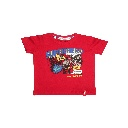

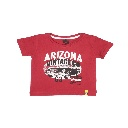

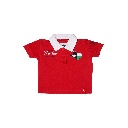

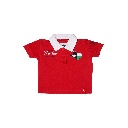

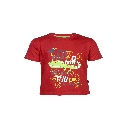

In [ ]:
img2 = cv2.imread("/content/drive/MyDrive/Redes Neuronales/Proyecto/data/img (1999).jpg")
img2 = np.array(img)
expand_img2 = np.expand_dims(img, axis=0)
pre_img2 = preprocess_input(expand_img)
result2 = model.predict(pre_img).flatten()
normalized2 = result/norm(result)

distance, indices = neighbors.kneighbors([normalized2])

for file in indices[0][1:6]:
    img_name = cv2.imread(filename2[file])
    cv2_imshow(img_name)
    cv2.waitKey(0)

Consultar otra imagen

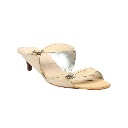

1/1 [==============================] - 0s 166ms/step


In [ ]:
new_img_path = "/content/drive/MyDrive/Redes Neuronales/Proyecto/data/img (2024).jpg"

# Leer y preprocesar la nueva imagen
new_img = cv2.imread(new_img_path)
cv2_imshow(new_img)
new_img = np.array(new_img)
expand_new_img = np.expand_dims(new_img, axis=0)
pre_new_img = preprocess_input(expand_new_img)
result_new_img = model.predict(pre_new_img).flatten()
normalized_new_img = result_new_img / norm(result_new_img)

In [ ]:
distance, indices = neighbors.kneighbors([normalized_new_img])

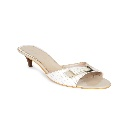

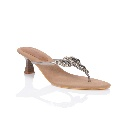

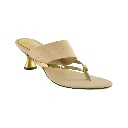

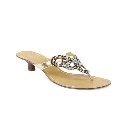

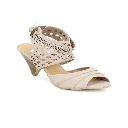

In [ ]:
for file in indices[0][1:6]:  # Saltamos el primer índice ya que es la imagen misma
    recommended_img_path = filename2[file]
    recommended_img = cv2.imread(recommended_img_path)
    cv2_imshow(recommended_img)
    cv2.waitKey(0)